# College Swimming Lineup Game Theory

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import os

#import grahpics packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import re
from collections import Counter

plt.style.use('ggplot')

### 
# For optimization
###

# Import PuLP modeller functions
from math import *
import pulp as pl
import time
import os

# import gurobi 
from gurobipy import *


###
# LIST THE INPUT FILES USED!
###

In [2]:
os.getcwd()

'c:\\Users\\mdb025\\Documents\\GitHub\\collegeswimming.com-Data-Analysis'

In [3]:
# Get the swimmer names to numbers
Swimmer_Names_df = pd.read_csv("SwimmerNames.csv",index_col='swimmer_id')
#print(Swimmer_Names_df)

#Swimmer_Names_dict = dict(zip(Swimmer_Names_df.swimmer_id, Swimmer_Names_df.name))
#Swimmer_Names_dict

### Read in and convert Swimmer Performance Predictions
### These are formatted so that the performance in a relay leg or leadoff is the same for each swimmer (whether in team A, B, C, etc.). For example, it's just the swimmer's best leadoff leg for a relay (FLF50A, FLF50B,...)
#### TO DO: *Read in raw data and do a sanity/viz check and then add the 3X times after we review the input data*
### F = Female
### L = Lead, 1=Freestyle, 2=Backstroke, 3=Breaststroke, 4=Butterfly
### Unless relay than L,2,3,4 are sequence in relay for medley or L,1 for lead off (1) and leg (2-4) swimmers.

### FLFM50A = Female, lead swimmer in 200Y medley realay on A team

In [4]:
# Event Labels Conversion - Don't Currently Use
EventLabelConvertDict = {'F1200Y':'200Y Free', 'F150Y':'50Y Free', 'F1100Y':'100Y Free', 'F4100Y':'100Y Fly', \
        'F2100Y':'100Y Back', 'F2200Y':'200Y Back', 'F1500Y':'500Y Free', 'F5200Y':'200Y IM', 'F3100Y':'100Y Breast', \
        'F4200Y':'200Y Fly','F3200Y':'200Y Breast','F11650Y':'1650Y Free', \
        'FLM50A': '200Y Medley Relay Back A', 'F2M50A': '200Y Medley Relay Breast A', 'F3M50A': '200Y Medley Relay Fly A', 'F4M50A': '200Y Medley Relay Free A',\
        'FLM50B': '200Y Medley Relay Back B', 'F2M50B': '200Y Medley Relay Breast B', 'F3M50B': '200Y Medley Relay Fly B', 'F4M50B': '200Y Medley Relay Free B',\
        'FLM50C': '200Y Medley Relay Back C', 'F2M50C': '200Y Medley Relay Breast C', 'F3M50C': '200Y Medley Relay Fly C', 'F4M50C': '200Y Medley Relay Free C',\
        'FLM50D': '200Y Medley Relay Back D', 'F2M50D': '200Y Medley Relay Breast D', 'F3M50D': '200Y Medley Relay Fly D', 'F4M50D': '200Y Medley Relay Free D',\
        'FLF50A':'200Y Free Relay Lead A','F1F50A':'200Y Free Relay Leg A', \
        'FLF50B':'200Y Free Relay Lead B','F1F50B':'200Y Free Relay Leg B', \
        'FLF50C':'200Y Free Relay Lead C','F1F50C':'200Y Free Relay Leg C', \
        'FLF50D':'200Y Free Relay Lead D','F1F50D':'200Y Free Relay Leg D'}
                
print(EventLabelConvertDict)

EventOrder = ['FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 
        'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', \
        'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', \
        'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', \
        'F11650Y', 'F1200Y', 'F2100Y', 'F3100Y', \
        'F4200Y', 'F150Y', 'F1100Y', 'F2200Y', \
        'F3200Y', 'F1500Y', 'F4100Y', 'F5200Y', \
        'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', \
        'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D']

print(EventOrder)### Order and names for meet scored events

{'F1200Y': '200Y Free', 'F150Y': '50Y Free', 'F1100Y': '100Y Free', 'F4100Y': '100Y Fly', 'F2100Y': '100Y Back', 'F2200Y': '200Y Back', 'F1500Y': '500Y Free', 'F5200Y': '200Y IM', 'F3100Y': '100Y Breast', 'F4200Y': '200Y Fly', 'F3200Y': '200Y Breast', 'F11650Y': '1650Y Free', 'FLM50A': '200Y Medley Relay Back A', 'F2M50A': '200Y Medley Relay Breast A', 'F3M50A': '200Y Medley Relay Fly A', 'F4M50A': '200Y Medley Relay Free A', 'FLM50B': '200Y Medley Relay Back B', 'F2M50B': '200Y Medley Relay Breast B', 'F3M50B': '200Y Medley Relay Fly B', 'F4M50B': '200Y Medley Relay Free B', 'FLM50C': '200Y Medley Relay Back C', 'F2M50C': '200Y Medley Relay Breast C', 'F3M50C': '200Y Medley Relay Fly C', 'F4M50C': '200Y Medley Relay Free C', 'FLM50D': '200Y Medley Relay Back D', 'F2M50D': '200Y Medley Relay Breast D', 'F3M50D': '200Y Medley Relay Fly D', 'F4M50D': '200Y Medley Relay Free D', 'FLF50A': '200Y Free Relay Lead A', 'F1F50A': '200Y Free Relay Leg A', 'FLF50B': '200Y Free Relay Lead B', 'F1F

### Order and names for meet scored events

In [5]:
EventScoreOrder = ['M50', 'F11650Y', 'F1200Y', 'F2100Y', 'F3100Y', \
        'F4200Y', 'F150Y', 'F1100Y', 'F2200Y', \
        'F3200Y', 'F1500Y', 'F4100Y', 'F5200Y', 'F50']

EventScoreLabelConvertDict = {'F1200Y':'200Y Free', 'F150Y':'50Y Free', 'F1100Y':'100Y Free', 'F4100Y':'100Y Fly', \
    'F2100Y':'100Y Back', 'F2200Y':'200Y Back', 'F1500Y':'500Y Free', 'F5200Y':'200Y IM', 'F3100Y':'100Y Breast', \
    'F4200Y':'200Y Fly','F3200Y':'200Y Breast','F11650Y':'1650Y Free', \
    'M50': '200Y Medley Relay', 'F50':'200Y Free Relay'}

In [6]:
# Read in team swimmer-event data
TeamA_Perf_df = pd.read_csv("BucknellPerfwNAs.csv")
TeamB_Perf_df = pd.read_csv("LehighPerfwNAs.csv")

In [7]:
TeamA_Perf_df.head()

,Swimmer,F1200Y,F150Y,F1100Y,F4100Y,F2100Y,F2200Y,F1500Y,F5200Y,F3100Y,...,F3M50D,F4M50D,FLF50A,F1F50A,FLF50B,F1F50B,FLF50C,F1F50C,FLF50D,F1F50D
0,167013,NaN,25.06,54.88,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.92,NaN,24.92,NaN,24.92,NaN,24.92,NaN,24.92
1,214963,NaN,NaN,NaN,NaN,NaN,131.82,NaN,136.12,65.77,...,NaN,24.82,NaN,24.82,NaN,24.82,NaN,24.82,NaN,24.82
2,221480,125.89,24.31,53.15,58.79,NaN,NaN,NaN,NaN,NaN,...,25.41,24.05,24.43,24.05,24.43,24.05,24.43,24.05,24.43,24.05
3,228451,116.94,NaN,53.45,57.58,54.76,117.11,NaN,122.27,69.67,...,NaN,23.25,NaN,23.25,NaN,23.25,NaN,23.25,NaN,23.25
4,233487,112.56,24.81,52.37,55.08,63.05,NaN,NaN,124.53,68.32,...,24.37,23.66,NaN,23.66,NaN,23.66,NaN,23.66,NaN,23.66


In [8]:
# Change the index to the unique Swimmer numbers
TeamA_Perf_df.set_index('Swimmer', inplace=True)
TeamB_Perf_df.set_index('Swimmer', inplace=True)

# Reorder the columns based on the order of events in a meet
TeamA_Perf_df = TeamA_Perf_df[EventOrder]
TeamB_Perf_df = TeamB_Perf_df[EventOrder]

In [9]:
# Look at mins/max for outliers, errors, and omissions.
TeamA_Perf_df.describe()

,FLM50A,F2M50A,F3M50A,F4M50A,FLM50B,F2M50B,F3M50B,F4M50B,FLM50C,F2M50C,...,F4100Y,F5200Y,FLF50A,F1F50A,FLF50B,F1F50B,FLF50C,F1F50C,FLF50D,F1F50D
count,7.000000,8.000000,8.000000,21.000000,7.000000,8.000000,8.000000,21.000000,7.000000,8.000000,...,12.000000,14.000000,10.00000,21.000000,10.00000,21.000000,10.00000,21.000000,10.00000,21.000000
mean,27.467143,31.583750,26.322500,24.559524,27.467143,31.583750,26.322500,24.559524,27.467143,31.583750,...,58.422500,130.167143,24.98900,24.559524,24.98900,24.559524,24.98900,24.559524,24.98900,24.559524
std,1.392093,1.323426,1.497481,0.942913,1.392093,1.323426,1.497481,0.942913,1.392093,1.323426,...,2.846625,5.444268,0.80626,0.942913,0.80626,0.942913,0.80626,0.942913,0.80626,0.942913
min,25.380000,29.330000,24.370000,23.170000,25.380000,29.330000,24.370000,23.170000,25.380000,29.330000,...,55.080000,122.270000,23.90000,23.170000,23.90000,23.170000,23.90000,23.170000,23.90000,23.170000
25%,26.630000,31.092500,25.377500,23.910000,26.630000,31.092500,25.377500,23.910000,26.630000,31.092500,...,56.920000,126.735000,24.45000,23.910000,24.45000,23.910000,24.45000,23.910000,24.45000,23.910000
50%,27.550000,31.610000,25.790000,24.640000,27.550000,31.610000,25.790000,24.640000,27.550000,31.610000,...,58.165000,130.240000,24.63000,24.640000,24.63000,24.640000,24.63000,24.640000,24.63000,24.640000
75%,28.225000,32.125000,27.437500,25.130000,28.225000,32.125000,27.437500,25.130000,28.225000,32.125000,...,59.055000,132.735000,25.58000,25.130000,25.58000,25.130000,25.58000,25.130000,25.58000,25.130000
max,29.630000,33.910000,28.470000,26.640000,29.630000,33.910000,28.470000,26.640000,29.630000,33.910000,...,65.880000,141.870000,26.49000,26.640000,26.49000,26.640000,26.49000,26.640000,26.49000,26.640000


In [10]:
# Look at mins/max for outliers, errors, and omissions.
TeamB_Perf_df.describe()

,FLM50A,F2M50A,F3M50A,F4M50A,FLM50B,F2M50B,F3M50B,F4M50B,FLM50C,F2M50C,...,F4100Y,F5200Y,FLF50A,F1F50A,FLF50B,F1F50B,FLF50C,F1F50C,FLF50D,F1F50D
count,7.000000,7.000000,8.000000,14.000000,7.000000,7.000000,8.000000,14.000000,7.000000,7.000000,...,13.000000,14.000000,3.000000,14.000000,3.000000,14.000000,3.000000,14.000000,3.000000,14.000000
mean,27.830000,31.134286,26.456250,24.459286,27.830000,31.134286,26.456250,24.459286,27.830000,31.134286,...,58.586923,130.696429,23.700000,24.459286,23.700000,24.459286,23.700000,24.459286,23.700000,24.459286
std,1.252517,0.931788,1.385021,1.746898,1.252517,0.931788,1.385021,1.746898,1.252517,0.931788,...,2.061389,4.089077,0.401497,1.746898,0.401497,1.746898,0.401497,1.746898,0.401497,1.746898
min,25.960000,29.840000,24.890000,22.660000,25.960000,29.840000,24.890000,22.660000,25.960000,29.840000,...,55.470000,123.850000,23.280000,22.660000,23.280000,22.660000,23.280000,22.660000,23.280000,22.660000
25%,26.920000,30.500000,25.170000,23.220000,26.920000,30.500000,25.170000,23.220000,26.920000,30.500000,...,57.460000,128.630000,23.510000,23.220000,23.510000,23.220000,23.510000,23.220000,23.510000,23.220000
50%,28.290000,31.330000,26.570000,23.845000,28.290000,31.330000,26.570000,23.845000,28.290000,31.330000,...,58.380000,129.775000,23.740000,23.845000,23.740000,23.845000,23.740000,23.845000,23.740000,23.845000
75%,28.625000,31.715000,27.130000,25.035000,28.625000,31.715000,27.130000,25.035000,28.625000,31.715000,...,59.910000,133.572500,23.910000,25.035000,23.910000,25.035000,23.910000,25.035000,23.910000,25.035000
max,29.470000,32.340000,28.680000,28.110000,29.470000,32.340000,28.680000,28.110000,29.470000,32.340000,...,62.700000,139.600000,24.080000,28.110000,24.080000,28.110000,24.080000,28.110000,24.080000,28.110000


## Visualize the predicted time in each event for each swimmer. Heat map.

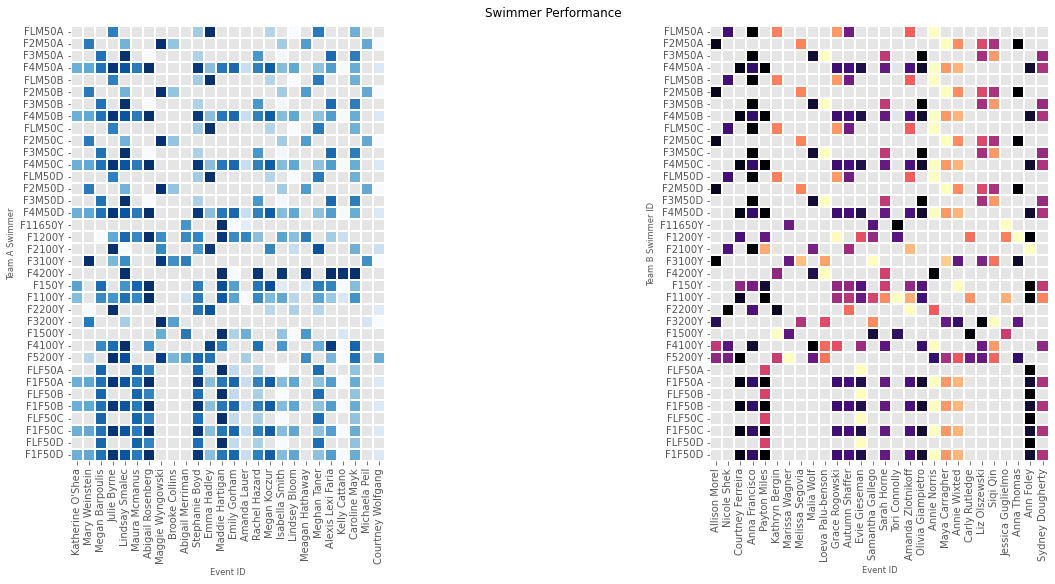

In [11]:
# Displaying performance data frame as a heatmap 
# with diverging colourmap as RdYlGn
fig, axs = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)

# Make swimmer names the index
TeamA_Perf_Clean_df = pd.merge(left= TeamA_Perf_df, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')
TeamB_Perf_Clean_df = pd.merge(left= TeamB_Perf_df, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')

# Scale the columns to min/max
TeamA_Perf_Clean_df = (TeamA_Perf_Clean_df - TeamA_Perf_Clean_df.min())/(TeamA_Perf_Clean_df.max()-TeamA_Perf_Clean_df.min())
TeamB_Perf_Clean_df = (TeamB_Perf_Clean_df - TeamB_Perf_Clean_df.min())/(TeamB_Perf_Clean_df.max()-TeamB_Perf_Clean_df.min())

sns.heatmap(TeamA_Perf_Clean_df.T, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[0], cmap= 'Blues_r')
sns.heatmap(TeamB_Perf_Clean_df.T, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[1], cmap= 'magma' )

#clean up the charts
fig.suptitle('Swimmer Performance')
axs[0].set_ylabel('Team A Swimmer',fontsize='small')
axs[1].set_ylabel('Team B Swimmer ID',fontsize='small')

axs[0].set_xlabel('Event ID', fontsize='small')
axs[1].set_xlabel('Event ID', fontsize='small')

plt.show()

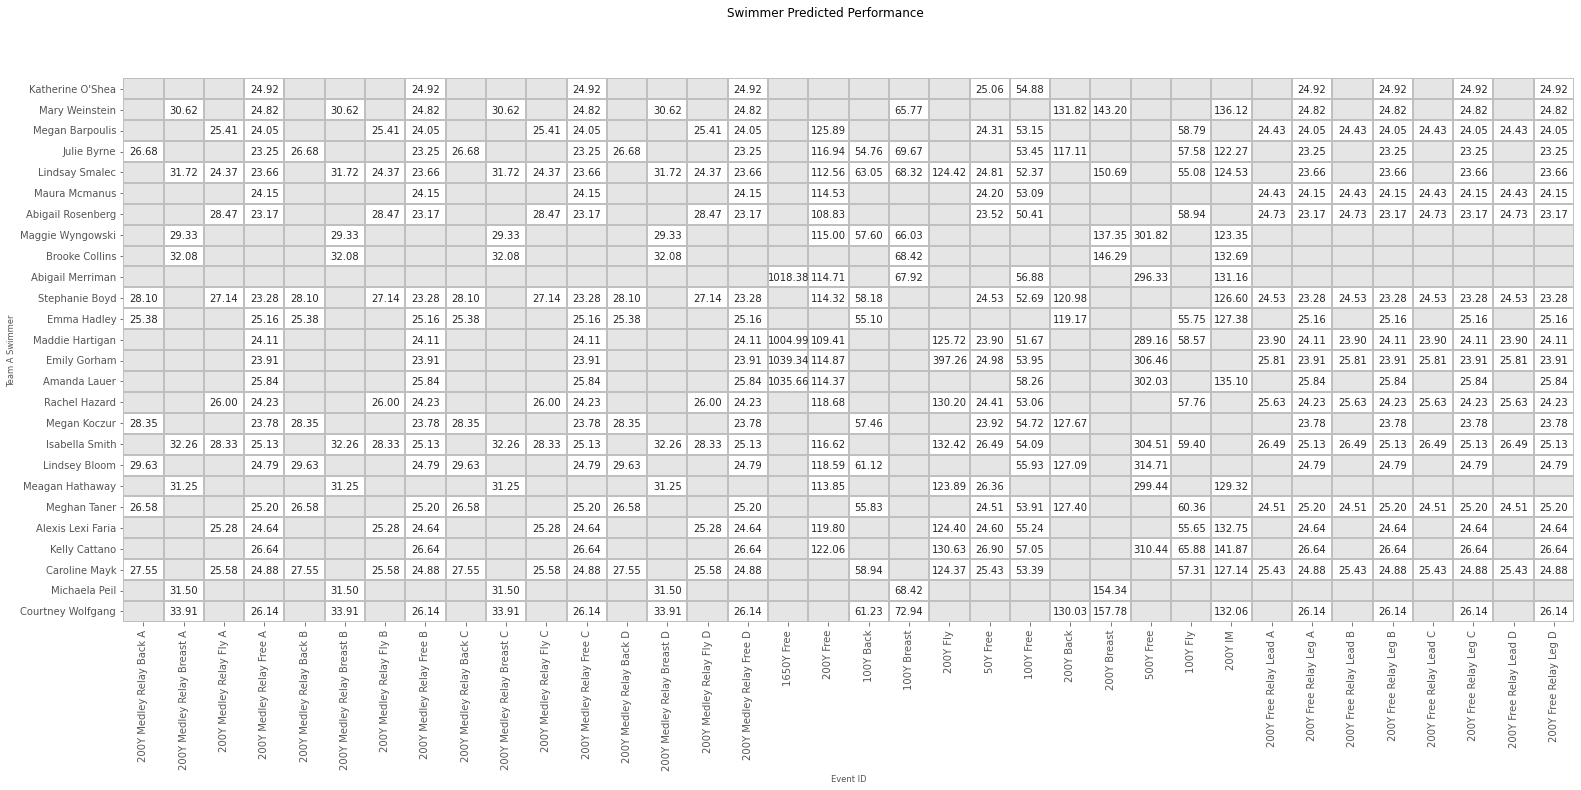

In [12]:
from matplotlib.colors import ListedColormap
# Just Bucknell for Dan:
# Displaying performance data frame as a heatmap 
fig, axs = plt.subplots(1, 1, figsize=(26, 10), constrained_layout=False)

# Make swimmer names the index
TeamA_Perf_Clean_df = pd.merge(left= TeamA_Perf_df, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')
TeamA_Lineup_Clean_events_df = TeamA_Perf_Clean_df.rename(columns=EventLabelConvertDict)

sns.heatmap(TeamA_Lineup_Clean_events_df, linewidths = 0.10, annot = True, fmt= '.2f', cbar= False, square= False, ax= axs, cmap = ListedColormap(['white']), linecolor= '0.75')

#clean up the charts
fig.suptitle('Swimmer Predicted Performance')
axs.set_ylabel('Team A Swimmer',fontsize='small')
axs.set_xlabel('Event ID', fontsize='small')

plt.show()

In [13]:
# Write performance to Excel for Dan
TeamA_Lineup_Clean_events_df.to_excel('Bucknell_Predicted_Performance.xlsx')

### Now compute the BigM values and add to the performance dataFrame

In [14]:
# define the BigM value for each event and replace the NaNs with the BigM value
BigM = dict()
TeamA_Perf_wM_df = TeamA_Perf_df.copy()
TeamB_Perf_wM_df = TeamB_Perf_df.copy()

for ev in EventOrder:

    #Big M is defined at 1.5x the largest observed value in the event
    temp = 4*max(TeamA_Perf_df[ev].max(),TeamB_Perf_df[ev].max())
    BigM[ev] = temp

    TeamA_Perf_wM_df[ev] = TeamA_Perf_df[ev].fillna(temp)
    TeamB_Perf_wM_df[ev] = TeamB_Perf_df[ev].fillna(temp)

# Create the BigM for the relay events from the four legs
BigM['M50'] = BigM['FLF50A'] + 3*BigM['F1F50A']
BigM['F50'] = BigM['FLM50A'] + BigM['F2M50A'] +	BigM['F3M50A'] + BigM['F4M50A']

# Display the BigM values as a dataframe
pd.DataFrame.from_dict(BigM, orient='index',columns= ['BigM'])

,BigM
FLM50A,118.52
F2M50A,135.64
F3M50A,114.72
F4M50A,112.44
FLM50B,118.52
F2M50B,135.64
F3M50B,114.72
F4M50B,112.44
FLM50C,118.52
F2M50C,135.64


In [15]:
TeamA_Perf_wM_df.describe()

,FLM50A,F2M50A,F3M50A,F4M50A,FLM50B,F2M50B,F3M50B,F4M50B,FLM50C,F2M50C,...,F4100Y,F5200Y,FLF50A,F1F50A,FLF50B,F1F50B,FLF50C,F1F50C,FLF50D,F1F50D
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,94.005769,103.622692,87.520769,41.459615,94.005769,103.622692,87.520769,41.459615,94.005769,103.622692,...,168.859615,332.003846,74.817308,41.459615,74.817308,41.459615,74.817308,41.459615,74.817308,41.459615
std,41.192889,48.982069,41.614367,35.330854,41.192889,48.982069,41.614367,35.330854,41.192889,48.982069,...,104.286845,222.360636,40.175779,35.330854,40.175779,35.330854,40.175779,35.330854,40.175779,35.330854
min,25.380000,29.330000,24.370000,23.170000,25.380000,29.330000,24.370000,23.170000,25.380000,29.330000,...,55.080000,122.270000,23.900000,23.170000,23.900000,23.170000,23.900000,23.170000,23.900000,23.170000
25%,51.852500,32.672500,28.365000,24.065000,51.852500,32.672500,28.365000,24.065000,51.852500,32.672500,...,58.625000,129.780000,25.480000,24.065000,25.480000,24.065000,25.480000,24.065000,25.480000,24.065000
50%,118.520000,135.640000,114.720000,24.850000,118.520000,135.640000,114.720000,24.850000,118.520000,135.640000,...,263.520000,138.995000,105.960000,24.850000,105.960000,24.850000,105.960000,24.850000,105.960000,24.850000
75%,118.520000,135.640000,114.720000,26.065000,118.520000,135.640000,114.720000,26.065000,118.520000,135.640000,...,263.520000,567.480000,105.960000,26.065000,105.960000,26.065000,105.960000,26.065000,105.960000,26.065000
max,118.520000,135.640000,114.720000,112.440000,118.520000,135.640000,114.720000,112.440000,118.520000,135.640000,...,263.520000,567.480000,105.960000,112.440000,105.960000,112.440000,105.960000,112.440000,105.960000,112.440000


In [16]:
TeamB_Perf_wM_df.describe()

,FLM50A,F2M50A,F3M50A,F4M50A,FLM50B,F2M50B,F3M50B,F4M50B,FLM50C,F2M50C,...,F4100Y,F5200Y,FLF50A,F1F50A,FLF50B,F1F50B,FLF50C,F1F50C,FLF50D,F1F50D
count,28.00000,28.000000,28.000000,28.000000,28.00000,28.000000,28.000000,28.000000,28.00000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,95.84750,109.513571,89.501786,68.449643,95.84750,109.513571,89.501786,68.449643,95.84750,109.513571,...,168.372500,349.088214,97.146429,68.449643,97.146429,68.449643,97.146429,68.449643,97.146429,68.449643
std,39.99489,46.084782,40.611306,44.813983,39.99489,46.084782,40.611306,44.813983,39.99489,46.084782,...,104.089356,222.417407,25.909695,44.813983,25.909695,44.813983,25.909695,44.813983,25.909695,44.813983
min,25.96000,29.840000,24.890000,22.660000,25.96000,29.840000,24.890000,22.660000,25.96000,29.840000,...,55.470000,123.850000,23.280000,22.660000,23.280000,22.660000,23.280000,22.660000,23.280000,22.660000
25%,96.25750,109.815000,28.480000,23.877500,96.25750,109.815000,28.480000,23.877500,96.25750,109.815000,...,58.545000,129.972500,105.960000,23.877500,105.960000,23.877500,105.960000,23.877500,105.960000,23.877500
50%,118.52000,135.640000,114.720000,70.275000,118.52000,135.640000,114.720000,70.275000,118.52000,135.640000,...,263.520000,353.540000,105.960000,70.275000,105.960000,70.275000,105.960000,70.275000,105.960000,70.275000
75%,118.52000,135.640000,114.720000,112.440000,118.52000,135.640000,114.720000,112.440000,118.52000,135.640000,...,263.520000,567.480000,105.960000,112.440000,105.960000,112.440000,105.960000,112.440000,105.960000,112.440000
max,118.52000,135.640000,114.720000,112.440000,118.52000,135.640000,114.720000,112.440000,118.52000,135.640000,...,263.520000,567.480000,105.960000,112.440000,105.960000,112.440000,105.960000,112.440000,105.960000,112.440000


### Read in initial lineups for both teams and put in a list. We'll create improvedd lineups later.

In [17]:
# Global
TOTAL_LINEUPS = 4

# Initialize lists of lineups for teams A and B
TeamA_Lineup_df = [None] * TOTAL_LINEUPS 
TeamB_Lineup_df = [None] * TOTAL_LINEUPS 

# Read the initial lineups into a list as the first (base) lineup
TeamA_Lineup_df[0] = pd.read_csv("Bucknell_1_Lineup.csv",index_col='Swimmer')
TeamB_Lineup_df[0] = pd.read_csv("Lehigh_1_Lineup.csv",index_col='Swimmer')

#TeamA_Lineup_df = []
#TeamA_Lineup_df.append(pd.read_csv("Bucknell_1_Lineup.csv",index_col='Swimmer'))

#TeamB_Lineup_df = []
#TeamB_Lineup_df.append(pd.read_csv("Lehigh_1_Lineup.csv",index_col='Swimmer'))

# What are the line up events we'll need to assign later?
# We won't really need the D relay team, but keep for consistency
Lineup_Events = tuple(TeamA_Lineup_df[0].columns.tolist())

# Order the colummns to the meet event order
TeamA_Lineup_df[0] = TeamA_Lineup_df[0][EventOrder]
TeamB_Lineup_df[0] = TeamB_Lineup_df[0][EventOrder]

print(Lineup_Events)

('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')


### The base meet did NOT swim a 1650Y Free (F11650Y) or 200Y Free Relay, they swam a 1000Y Free (F11000Y) and 400Y Free Relay instead, make some adjustments to the lineups

In [18]:
# Swimmers were accidentally put in 100Y that actually swam the 1000Y Free from Data Scrape
TeamA_Lineup_df[0].at[260001,'F1100Y'] = 0
TeamA_Lineup_df[0].at[402879,'F1100Y'] = 0

TeamB_Lineup_df[0].at[330114,'F1100Y'] = 0
TeamB_Lineup_df[0].at[696579,'F1100Y'] = 0

In [19]:
# # Add the 1650 Swimmers from the meet that swam the 1000Y Free instead
TeamA_Lineup_df[0].at[330237,'F11650Y'] = 1
TeamA_Lineup_df[0].at[260001,'F11650Y'] = 1
TeamA_Lineup_df[0].at[356813,'F11650Y'] = 1
TeamA_Lineup_df[0].at[330324,'F11650Y'] = 1

TeamB_Lineup_df[0].at[404163,'F11650Y'] = 1
TeamB_Lineup_df[0].at[342505,'F11650Y'] = 1
TeamB_Lineup_df[0].at[271442,'F11650Y'] = 1
TeamB_Lineup_df[0].at[422229,'F11650Y'] = 1

In [20]:
# Add the 200 Free Relay from the 400 Free Relay for TEAM A

TeamA_Lineup_df[0].at[329465,'FLF50A'] = 1
TeamA_Lineup_df[0].at[265562,'F1F50A'] = 1
TeamA_Lineup_df[0].at[233650,'F1F50A'] = 1
TeamA_Lineup_df[0].at[342607,'F1F50A'] = 1

TeamA_Lineup_df[0].at[221480,'FLF50B'] = 1
TeamA_Lineup_df[0].at[342611,'F1F50B'] = 1
TeamA_Lineup_df[0].at[382148,'F1F50B'] = 1
TeamA_Lineup_df[0].at[395502,'F1F50B'] = 1

TeamA_Lineup_df[0].at[260001,'FLF50C'] = 1
TeamA_Lineup_df[0].at[356813,'F1F50C'] = 1
TeamA_Lineup_df[0].at[347298,'F1F50C'] = 1
TeamA_Lineup_df[0].at[344005,'F1F50C'] = 1

In [21]:
# Add the 200 Free Relay from the 400 Free Relay Roster for TEAM B

TeamB_Lineup_df[0].at[494957,'FLF50A'] = 1
TeamB_Lineup_df[0].at[233836,'F1F50A'] = 1
TeamB_Lineup_df[0].at[342918,'F1F50A'] = 1
TeamB_Lineup_df[0].at[213253,'F1F50A'] = 1

TeamB_Lineup_df[0].at[330114,'FLF50B'] = 1
TeamB_Lineup_df[0].at[282290,'F1F50B'] = 1
TeamB_Lineup_df[0].at[323285,'F1F50B'] = 1
TeamB_Lineup_df[0].at[330349,'F1F50B'] = 1

TeamB_Lineup_df[0].at[696579,'FLF50C'] = 1
TeamB_Lineup_df[0].at[273646,'F1F50C'] = 1
TeamB_Lineup_df[0].at[291023,'F1F50C'] = 1
TeamB_Lineup_df[0].at[404163,'F1F50C'] = 1

In [22]:
# Clean up values just in case
TeamA_Lineup_df[0] = TeamA_Lineup_df[0][TeamA_Lineup_df[0].columns].astype('int8')
TeamB_Lineup_df[0] = TeamB_Lineup_df[0][TeamB_Lineup_df[0].columns].astype('int8')

### EDA on the Base Team Lineups

In [23]:
# Some colors for consistency
TeamA_blue = (0,.22,.4)
TeamA_orange = (0.9,0.46,0.13)
TeamB_yellow = (1,0.82,0.309)
TeamB_brown = (0.396, 0.211,0)

TeamA_colors = [TeamA_orange, TeamA_blue]
TeamB_colors = [TeamB_yellow, TeamB_brown]

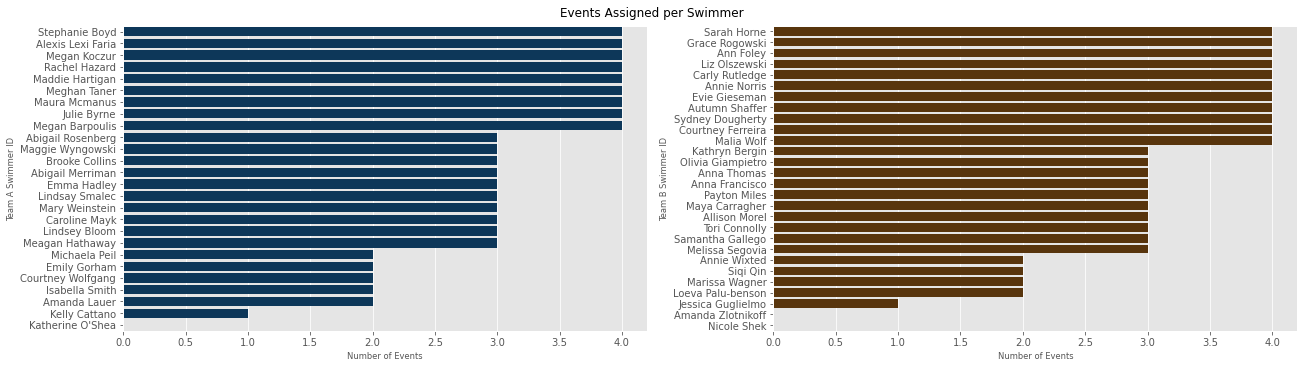

In [24]:
# How many Events for each swimmer?

fig, axs = plt.subplots(1, 2, figsize=(18, 5), constrained_layout=True)

# Team A
TeamA_TotEventsPerAth = TeamA_Lineup_df[0].sum(axis=1).sort_values(ascending=False).to_frame().rename(columns={0: "tot_events"})
TeamA_TotEventsPerAth = pd.merge(left= TeamA_TotEventsPerAth, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True)
sns.barplot(y=TeamA_TotEventsPerAth.name, x=TeamA_TotEventsPerAth.tot_events, color= TeamA_blue,ax=axs[0])

# Team B
TeamB_TotEventsPerAth = TeamB_Lineup_df[0].sum(axis=1).sort_values(ascending=False).to_frame().rename(columns={0: "tot_events"})
TeamB_TotEventsPerAth = pd.merge(left= TeamB_TotEventsPerAth, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True)
sns.barplot(y=TeamB_TotEventsPerAth.name, x=TeamB_TotEventsPerAth.tot_events, color= TeamB_brown,ax=axs[1])

#clean up the charts
fig.suptitle('Events Assigned per Swimmer')
axs[0].set_ylabel('Team A Swimmer ID',fontsize='small')
axs[1].set_ylabel('Team B Swimmer ID',fontsize='small')

#for ax in axs:
#    ax.set_ylim([0, 4.2])
axs[0].set_xlabel('Number of Events', fontsize='small')
axs[1].set_xlabel('Number of Events', fontsize='small')
plt.show()



### We can see that some swimmers were put in an as many as four swimming events at this meet. The focus of on our analysis is on assignments that will likely score in the meet. The coach can make adjustments to add athletes they want in events, but likely won't score.

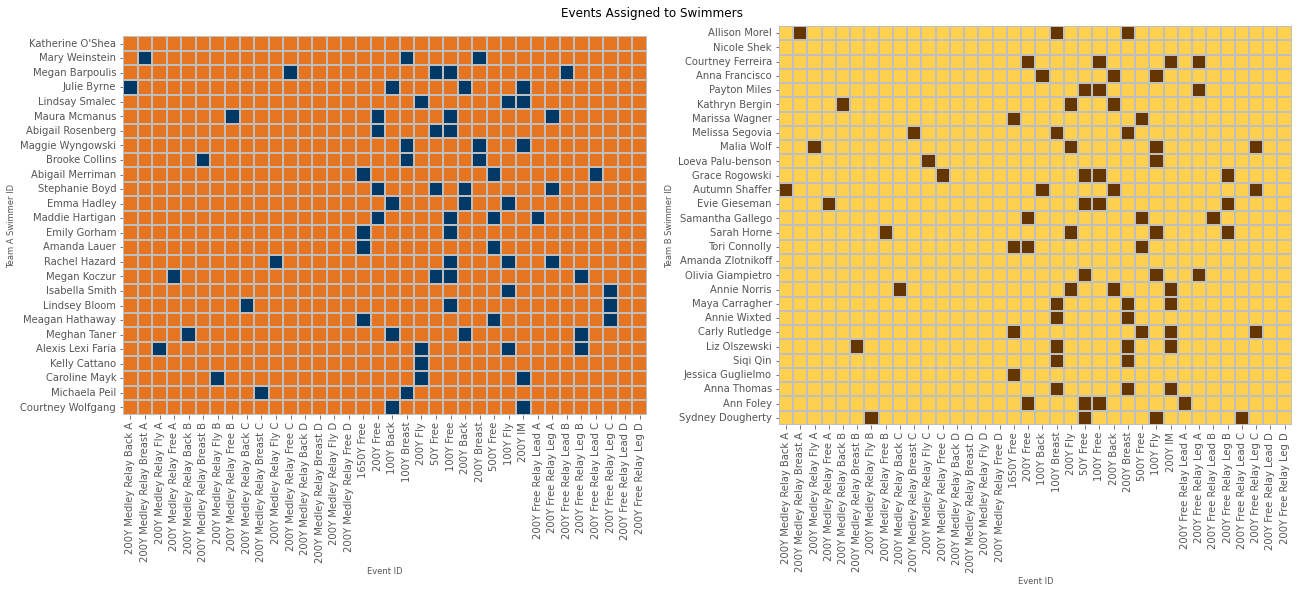

In [25]:
# Displaying dataframe as an heatmap 
# with diverging colourmap as RdYlGn
fig, axs = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)

# Make swimmer names the index
TeamA_Lineup_Clean_df = pd.merge(left= TeamA_Lineup_df[0], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')
TeamB_Lineup_Clean_df = pd.merge(left= TeamB_Lineup_df[0], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')

TeamA_Lineup_Clean_df = TeamA_Lineup_Clean_df.rename(columns=EventLabelConvertDict)
TeamB_Lineup_Clean_df = TeamB_Lineup_Clean_df.rename(columns=EventLabelConvertDict)


sns.heatmap(TeamA_Lineup_Clean_df, linewidths = 0.1, annot = False, cbar= False, square= True, ax= axs[0], cmap= TeamA_colors, linecolor='0.75')
sns.heatmap(TeamB_Lineup_Clean_df, linewidths = 0.1, annot = False, cbar= False, square= True, ax= axs[1], cmap= TeamB_colors, linecolor='0.75')

#clean up the charts
fig.suptitle('Events Assigned to Swimmers')
axs[0].set_ylabel('Team A Swimmer ID',fontsize='small')
axs[1].set_ylabel('Team B Swimmer ID',fontsize='small')

axs[0].set_xlabel('Event ID', fontsize='small')
axs[1].set_xlabel('Event ID', fontsize='small')

# colorbar = axs[0].collections[0].colorbar
# colorbar.set_ticks([.25,.75])
# colorbar.set_ticklabels(['Not Assigned','Assigned'])

# colorbar2 = axs[1].collections[0].colorbar
# colorbar2.set_ticks([.25,.75])
# colorbar2.set_ticklabels(['Not Assigned','Assigned'])

plt.show()

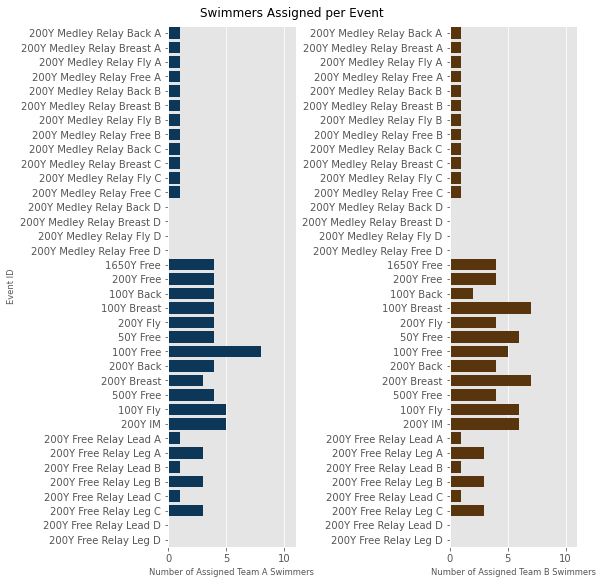

In [26]:
# How many athletes for each event?
fig, axs = plt.subplots(1, 2, figsize=(8, 8), sharey=False, constrained_layout=True)

# Team A
TeamA = TeamA_Lineup_df[0].rename(columns=EventLabelConvertDict).sum(axis=0)
sns.barplot(y=TeamA.index, x=TeamA.values, color= TeamA_blue,ax=axs[0], ci=None)

#Team B
TeamB = TeamB_Lineup_df[0].rename(columns=EventLabelConvertDict).sum(axis=0)
sns.barplot(y=TeamB.index, x=TeamB.values, color= TeamB_brown, ax=axs[1], ci=None)

#clean up the charts
fig.suptitle('Swimmers Assigned per Event')
axs[0].set_ylabel('Event ID',fontsize='small')

for ax in axs:
    ax.set_xlim([0, 11])
axs[0].set_xlabel('Number of Assigned Team A Swimmers', fontsize='small')
axs[1].set_xlabel('Number of Assigned Team B Swimmers', fontsize='small')
plt.show()

### Set the scoring rules for the meet

In [27]:
# Point Values for each place in an event category. Format: {# of Lanes: [1st place, 2nd place,... nth place]}
INDIVIDUAL_POINTS = {"Six Lane": [9, 4, 3, 2, 1, 0], "Five Lane": [5, 3, 1, 0]}
RELAY_POINTS = {"Six Lane": [11, 4, 2], "Five Lane": [7, 0]}
# Limit for number of people who can score per team in each event type. Format: {# of Lanes: [Individual, Relay]}
SCORER_LIMIT = {"Six Lane": [3,2], "Five Lane": [2,1]}

### Determine the Expected Score for Team A and Team B when using a given set of performances AND lineups

In [28]:
def calculate_pred_score(perf_team_a, line_team_a, perf_team_b, line_team_b, scoring_method="Six Lane"):
    """
    returns the predicted score of team A for a swimming meet
    :param perf_team_a: Pandas dataframe of predicted performances for a given team A's swimmers
    :param line_team_a: Pandas Dataframe of a given lineup for a team A
    :param perf_team_b: Pandas dataframe of predicted performances for a given team B's swimmers
    :param line_team_b: Pandas Dataframe of a given lineup for a team B
    :param scoring_method: used to determine how points are allocated
    :return: pred_score: Integer value of team A's predicted
    """

    # create predicted performance matrices that only contain values for swimmers in the lineup
    lineup_scores_a = perf_team_a[line_team_a == 1]
    lineup_scores_b = perf_team_b[line_team_b == 1]

    # Team scores are integer values, initialize them at 0
    score_a = score_b = 0

    # Find times for all relay events and put them together in one dictionary
    event_list = lineup_scores_a.columns.tolist()
    # look for relay events. the lookup is performed by finding the leadoff
    r = re.compile(".L[MF].+")  
    relay_list = list(filter(r.match, event_list))
    #print(relay_list)
    relay_event_results = dict()
    for value in relay_list:
        #find out what type of relay value is and make list of legs in relay
        if value[2] == "F":
            # relay is a freestyle relay, so there are two types of legs
            legs = [value, value[:1]+"1"+value[2:]]
        elif value[2] == "M":
            # relay is medley relay, so there are four different legs
            legs = [value, value[:1] + "2" + value[2:], value[:1] + "3" + value[2:], value[:1] + "4" + value[2:]]
        # get sum of legs in relay for full relay time.
        time_a = lineup_scores_a[legs].sum().sum()
        time_b = lineup_scores_b[legs].sum().sum()
        # if event is in dictionary, update data, if not then append it
        if value[2:-1] in relay_event_results:
            if time_a != 0:
                relay_event_results[value[2:-1]][0].append(time_a)
            if time_b != 0:
                relay_event_results[value[2:-1]][1].append(time_b)
        else:
            relay_event_results[value[2:-1]] = [[time_a],[time_b]]
            if time_a == 0:
                relay_event_results[value[2:-1]][0].pop()
            if time_b == 0:
                relay_event_results[value[2:-1]][1].pop()

    # dataframe to keep event scores
    eventScore_df = pd.DataFrame(columns = ['event','team','score'])

    # score the relays
    for event in relay_event_results:
        # get results for each team by event
        results_a = relay_event_results[event][0]
        #print("results for relay event ", event, " are ", results_a)
        results_b = relay_event_results[event][1]
        temp_a, temp_b = score_event(results_a, results_b, RELAY_POINTS[scoring_method], SCORER_LIMIT[scoring_method][1])
        score_a += temp_a
        score_b += temp_b
        eventScore_df = eventScore_df.append({'event' : event, 'team': 'Team A', 'score' : temp_a},ignore_index= True)
        eventScore_df = eventScore_df.append({'event' : event, 'team': 'Team B', 'score' : temp_b},ignore_index= True)
        #print("Event ", event, ":")
        #print("\tBucknell: ",temp_a,", Lehigh: ",temp_b) 
    # score individual events, which we identify in the line below
    individual_events = list(filter(lambda x: x[2] not in "MF", event_list))
    for column_name in individual_events:
        results_a = lineup_scores_a[column_name][lineup_scores_a[column_name].notna()].tolist()
        #print("results for event ", column_name, " are ", results_a)
        results_b = lineup_scores_b[column_name][lineup_scores_b[column_name].notna()].tolist()
        temp_a, temp_b = score_event(results_a, results_b, INDIVIDUAL_POINTS[scoring_method],
                                     SCORER_LIMIT[scoring_method][0])
        # cannot add to two values at same time, so we have to assign points to temp values and then add those to score
        score_a += temp_a
        score_b += temp_b
        #print("Event ", column_name, ":")
        #print("\tBucknell: ",temp_a,", Lehigh: ",temp_b)
        eventScore_df = eventScore_df.append({'event' : column_name, 'team': 'Team A', 'score' : temp_a},ignore_index= True)
        eventScore_df = eventScore_df.append({'event' : column_name, 'team': 'Team B', 'score' : temp_b},ignore_index= True)
    return score_a, score_b, eventScore_df

In [29]:
def score_event(results_a, results_b, places, scoring_limit):
    """
    assigns points to groups based on who has the smallest score/time.
    :param results_a: list of recorded times for team a
    :param results_b: list of recorded times for team b
    :param places: list of point values awarded for first, second, etc place
    :param scoring_limit: the maximum number of swimmers per team that can score in the event
    :return: scores of team a and b
    """
    score_a = score_b = place_counter = 0
    all_times = results_a + results_b  # make a list of all times scored in the event
    all_times.sort()  # sort the list in ascending order
    a_scorers = b_scorers = 0
    results_dict = dict(Counter(all_times))  # convert list to dictionary. key is time, value is frequency of time

    for i in results_dict:
        if place_counter >= len(places):  # When there are no more points to award for the event break the loop
            break

        if results_dict[i] == 1:  # only one instance of the given time in either list (i.e. not a tie)
            if i in results_a:
                if a_scorers <= scoring_limit:
                    score_a = score_a + places[place_counter]
            else:
                if b_scorers <= scoring_limit:
                    score_b = score_b + places[place_counter]

        else:  # this signifies a tie, results_dict[i] > 1
            # split points awarded among all tied players
            points_per_player = sum(places[place_counter: place_counter + results_dict[i]]) / results_dict[i]
            if a_scorers <= scoring_limit:
                score_a += results_a.count(i) * points_per_player
            if b_scorers <= scoring_limit:
                score_b += results_b.count(i) * points_per_player

        a_scorers += results_a.count(i)
        b_scorers += results_b.count(i)
        place_counter = place_counter + results_dict[i]

    return score_a, score_b

### Return Data to project who should win which events based on lineups and predicted performances and show on chart
### 19 total points for indiv and 17 for relay
### 12 indiv and 2 relay = 262 total points

In [30]:
score_A,score_B,eventScore_df = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[0], \
    TeamB_Perf_wM_df, TeamB_Lineup_df[0], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B)

Projected scores: 
Team A:  137.0 
Team B:  125.0


### In the actual 1/26/2019 Team A (Bucknell) won 161-137 (including diving events).
### In just swimming events the actual score was 137-125 as we just predicted.

## Function to Display bar chart of team scores in events:

In [31]:
def ChartScore(EventScores, TeamAcolor, TeamBcolor, FigSize_h, FigSize_l):
    """
    :param Scores: A dataframe of the two two scores for each event
    :param TeamLineup: Dataframe of team lineup. Index is swimmer_id and columns are events
    :param TeamAColor: Matplotlib color for Team A columns, e.g. (0,.22,.4)
    :param TeamBColor: Matplotlib color for Team B columns, e.g. (0,.22,.4)
    :param FigSize_h, FigSize_l: figur height and width in inches.

    #returns plot of given lineup

    """
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(FigSize_h, FigSize_l))

    # Set event field as category, reorder to meet order, and rename to user-friendly names
    Scores = EventScores.copy()
    Scores.event = Scores.event.astype('category')
    Scores.event = Scores.event.cat.reorder_categories(EventScoreOrder)
    Scores.event = Scores.event.cat.rename_categories(EventScoreLabelConvertDict)

    sns.barplot(x="event", y="score", hue='team', data=Scores, palette=[TeamAcolor,TeamBcolor], ci=None);

    return


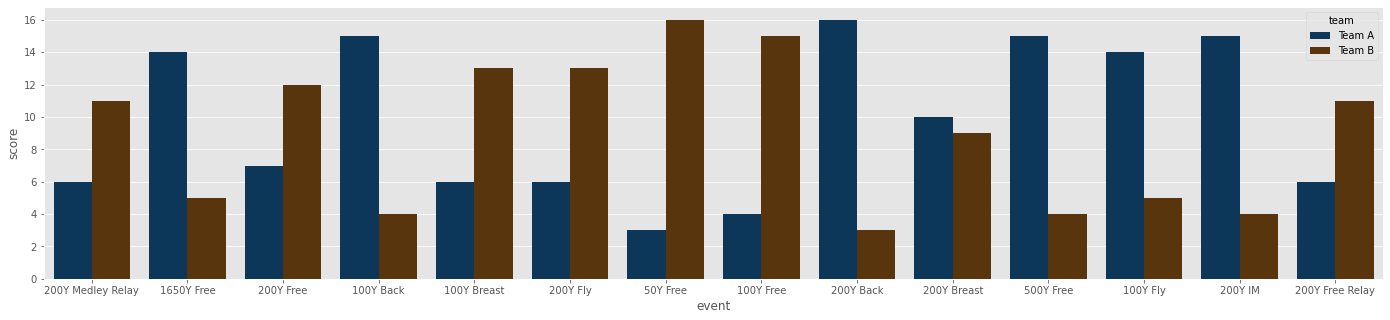

In [32]:
ChartScore(eventScore_df, TeamA_blue, TeamB_brown,24,5)

### For a given opponent lineup, generate the top three sorted scores in each event. Then add ghost max scores for places 4, 5
# What should max time and Big_M be for each event?

In [33]:
def create_opptime_dict(perf_team_a, line_team_a, Big_M):
    """
    MDB function Addition

    returns the predicted opposition times for a given line up (scenario)
    :param perf_team_a: Pandas dataframe of predicted performances for a given team A's swimmers
    :param line_team_a: Pandas Dataframe of a given lineup for a team A
    :param Big_M: A dictionary of the Big M values for each scoring event AND the relay legs

    :return: opptime_team_a: dictionary of team A's top three times in each event
    """
    # We're going to reduce all the opptimes by 0.001 to avoid ties by MeetOpt the precision for the input data is only to
    # t0 0.01, so this should affect points, but will avoid ties with how MeetOpt works. For more precise input data,
    # this may not be necessary, but it should be at least one place of precision more than the input data.

    tiebreak = 0.001
    
    # create predicted performance matrices that only contain values for swimmers in the lineup
    lineup_scores_a = perf_team_a[line_team_a == 1]

    # Find times for all relay events and put them together in one dictionary
    event_list = lineup_scores_a.columns.tolist()
    # look for relay events. the lookup is performed by finding the leadoff
    r = re.compile(".L[MF].+")  
    relay_list = list(filter(r.match, event_list))
    relay_event_results = dict()
    
    #print(relay_list)

    for value in relay_list:
        #find out what type of relay value is and make list of legs in relay
        if value[2] == "F":
            # relay is a freestyle relay, so there are two types of legs
            legs = [value, value[:1]+"1"+value[2:]]
        elif value[2] == "M":
            # relay is medley relay, so there are four different legs
            legs = [value, value[:1] + "2" + value[2:], value[:1] + "3" + value[2:], value[:1] + "4" + value[2:]]
        # get sum of legs in relay for full relay time.
        time_a = lineup_scores_a[legs].sum().sum()
        # if event is in dictionary, update data, if not then append it
        if value[2:-1] in relay_event_results:
            if time_a != 0:
                relay_event_results[value[2:-1]][0].append(time_a)
        else:
            relay_event_results[value[2:-1]] = [[time_a]]
            if time_a == 0:
                relay_event_results[value[2:-1]][0].pop()

    # create opptime_team_a sorted dictionary of predicted opponent times by event
    # number of places to score the events (likely three for a dual meet) ...SHOULD NOT HARD CODE THIS!
    places = [1, 2, 3, 4, 5]

    opptime_team_a = {}
    for p in places:
        opptime_team_a[p] = {}

    relay_events = list()
    for event in relay_event_results:
        # get results for each team by event
        results_a = relay_event_results[event][0]
        results_a.sort()
        # set the opptime dictionary to sorted time of opp pred times
        for p in places:
            if p <= len(results_a):
                opptime_team_a[p][event] = results_a[p-1] - tiebreak
            else:
                # Make the filler event time a little smaller for the opposing team (tie goes to home)
                opptime_team_a[p][event] = Big_M[event] - tiebreak

        # add the event to the list of events
        relay_events.append(event)


    # score individual events, which we identify in the line below
    individual_events = list(filter(lambda x: x[2] not in "MF", event_list))
    for column_name in individual_events:
        event = column_name
        results_a = lineup_scores_a[event][lineup_scores_a[event].notna()].tolist()
        results_a.sort()
    
        for p in places:
            if p <= len(results_a):
                opptime_team_a[p][event] = results_a[p-1] - tiebreak
            else:
                # Make the filler event time a little larger for the opposing team (tie goes to home)
                opptime_team_a[p][event] = Big_M[event] - tiebreak
    
    return opptime_team_a

### Get opptime for Team B's lineup(s)

In [34]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event
TeamB_lineupNums = 1
opptime_TeamB_dict = dict()
for i in range(TeamB_lineupNums):
    opptime_TeamB_dict[i+1] = create_opptime_dict(TeamB_Perf_wM_df, TeamB_Lineup_df[i], BigM)

opptime_TeamB_dict[1][4]['M50']

443.279

### OK, now we have performance data for Team A (Bucknell) and opptime prediction for Team B (Lehigh) with the given lineups.
### Compute a (possibly) better lineup for Team A (Bucknell) vs. this lineup

### Get the Pred Performance dictionary with the right column names to match what MeetOpt (MO) wants

In [35]:
# Do this for Team_A and then make a new function after getting it to work
# Drop all the peformance columns for B, C, and D relays. They are all identical to the A values
TeamA_Perf_df_MO = TeamA_Perf_wM_df.loc[:,~TeamA_Perf_wM_df.columns.str.endswith(('B','C','D'))]

# List the columns of the predicted performance list
pred_perf_events = TeamA_Perf_df_MO.columns.tolist()
print(pred_perf_events)

['FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'F11650Y', 'F1200Y', 'F2100Y', 'F3100Y', 'F4200Y', 'F150Y', 'F1100Y', 'F2200Y', 'F3200Y', 'F1500Y', 'F4100Y', 'F5200Y', 'FLF50A', 'F1F50A']


In [36]:
# Get list of swimmers from Team A
TeamA_swimmers = TeamA_Perf_df_MO.index.values.tolist()

print(TeamA_swimmers)

[167013, 214963, 221480, 228451, 233487, 233650, 235482, 255871, 256775, 260001, 265562, 270043, 329465, 330237, 330324, 342607, 342611, 344005, 347298, 356813, 382148, 395502, 402879, 403012, 409578, 586800]


In [37]:
# Create the TeamA dictionary in the right structure
# Convert pandas to dict and use Swimmer as row index and Event as columns
# Already includes BigM values!
TeamA_Perf_dict = TeamA_Perf_df_MO.to_dict(orient='index')
# Show the values
TeamA_Perf_dict[167013]['FLF50A']

105.96

In [38]:
# Get the number of opponent lineups (scenarios) and their associated probabilities
# These will be generated from game theory later

# Need to use this structre for MeetOpt and to allow for more than one scenario later
# for 3 lineups
# opp_lineup_nums = [1,2,3]
# opp_lineup_num = (.1,.5,.4)
oppB_lineup_nums = [1]
oppB_lineup_select_prob = (1,) 

# connect the lineup nums with their associate probs in a dictionary for MeetOpt
oppB_scenario_prob = dict(zip(oppB_lineup_nums,oppB_lineup_select_prob))

print(oppB_scenario_prob)

{1: 1}


In [39]:
# Necessary lists and dicts for MeetOpt
individual_scored_events = ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y','F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y','F4200Y','F3200Y','F11650Y')
relay_scored_events = ('M50','F50')
relay_noMR = ('F50',)
indiv_pastperf_events = individual_scored_events

relay_pastperf_events = ('FLM50A', 'F2M50A','F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
MR_legs = ('FLM50A', 'F2M50A','F3M50A', 'F4M50A')


# the events in opptime for ranking
total_scored_events = individual_scored_events + relay_scored_events

# the events in pred_perf for performance prediction
total_pastperf_events = indiv_pastperf_events + relay_pastperf_events

# Lineup_Events are the events for assignment from the x,y,z variables (1st, 2nd, 3rd) from within MeetOpt

print(total_scored_events)
print(total_pastperf_events)
print(Lineup_Events)

('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')


## Input the MeetOpt function to create an improved lineup vs. an opponent or distribution of opponents.

In [40]:
"""
Created on Sat Jan 12 09:14:40 2019

@author: mdb025
"""

def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime, Big_M):
    """
    :param athletFull: list of athlete IDs
    :param scenario: integer list of the opponent lineups, e.g. [1, 2]
    :param scenprob: dictionary of scenarios to probability (or weight) of selection. This will be the
    the likelihood that the lineup is chosen from a game theory distribution.
    :param indiv_scored_events: a list of the names of the events that are scored in a meet for the individuals
    :param relaynoMR: the list of names of scored freestyle relay events (no medleys)
    :param stroke: the list of names of the legs of the medley relay
    :param relay_scored_events: names of relay events scored and in opptime
    :param lineup_events: the events list that need to be returned for Team A includes relays A,B,C data from xvar, yvar, zvar.
    :param playperf: the dictionary of predicted performances for Team A athletes in each event. indexed by (indiv_scored_events and relay_past_perf_events)
    :param opptime: the dictionary of opposing team ranked performances. Indexed by scenario (lineup), rank (1,2,3,4,5), events (indiv_scored_events and relay_scored_events)
    :param Bib_M: dictionary of the BigM values for missing times for the scoring events and legs.
    
    #returns optimal response line up to the given opponent lineup(s) (called scenarios)
    
    """
        
    print("NOW WE'RE IN MEETOPT: \n")


    ## Begin INPUT SETTINGS
    # 1 if want to write output to file at the following path
    # WriteOutput = 0
    # path of the output file adjust for user
    # if WriteOutput == 1:    
    #    path = "G:\My Drive\SwimMeetOpt" + "\SwimMeetOptTrialResults.csv"

    # Used for comparison
    tot_scored_events = indiv_events + relay_scored_events
    tot_pastperf_events = indiv_events + relay_pastperf_events
    tot_assgn_events = lineup_events
    relay = relay_scored_events

    #tuples for dictionaries
    event_noMR = indiv_events + relaynoMR
    print("event_noMR: ", event_noMR)
    print(scenprob)
    print("total SCORED events: ", tot_scored_events)
    print("total PERF events: ", tot_pastperf_events)
    print("total ASSIGNED events:", lineup_events)
    
    homerank = (1,2,3)  
    place = (1,2,3,4,5,6)
    ind_points = (9, 4, 3, 2, 1, 0)
    relay_points = (11,4,2,0,0,0)
    indivplcscore = dict(zip(place,ind_points))
    relayplcscore = dict(zip(place,relay_points)) 

    indiv = indiv_events
    
    #Do these exist in college?
    Maxevent = 4
    Maxrelayevent = 1
    Maxindevent = 3

    TopopprankIndiv = 5
    TopopprankRelay = 3


    #Set solve time limit in seconds and optimality gap
    MaxSolveTime = 10
    SolverTimeLimit = MaxSolveTime*60
    OptGap = 0.01
    #Which Solver?
    SolverUsed = "Gurobi"
    #SolverUsed = "Gurobi"

    if SolverUsed == "CBC":
        #Choose solver, and set it to problem, and build the model
        #Solve with CBC with logging and time limit. Parameter option: keepFiles=1 breaks it!
        #solver = pl.COIN_CMD(msg=1, keepFiles=1, presolve=0, threads=1, maxSeconds=SolverTimeLimit,fracGap = OptGap)
        #solver = pulp.COIN_CMD(msg=1, keepFiles=1, presolve=1, maxSeconds=SolverTimeLimit,fracGap=OptGap)
        pl.PULP_CBC_CMD()
    else:
        #Solve with Gurobi
        #solver = pulp.GUROBI_CMD(keepFiles=1,options=[("MIPFocus",1),("TimeLimit",SolverTimeLimit)])
        #solver = pl.GUROBI_CMD(keepFiles=1,options=[("MIPFocus",1),("MIPGap",OptGap),("TimeLimit",SolverTimeLimit)])
        solver = pl.GUROBI()
        #Solve with Cplex. Throws error for write sol file
        #solver = pulp.CPLEX_scCMD(msg=1,options = ['set mip tolerances mipgap 0.2'])
        #solver = pulp.CPLEX_CMD(msg=1,timelimit=30)


    #highest relative rank for home
    Tophomerank = 3;
    # small constant
    EPS = 0.0001;
    #number of people on a relay team
    relaySize = 4;
    
    #subset of the actual athletes with some 
    #ghosts because of hard relay requirements
    #realathlete are only the actual athletes
    # ActAthNum = len(athleteFull)
    # athlete = athleteFull[:int(ActAthNum)+4]
    # realathlete = athleteFull[:int(ActAthNum)]

    athlete = athleteFull
    # for i in realathlete:
    #     print("current realathlete index ", realathlete[realathlete.index(i)])
    #     print("previous athlete ", realathlete[realathlete.index(i)-1])


    #OUTPUT Arrays and Variables

    #Start the clock for first setup
    setupStart = time.time()
                
    print("Check Done")

    #Instantiate our problem class
    SwimMeetOpt = pl.LpProblem("MeetMax", pl.LpMaximize) 

    #Initialize the decision variables
    #Scenario scores vs. opps
    scenscorevars = {}
    # if assigned athlete has 1st time in event
    xvars = {}
    # if assigned athlete has 2nd best time in event 
    yvars = {}
    # if assigned athlete has 3rd best time in event
    zvars = {}
    # if assigned athlete has 1st time in start time in event 200MR
    xvarleads = {}
    # if assigned athlete has 2nd best time in start time in event 200MR
    yvarleads = {}
    # if assigned athlete has 3rd best time in start time in event 200MR
    zvarleads = {}
    # if assigned athlete has 1st time in medley
    xMRvars = {}
    # if assigned athlete has 2nd best time in medley 
    yMRvars = {}
    # if assigned athlete has 3rd best time in medley
    zMRvars = {}
    # rank of our athletes assigned to events
    rvars = {}
    #indicator variables of for outcome of event j versus opp 1
    wvars = {}
    #assignments
    asgnvars = {}
    
    #OPTIMIZATION DECISION VARIABLES defined in the MeetOpt paper using PuLP:

    #scenscorevar is a placeholder which will hold the expected score of our optimal
    #lineup against the lineup given in scenario i
    scenscorevar = pl.LpVariable.dicts('scenscorevar',(scenario),0,None,pl.LpContinuous)

    #these are placement variables for our athletes to events
    #xvar will hold the best assigned athlete from our team in an event
    #yvar will hold the second best assigned athlete from our team in an event
    #zvar will hold the third best assigned athlete from our team in an event
    #We assume that exactly three athletes are assigned to each event
    #the optimization creates the assignment and the ordering
    xvar = pl.LpVariable.dicts('xvar',(athlete,indiv),0,1,pl.LpBinary)
    yvar = pl.LpVariable.dicts('yvar',(athlete,indiv),0,1,pl.LpBinary)
    zvar = pl.LpVariable.dicts('zvar',(athlete,indiv),0,1,pl.LpBinary)

    
    #Same as above, but the starting leg for the "non-Medley freestyle Relay" relays
    xFRvarlead = pl.LpVariable.dicts('xFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    yFRvarlead = pl.LpVariable.dicts('yFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    zFRvarlead = pl.LpVariable.dicts('zFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    
    #Same ordering as above, but for the athletes assigned to the 
    #best, second best, and third best LEGS of Freestyle relay
    xFRvar = pl.LpVariable.dicts('xFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    yFRvar = pl.LpVariable.dicts('yFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    zFRvar = pl.LpVariable.dicts('zFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    
    #Same ordering as above, but for the athletes assigned to the 
    #best, second best, and third best medley relay
    xMRvar = pl.LpVariable.dicts('xMRvar',(athlete, stroke),0,1,pl.LpBinary)
    yMRvar = pl.LpVariable.dicts('yMRvar',(athlete, stroke),0,1,pl.LpBinary)
    zMRvar = pl.LpVariable.dicts('zMRvar',(athlete, stroke),0,1,pl.LpBinary)

    #rvar will hold the TIME of our first, second, and third fastest entrants in each event
    rvar = pl.LpVariable.dicts('rvar',(homerank,tot_scored_events),None,None,pl.LpContinuous)
    #wvar will be 1 if our athlete with homerank h, in event j, finishes in overall place k, against
    #opponent scenario l
    #with this we can answer in which place our assigned athletes actually finish and score the meet! 
    wvar = pl.LpVariable.dicts('wvar',(tot_scored_events,homerank, place, scenario),0,1,pl.LpBinary)
    #asgnvar is a generic variable which will be 1 if athlete i is assigned to event j (ignoring rank, etc.)
    #just answers the question "Is this athlete doing in this event?"
    #asgnvar = pl.LpVariable.dicts('asgnvar',(athlete,tot_assgn_events),0,1,pl.LpBinary)
    

    #Objective Function - Maximize the weighted scenario (or expected) score against
    #over eact scenario (or against each team)
    SwimMeetOpt += pl.lpSum(scenprob[s]*scenscorevar[s] for s in scenario), "Total Expected Score"
    print("obj done")

    # Multiple relay teams and they cannot sweep so only the top two relay teams are included in the home team score
    # defines the variable scenscorevar (scenario score variable) for each scenario
    for s in scenario:
        SwimMeetOpt += scenscorevar[s] == pl.lpSum(indivplcscore[p]*wvar[j][k][p][s] for j in indiv for k in homerank for p in place if k<=p) + \
            pl.lpSum(relayplcscore[p]*wvar[j][k][p][s] for j in relay_scored_events for k in homerank for p in place if k<=p) + \
            pl.lpSum(2*wvar[j][1][4][s] - 2*wvar[j][3][3][s] for j in relay_scored_events), "Scenario %s Score"%s


    #CREATING THE CONSTRAINTS FOR THE OPTIMIZATION PROBLEM:

    # Exactly one 1st, 2nd, 3rd best time athlete in each indiv event

    # WARNING 5/27/21 Make this strict, but assumes you have enough athletes to field 3 in every indiv event, and 12 in each relay under the max event rules.
    for j in indiv:        
        SwimMeetOpt += pl.lpSum(xvar[i][j] for i in athlete)  == 1, "Exactly one 1st for indiv event %s"%j
        SwimMeetOpt += pl.lpSum(yvar[i][j] for i in athlete)  == 1, "Exactly one 2nd for indiv event %s"%j
        SwimMeetOpt += pl.lpSum(zvar[i][j] for i in athlete)  == 1, "Exactly one 3rd for indiv event %s"%j

    # Exactly 4 athletes in a relay for our first, second, and third relays
    # accounting for the opening leg not being a flying start in the non-MR relays
    for j in relaynoMR:
        SwimMeetOpt += pl.lpSum(xFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 1st relay %s"%j
        SwimMeetOpt += pl.lpSum(yFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 2nd relay %s"%j
        SwimMeetOpt += pl.lpSum(zFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 3rd relay %s"%j
        SwimMeetOpt += pl.lpSum(xFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 1st relay %s"%j
        SwimMeetOpt += pl.lpSum(yFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 2nd relay %s"%j
        SwimMeetOpt += pl.lpSum(zFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 3rd relay %s"%j

    # Exactly 4 athletes in the first, second, and third best medley relay
    SwimMeetOpt += pl.lpSum(xMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 1st MR"
    SwimMeetOpt += pl.lpSum(yMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 2nd MR"
    SwimMeetOpt += pl.lpSum(zMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 3rd MR"
    
    # Athletes in at most Maxevent 
    for i in athlete: 
        SwimMeetOpt += pl.lpSum(xvar[i][j] + yvar[i][j] + zvar[i][j] for j in indiv)  + pl.lpSum(xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] for j in relaynoMR)+ pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= Maxevent, "Max events for athlete %s"%i

    # Athletes in at most Maxrelayevent
    for i in athlete:
        SwimMeetOpt += pl.lpSum(xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] for j in relaynoMR)+ pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= Maxrelayevent,"Max Relay events for athlete %s"%i
        # Athletes in at most Maxindivevent
        SwimMeetOpt += pl.lpSum(xvar[i][j] + yvar[i][j] + zvar[i][j] for j in indiv) <= Maxindevent,"Max Indiv events for athlete %s"%i 

        # Back to back event constraints
        #HARD CODED WITH EVENT NAMES AND NEEDS TO BE CHECKED
        '''
        SwimMeetOpt += xvar[i]["100F"] + yvar[i]["100F"] + zvar[i]["100F"] + xvar[i]["500F"] + yvar[i]["500F"] + zvar[i]["500F"]<= 1,"No back to back 100F/500F for athlete %s"%i
        SwimMeetOpt += xvar[i]["200F"] + yvar[i]["200F"] + zvar[i]["200F"] + xvar[i]["200IM"] + yvar[i]["200IM"] + zvar[i]["200IM"]<= 1,"No back to back 200F/200IM for athlete %s"%i
        SwimMeetOpt += xvar[i]["100BS"] + yvar[i]["100BS"] + zvar[i]["100BS"] + xvar[i]["100BR"] + yvar[i]["100BR"] + zvar[i]["100BR"]<= 1,"No back to back 100BS/100BR for athlete %s"%i
        '''

        # Athletes can only be one of the 1st, 2nd, or 3rd ranked atheletes assigned to an event j
        for j in indiv:
            SwimMeetOpt += xvar[i][j] + yvar[i][j] + zvar[i][j] <= 1,"athlete %s can only be one of the 1st, 2nd, or 3rd ranked athletes assigned to an event %s"%(i,j)

    #Athletes can only be 1st, 2nd, or 3rd ranked relay team for each relay j
    for i in athlete:  
        for j in relaynoMR:
            SwimMeetOpt += xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] <= 1,"athlete %s can only be one of the 1st, 2nd, or 3rd ranked athletes assigned to a relay event %s"%(i,j)
        
        # Each athlete can only perform one stroke in medley relay
        SwimMeetOpt += pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= 1, "Athlete %s can only perform one stroke in medley relay"%i
    
        
    #Each stroke on each relay team can only have one athlete assigned
    for j in stroke:
        SwimMeetOpt += pl.lpSum(xMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 1st MR can only have one athlete"%j
        SwimMeetOpt += pl.lpSum(yMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 2nd MR can only have one athlete"%j    
        SwimMeetOpt += pl.lpSum(zMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 3rd MR can only have one athlete"%j
    
    #realized rank of athletes from assignments
    #IF NO RUNNER NEED TO ASSIGN A time larger than the third runner, smaller than the BigM for rank
    for j in indiv: 
        SwimMeetOpt += rvar[1][j] == pl.lpSum(playperf[i][j]*xvar[i][j] for i in athlete) + 0.5*Big_M[j] + 1.0 - pl.lpSum(xvar[i][j]*(0.5*Big_M[j] + 1) for i in athlete)
        SwimMeetOpt += rvar[2][j] == pl.lpSum(playperf[i][j]*yvar[i][j] for i in athlete) + 0.5*Big_M[j] + 2.0 - pl.lpSum(yvar[i][j]*(0.5*Big_M[j] + 2) for i in athlete)
        SwimMeetOpt += rvar[3][j] == pl.lpSum(playperf[i][j]*zvar[i][j] for i in athlete) + 0.5*Big_M[j] + 3.0 - pl.lpSum(zvar[i][j]*(0.5*Big_M[j] + 3) for i in athlete)
    
     # The problem data is written to an .lp file
    #SwimMeetOpt.writeLP("SwimMeetOpt.lp")
    
    #WARNING: Sloppy hard code fix for legacy data structure 
    playperfLeg = dict()
    playperfLead = dict()
    for i in athlete:
        # declare dicts
        playperfLeg[i] = dict()
        playperfLead[i] = dict()
        for j in relaynoMR:
            playperfLeg[i][j] = playperf[i]['F1F50A']
            playperfLead[i][j] = playperf[i]['FLF50A']      
    
    for j in relaynoMR: 
        SwimMeetOpt += rvar[1][j] == pl.lpSum(playperfLeg[i][j]*xFRvar[i][j] + playperfLead[i][j]*xFRvarlead[i][j] for i in athlete) + relaySize*0.5*Big_M[j] + relaySize*1.0 - pl.lpSum((xFRvar[i][j]+xFRvarlead[i][j])*(0.5*Big_M[j] + 1) for i in athlete)
        SwimMeetOpt += rvar[2][j] == pl.lpSum(playperfLeg[i][j]*yFRvar[i][j] + playperfLead[i][j]*yFRvarlead[i][j] for i in athlete) + relaySize*0.5*Big_M[j] + relaySize*2.0 - pl.lpSum((yFRvar[i][j]+yFRvarlead[i][j])*(0.5*Big_M[j] + 2) for i in athlete)
        SwimMeetOpt += rvar[3][j] == pl.lpSum(playperfLeg[i][j]*zFRvar[i][j] + playperfLead[i][j]*zFRvarlead[i][j] for i in athlete) + relaySize*0.5*Big_M[j] + relaySize*3.0 - pl.lpSum((zFRvar[i][j]+zFRvarlead[i][j])*(0.5*Big_M[j] + 3) for i in athlete)

    SwimMeetOpt += rvar[1]["M50"] == pl.lpSum(playperf[i][j]*xMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*Big_M["M50"] + relaySize*1.0 - pl.lpSum(xMRvar[i][j]*(0.5*Big_M["M50"] + 1) for i in athlete for j in stroke)
    SwimMeetOpt += rvar[2]["M50"] == pl.lpSum(playperf[i][j]*yMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*Big_M["M50"] + relaySize*2.0 - pl.lpSum(yMRvar[i][j]*(0.5*Big_M["M50"] + 2) for i in athlete for j in stroke)
    SwimMeetOpt += rvar[3]["M50"] == pl.lpSum(playperf[i][j]*zMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*Big_M["M50"] + relaySize*3.0 - pl.lpSum(zMRvar[i][j]*(0.5*Big_M["M50"] + 3) for i in athlete for j in stroke)

    #force consistency in rank order
    for k in homerank:
        for j in tot_scored_events:
            if k < Tophomerank:
                SwimMeetOpt += rvar[k][j] <= rvar[k+1][j]

    #runner/team of rank k can be place in at most one place (1st, 2nd, or 3rd) vs opp 1
    for j in indiv:
        for k in homerank:
            for s in scenario:
                SwimMeetOpt += pl.lpSum(wvar[j][k][l][s] for l in place if l >= k) <= 1 
    for j in relay:
        for k in homerank:
            for s in scenario:        
                SwimMeetOpt += pl.lpSum(wvar[j][k][l][s] for l in place if l >= k) <= 1

    #Did your first runner 1st runner 1st, 2nd in 2nd or 3rd in third vs opp 
    for j in indiv:
        for k in homerank: 
            for l in place: 
                for s in scenario:
                    if k==l: 
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s)
                        SwimMeetOpt += rvar[k][j] <= opptime[s][1][j]*wvar[j][k][l][s] + Big_M[j] - Big_M[j]*wvar[j][k][l][s]
                    if l>k and l<(TopopprankIndiv + k):
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s, "l-k+1: ", l-k+1) 
                        SwimMeetOpt += rvar[k][j] <= opptime[s][l-k+1][j]*wvar[j][k][l][s] + Big_M[j] - Big_M[j]*wvar[j][k][l][s]
                    if l>k  and l<=(TopopprankIndiv + k):
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s, "l-k: ", l-k) 
                        SwimMeetOpt += rvar[k][j] >= opptime[s][l-k][j]*wvar[j][k][l][s]

    #Did your first relay 1st runner 1st, 2nd in 2nd or 3rd in third vs opp
    for j in relay: 
        for k in homerank:
            for l in place:
                for s in scenario: 
                    if k==l: 
                        SwimMeetOpt += rvar[k][j] <= opptime[s][1][j]*wvar[j][k][l][s] + 5*Big_M[j]- 5*Big_M[j]*wvar[j][k][l][s]
                    if l>k and l< (TopopprankRelay + k):
                        SwimMeetOpt += rvar[k][j] <= opptime[s][l-k+1][j]*wvar[j][k][l][s] + 5*Big_M[j]- 5*Big_M[j]*wvar[j][k][l][s]
                    if l>k  and l<=(TopopprankRelay + k):
                        SwimMeetOpt += rvar[k][j] >= opptime[s][l-k][j]*wvar[j][k][l][s]


    #Report the total setup time
    setupStop = time.time()
    print("Total Setup Time = ", int(setupStop - setupStart), " secs")

    # The problem data is written to an .lp file
    SwimMeetOpt.writeLP("SwimMeetOpt.lp")

    SwimMeetOpt.setSolver(solver)

    #Solve the WHOLE problem with selected Solver
    print("Solve the baseline problem:")
    solveStart = time.time()
    SwimMeetOpt.solve()
    solveStop = time.time()
    print(" Total Solve Time = ", int((solveStop - solveStart)/60.0), " mins")

    #The status of the solution is printed to the screen
    print(" Status:", pl.LpStatus[SwimMeetOpt.status])
    print(" Objective:", pl.value(SwimMeetOpt.objective), " points")

    #Return the objective function value for the best feasible soln found
    BestObjective = pl.lpSum(scenprob[s]*scenscorevar[s].varValue for s in scenario)
    print(" Best Found Solution Objective= ", BestObjective)

    OptObj = pl.value(SwimMeetOpt.objective)
    scenscore = dict()
    for s in scenario:
        scenscore[s] = scenscorevar[s].varValue
        print(" Score under Scenario ",s, "is ", int(scenscorevar[s].varValue))


    # Each of the variables is printed with it's resolved optimum value
    
    optLineup = {}
    for i in athlete:
        optLineup[i] = {}
        for j in indiv:
            optLineup[i][j] = xvar[i][j].varValue + yvar[i][j].varValue + zvar[i][j].varValue
        # TO DO!! Add code for other relays
        optLineup[i]['FLF50A'] = xFRvarlead[i]['F50'].varValue
        optLineup[i]['F1F50A'] = xFRvar[i]['F50'].varValue
        optLineup[i]['FLF50B'] = yFRvarlead[i]['F50'].varValue
        optLineup[i]['F1F50B'] = yFRvar[i]['F50'].varValue 
        optLineup[i]['FLF50C'] = zFRvarlead[i]['F50'].varValue 
        optLineup[i]['F1F50C'] = zFRvar[i]['F50'].varValue
        
        # No need for D teams
        optLineup[i]['FLF50D'] = 0 
        optLineup[i]['F1F50D'] = 0

        for j in stroke: 
            leg = j[:-1]
            optLineup[i][leg+'A'] = xMRvar[i][j].varValue
            optLineup[i][leg+'B'] = yMRvar[i][j].varValue
            optLineup[i][leg+'C'] = zMRvar[i][j].varValue
            
            # No need for D teams
            optLineup[i][leg+'D'] = 0

    HomeAthPredTime = {}
    HomeAthFinPlace = {}
    for j in tot_scored_events:
        HomeAthPredTime[j] = {}
        HomeAthFinPlace[j] = {}
        for k in homerank:
            # mins = int(rvar[k][j].varValue/60)
            # secs = rvar[k][j].varValue - mins*60
            # HomeAthPredTime[j][k] = str(mins)+":"+str(secs)
            HomeAthPredTime[j][k] = rvar[k][j].varValue
            for p in place:
                if wvar[j][k][p][1].varValue == 1:
                    HomeAthFinPlace[j][k] = p

    # END: Save the finish place and time
    ##########################

    #Return the lineup found in form of a 2-D dictionary of assignment for each athlete
    #NEED this to match the events and A/B/C team of relays.
    optlineup_df = pd.DataFrame.from_dict(optLineup)
    optLUtime_df = pd.DataFrame.from_dict(HomeAthPredTime)
    optLUplace_df = pd.DataFrame.from_dict(HomeAthFinPlace)

    # Return the transpose to get swimmers as index
    return optlineup_df.T, optLUtime_df, optLUplace_df

In [41]:
#pl.pulpTestAll()

In [42]:
pl.listSolvers(onlyAvailable=True)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-25
No parameters matching '_test' found


['GLPK_CMD', 'GUROBI', 'GUROBI_CMD']

### Create the new lineup for Team A in response to Team B's lineup

In [43]:
# def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime):

# Test MeetOpt inputs and outputs
TeamA_Lineup_df[1],_,_ = MeetOpt(TeamA_swimmers, oppB_lineup_nums, oppB_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamA_Perf_dict,opptime_TeamB_dict,BigM)

# Reorder the columns to the meet event order
TeamA_Lineup_df[1] = TeamA_Lineup_df[1][EventOrder]

NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Total Setup Time =  0  secs
Solve the baseline problem:
Gurobi Opt

In [44]:
# Clean up the output (-0.0) by making all integers
TeamA_Lineup_df[1] = TeamA_Lineup_df[1][TeamA_Lineup_df[1].columns].astype('int8')

### EDA on the new Lineup compared to the old

In [45]:
def ChartLineup(TeamName, TeamColors, TeamLineup, FigSize_h, FigSize_l):
    """
    :param TeamName: String name of the Team for the lineup, e.g. 'Team A'
    :param TeamLineup: Dataframe of team lineup. Index is swimmer_id and columns are events
    :param TeamColors: list of matplotlib colors (2), e.g. [(0,.22,.4), (0.9,0.46,0.13)]
    :param FigSize_h, FigSize_l: figur height and width in inches.
    
    #returns plot of given lineup
    
    """
    # Check out the "new" lineup
    # Displaying dataframe as an heatmap with two categories
    fig, axs = plt.subplots(1, 1, figsize=(FigSize_h, FigSize_l), constrained_layout=True)

    # Make swimmer names the index
    Team_Lineup_Clean_df = pd.merge(left= TeamLineup, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')

    Team_Lineup_Clean_df = Team_Lineup_Clean_df.rename(columns=EventLabelConvertDict)

    sns.heatmap(Team_Lineup_Clean_df, linewidth= 0.1, annot= False, cbar= False, square= True, ax= axs, cmap= TeamColors, linecolor= '.75')

    #clean up the charts
    fig.suptitle('Events Assigned to Swimmers')
    axs.set_ylabel('{} Swimmer ID'.format(TeamName),fontsize='small')

    axs.set_xlabel('Event ID', fontsize='small')

    # colorbar = axs.collections[0].colorbar
    # colorbar.set_ticks([.25,.75])
    # colorbar.set_ticklabels(['Not Assigned','Assigned'])
    # #colorbar.ax.invert_yaxis()

    plt.show()

    return

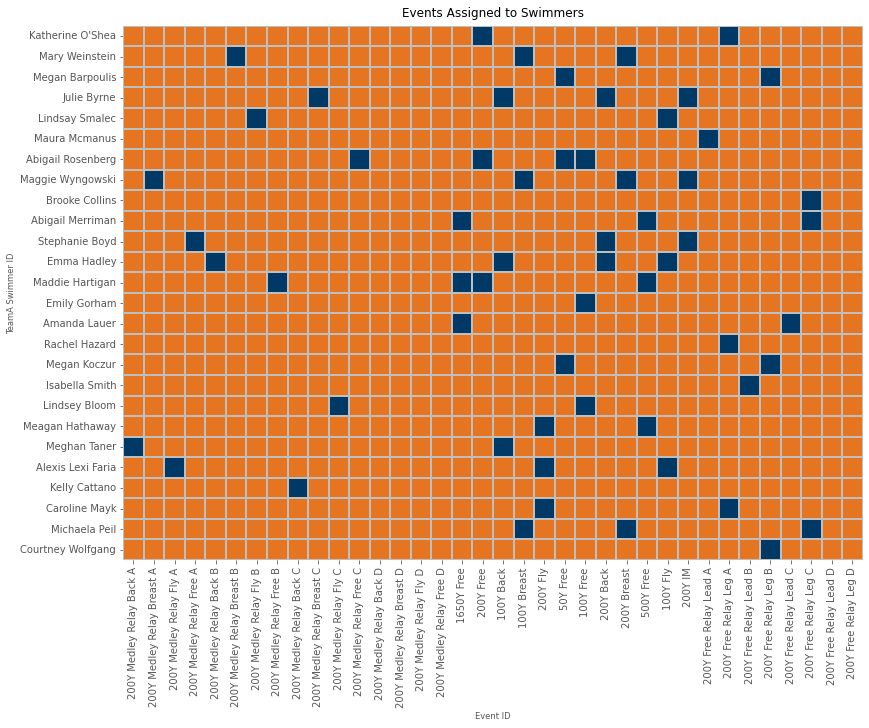

In [46]:
# Check out the "new" lineup
ChartLineup('TeamA', TeamA_colors, TeamA_Lineup_df[1], 18, 10)


### How have the total events per athlete changed?

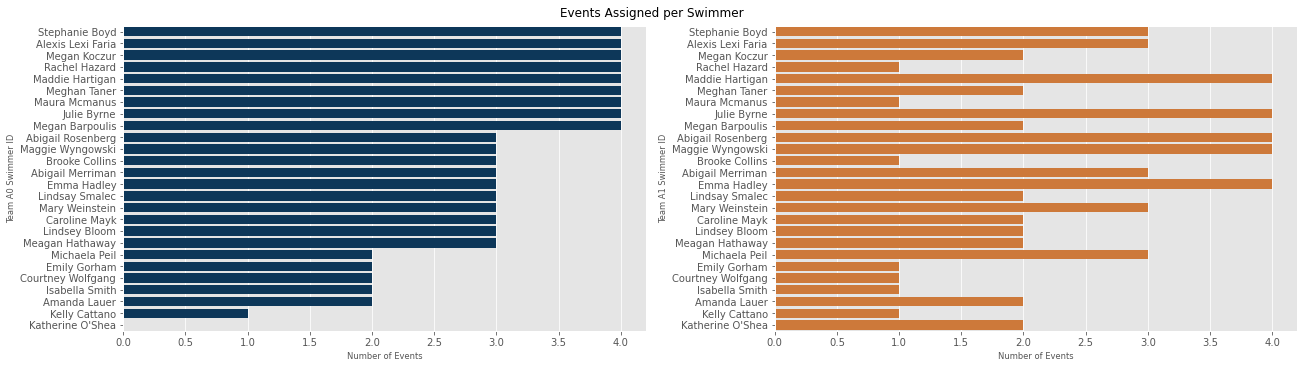

In [47]:
# How many Events for each swimmer?

fig, axs = plt.subplots(1, 2, figsize=(18, 5), constrained_layout=True)

# Team A Lineup 0
TeamA0_TotEventsPerAth = TeamA_Lineup_df[0].sum(axis=1).sort_values(ascending=False).to_frame().rename(columns={0: "tot_events"})
TeamA0_TotEventsPerAth = pd.merge(left= TeamA0_TotEventsPerAth, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True)
sns.barplot(y=TeamA0_TotEventsPerAth.name, x=TeamA0_TotEventsPerAth.tot_events, order=TeamA0_TotEventsPerAth.name,color= TeamA_blue,ax=axs[0])

# Team A Lineup 1
TeamA1_TotEventsPerAth = TeamA_Lineup_df[1].sum(axis=1).to_frame().rename(columns={0: "tot_events"})
TeamA1_TotEventsPerAth = pd.merge(left= TeamA1_TotEventsPerAth, right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True)
sns.barplot(y=TeamA1_TotEventsPerAth.name, x=TeamA1_TotEventsPerAth.tot_events, order=TeamA0_TotEventsPerAth.name, color = TeamA_orange,ax=axs[1])

#clean up the charts
fig.suptitle('Events Assigned per Swimmer')
axs[0].set_ylabel('Team A0 Swimmer ID',fontsize='small')
axs[1].set_ylabel('Team A1 Swimmer ID',fontsize='small')

#for ax in axs:
#    ax.set_ylim([0, 4.2])
axs[0].set_xlabel('Number of Events', fontsize='small')
axs[1].set_xlabel('Number of Events', fontsize='small')
plt.show()

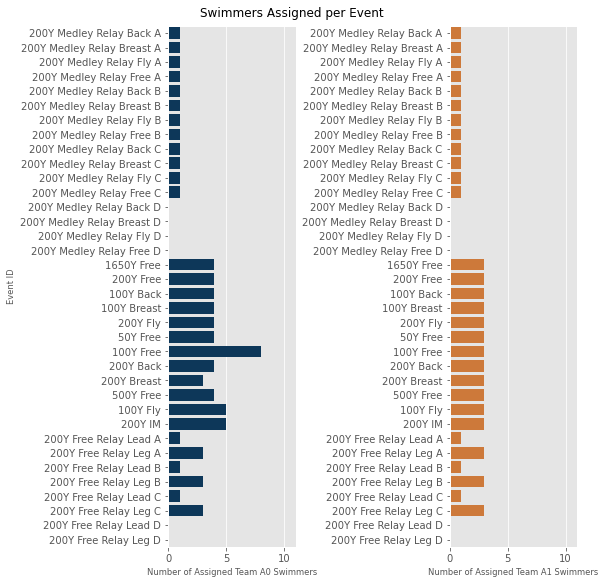

In [48]:
# How many athletes for each event?

fig, axs = plt.subplots(1, 2, figsize=(8, 8), sharey=False, constrained_layout=True)

# Team A old
TeamA = TeamA_Lineup_df[0].rename(columns=EventLabelConvertDict).sum(axis=0)
sns.barplot(y=TeamA.index, x=TeamA.values, color= TeamA_blue,ax=axs[0], ci=None)

#Team A new
TeamA1 = TeamA_Lineup_df[1].rename(columns=EventLabelConvertDict).sum(axis=0)
sns.barplot(y=TeamA1.index, x=TeamA1.values, color= TeamA_orange, ax=axs[1], ci=None)

#clean up the charts
fig.suptitle('Swimmers Assigned per Event')
axs[0].set_ylabel('Event ID',fontsize='small')

for ax in axs:
    ax.set_xlim([0, 11])
axs[0].set_xlabel('Number of Assigned Team A0 Swimmers', fontsize='small')
axs[1].set_xlabel('Number of Assigned Team A1 Swimmers', fontsize='small')
plt.show()

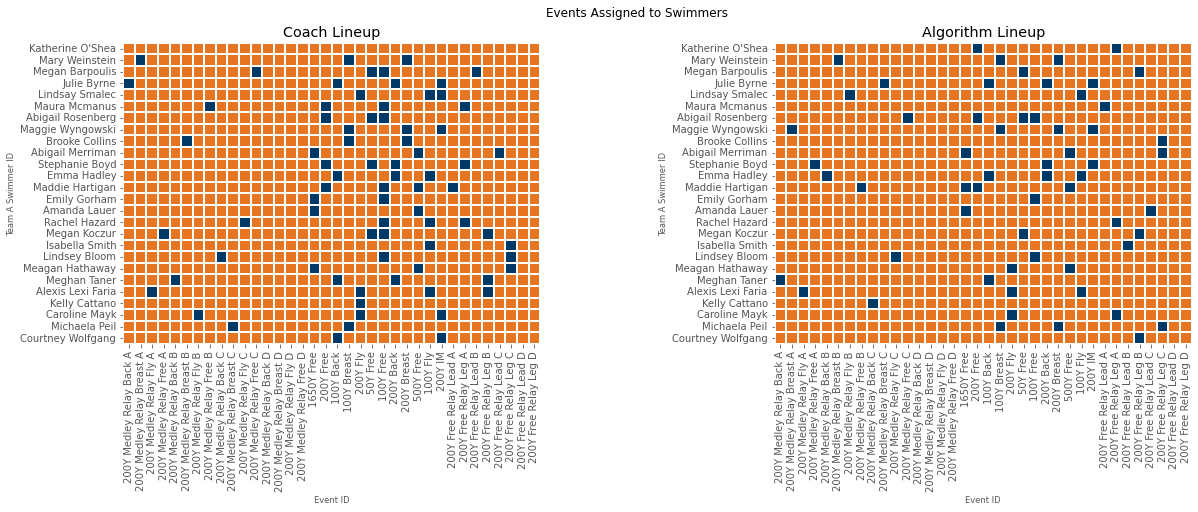

In [49]:
# Displaying dataframe as a heatmap 
fig, axs = plt.subplots(1, 2, figsize=(18, 7), constrained_layout=True)

# Make swimmer names the index
TeamA0_Lineup_Clean_df = pd.merge(left= TeamA_Lineup_df[0], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')
TeamA1_Lineup_Clean_df = pd.merge(left= TeamA_Lineup_df[1], right= Swimmer_Names_df[['name']], how= 'left', left_index= True,right_index=True).set_index('name')

TeamA0_Lineup_Clean_df = TeamA0_Lineup_Clean_df.rename(columns=EventLabelConvertDict)
TeamA1_Lineup_Clean_df = TeamA1_Lineup_Clean_df.rename(columns=EventLabelConvertDict)

sns.heatmap(TeamA0_Lineup_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[0], cmap= TeamA_colors )
sns.heatmap(TeamA1_Lineup_Clean_df, linewidths = 0.30, annot = False, cbar= False, square= True, ax= axs[1], cmap= TeamA_colors )

#clean up the charts
fig.suptitle('Events Assigned to Swimmers')
axs[0].set_ylabel('Team A Swimmer ID',fontsize='small')
axs[1].set_ylabel('Team A Swimmer ID',fontsize='small')

axs[0].set_xlabel('Event ID', fontsize='small')
axs[1].set_xlabel('Event ID', fontsize='small')

axs[0].set_title("Coach Lineup")
axs[1].set_title("Algorithm Lineup")

plt.show()

### Highlight the differences between the two lineups

### MAKE THIS A FUNCTION TO ACCEPT TWO LINEUPS AND RETURN THE DIFF LU_old and LU_new

In [50]:
def ChartLUdiff(TeamName,Team3color, LU_old, LU_new, FigSize_h, FigSize_l):
    """
    :param TeamName: String of Team name, e.g. 'Bucknell'
    :param LU_old: Dataframe of team lineup #1. Index is swimmer_id and columns are events
    :param LU_new: Dataframe of team lineup #2. Index is swimmer_id and columns are events
    :param Team3Color: Matplotlib color for Team B columns, e.g. [(0,.22,.4), (1,1,1), (0.9,0.46,0.13)]
    :param FigSize_h, FigSize_l: figur height and width in inches.

    #returns plot of given lineup

    """
    
    # Displaying dataframe of differences as a heatmap 
    fig, ax = plt.subplots(1, 1, figsize=(FigSize_h, FigSize_l), constrained_layout=True)
    
    # values are 1/0, so + diff is an add in the new LU, 0 is no change, and -1 is dropped.
    sns.heatmap((LU_new - LU_old), linewidths = 0.10, annot = False, ax=ax, cbar= True, square= True, cmap= Team3color, linecolor='.75' )

    #clean up the charts
    fig.suptitle('Lineup Differences')
    ax.set_ylabel('{} Swimmer ID'.format(TeamName),fontsize='small')
    ax.set_xlabel('Event ID', fontsize='small')

    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([-2/3,0, 2/3])
    colorbar.set_ticklabels(['Dropped', 'Same', 'Added'])
    # #colorbar.ax.invert_yaxis()

    return

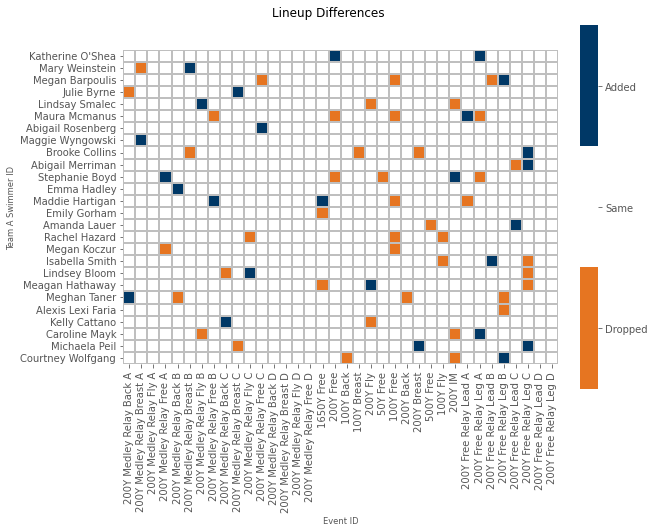

In [51]:
TeamA_3colors = [TeamA_orange, (1,1,1), TeamA_blue ]
ChartLUdiff('Team A',TeamA_3colors, TeamA0_Lineup_Clean_df, TeamA1_Lineup_Clean_df, 9, 7)

### Score the meet with the new lineup (137 vs 125 predicted for Team A under old lineup).


In [52]:
score_A,score_B,eventScore_df_2 = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[1], \
    TeamB_Perf_wM_df, TeamB_Lineup_df[0], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B)

Projected scores: 
Team A:  146.0 
Team B:  116.0


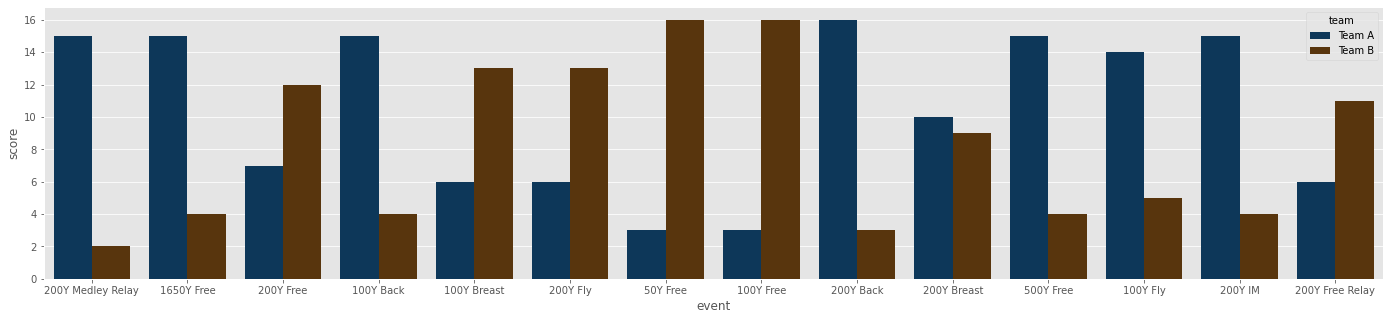

In [53]:
f, ax = plt.subplots(figsize=(24, 5))

# Set event field as category, reorder to meet order, and rename to user-friendly names
eventScore_df_2.event = eventScore_df_2.event.astype('category')
eventScore_df_2.event = eventScore_df_2.event.cat.reorder_categories(EventScoreOrder)
eventScore_df_2.event = eventScore_df_2.event.cat.rename_categories(EventScoreLabelConvertDict )

sns.barplot(x="event", y="score", hue='team', data=eventScore_df_2, palette=[TeamA_blue, TeamB_brown], ci=None);

### So our improved lineup results in a forecasted win by 30 points from the previous lineup's forecasted win by 12 points. What does the algorithm say that Team B should do to lineups 0 (base) and optimized (1)? Assume that the opponents lineup is known

### Team B recommended response to the base lineup (Team A LU 0):

### 1. Get opptime for Team A's Base Lineup

In [54]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event
TeamA_lineupNums = 1
opptime_TeamA_dict = dict()
for i in range(TeamA_lineupNums):
    opptime_TeamA_dict[i+1] = create_opptime_dict(TeamA_Perf_wM_df, TeamA_Lineup_df[i], BigM)

print(opptime_TeamA_dict[1][3])

{'M50': 111.17899999999999, 'F50': 268.319, 'F11650Y': 1039.339, 'F1200Y': 114.31899999999999, 'F2100Y': 55.829, 'F3100Y': 68.419, 'F4200Y': 124.419, 'F150Y': 24.308999999999997, 'F1100Y': 53.059000000000005, 'F2200Y': 120.979, 'F3200Y': 146.289, 'F1500Y': 299.439, 'F4100Y': 55.749, 'F5200Y': 124.529}


### 2. Find the MeetOpt lineup for the base Team A lineup

In [55]:
# Do this for Team_A and then make a new function after getting it to work
# Drop all the peformance columns for B, C, and D relays. They are all identical to the A values
TeamB_Perf_df_MO = TeamB_Perf_wM_df.loc[:,~TeamB_Perf_wM_df.columns.str.endswith(('B','C','D'))]

# List the columns of the predicted performance list
# TeamB_pred_perf_events = TeamB_Perf_df_MO.columns.tolist()
# print(TeamB_pred_perf_events)

In [56]:
# Get list of swimmer IDs from Team B
TeamB_swimmers = TeamB_Perf_df_MO.index.values.tolist()
print(TeamB_swimmers)

[195456, 197178, 213253, 233796, 233836, 256012, 271442, 271492, 273646, 273907, 282290, 291023, 323285, 330114, 330349, 342505, 342630, 342918, 345696, 377792, 403859, 404163, 405026, 411706, 422229, 432465, 494957, 696579]


In [57]:
# Create the Team B dictionary in the right structure
# Convert pandas to dict and use Swimmer as row index and Event as columns
# Already includes BigM values!
TeamB_Perf_dict = TeamB_Perf_df_MO.to_dict(orient='index')
# Show the values
TeamB_Perf_dict[197178]['FLF50A']

105.96

In [58]:
# For CONSISTENCY:

# Get the number of opponent lineups (scenarios) and their associated probabilities
# These will be generated from game theory later

# Need to use this structre for MeetOpt and to allow for more than one scenario later
# for 3 lineups
# opp_lineup_nums = [1,2,3]
# opp_lineup_num = (.1,.5,.4)
oppA_lineup_nums = [1]
oppA_lineup_select_prob = (1,) 

# connect the lineup nums with their associate probs in a dictionary for MeetOpt
oppA_scenario_prob = dict(zip(oppA_lineup_nums,oppA_lineup_select_prob))

print(oppA_scenario_prob)

{1: 1}


In [59]:
# Find MeetOpt response for Team B to the base for Team A (LU 0)
TeamB_Lineup_df[1],_,_ = MeetOpt(TeamB_swimmers, oppA_lineup_nums, oppA_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamB_Perf_dict,opptime_TeamA_dict, BigM)

# Reorder the columns to the meet event order
TeamB_Lineup_df[1] = TeamB_Lineup_df[1][EventOrder]

NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Total Setup Time =  0  secs
Solve the baseline problem:
Gurobi Opt

In [60]:
# Clean up the output (-0.0) by making all integers
TeamB_Lineup_df[1] = TeamB_Lineup_df[1][TeamB_Lineup_df[1].columns].astype('int8')

### MeetOpt creates a lineup with an expected score of 132 points for Team B vs. the base lineup from Team A. Recall that with Team B's base lineup (vs. Team A's base lineup) we projected (and in reality it matched) a score of 137-125. To account for the tie rules, what is the better prediction from these two lineups?

In [61]:
score_A,score_B,eventScore_df_3 = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[0], \
    TeamB_Perf_wM_df, TeamB_Lineup_df[1], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B,"\nDiff: ", score_A-score_B)

Projected scores: 
Team A:  130.0 
Team B:  132.0 
Diff:  -2.0


### What if each team used the MeetOpt lineups vs each other?

In [62]:
score_A,score_B,eventScore_df_4 = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[1], \
    TeamB_Perf_wM_df, TeamB_Lineup_df[1], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B,"\nDiff: ", score_A-score_B)

Projected scores: 
Team A:  144 
Team B:  118 
Diff:  26


*****************
## Section START: GAME THEORY: What if these were the only two lineups they could use? What would be the best response?

### First create a function to solve a game theory matrix

In [63]:
def FindOptStrategy(team, payoffmatrix):
    try:
        # Create variables
        numrows = len(payoffmatrix)    # payoff matrix number of rows
        numcols = len(payoffmatrix[0]) # payoff matrix number of columns
        
        if team == "B":
            # Create a new model
            optModelB = Model("TeamBStrategy")
            optModelB.reset()

            #optModelB.setParam('Presolve',0)

            g = optModelB.addVars(numcols, lb= 0.0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="g")
            u = optModelB.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS,name="u")

            # Set objective
            optModelB.setObjective(u, GRB.MINIMIZE)

            # Add constraint: sumproduct down rows <= bound u.
            optModelB.addConstrs((quicksum(payoffmatrix[i][j]*g[j] for j in range(numcols)) <= u for i in range(numrows)),"bounds")

            # Add constraint: sum of f  = 1, well defined distribution
            optModelB.addConstr(quicksum(g[i] for i in range(numcols)) == 1, "c1")

            optModelB.optimize()
            print (optModelB.display())

            policy, value = printSolution(optModelB)

        elif team == "A":
            # Create a new model
            optModelA = Model("TeamAStrategy")
            optModelA.reset()

            #optModelA.setParam('Presolve',0)

            f = optModelA.addVars(numrows, lb=0.0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="f")
            v = optModelA.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS,name="v")

            # Set objective
            optModelA.setObjective(v, GRB.MAXIMIZE)

            # Add constraint: sumproduct down rows <= bound u.
            optModelA.addConstrs((quicksum(payoffmatrix[i][j]*f[i] for i in range(numrows)) >= v for j in range(numcols)),"bounds")

            # Add constraint: sum of f  = 1, well-defined distribution
            optModelA.addConstr(quicksum(f[i] for i in range(numrows)) == 1, "c2")
        
            optModelA.optimize()
            print (optModelA.display())

            policy, value = printSolution(optModelA)

        return policy, value

    except GurobiError as e:
        print('Error code ' + str(e.errno) + ": " + str(e))

    except AttributeError:
        print('Encountered an attribute error')
        
def printSolution(m):
    answer_dic = {}

    for var in m.getVars():
        print('%s %g' % (var.varName, var.x))
        answer_dic.update({var.varName : var.x})

    print('Obj: %g' % m.objVal)

    #return the variables and their optimal values
    return answer_dic, m.objVal

### Use model to find the optimal strategy for each team

In [64]:
# Create the score matrix with Team
LineupA0vB0 = 12
LineupA0vB1 = -2
LineupA1vB0 = 30
LineupA1vB1 = 26

score_matrix = [[LineupA0vB0 ,LineupA0vB1], [LineupA1vB0,LineupA1vB1]]

#Return the Nash equilibrium mixed strategy and expected points for team A and team B.
f,optB = FindOptStrategy('A', score_matrix)
g,optA = FindOptStrategy('B', score_matrix)

print('\n Printing f: ',f)
print('\n Printing optA: ', optA)
print('\n Printing g: ', g)
print('\n Printing optB: ',optB)

Discarded solution information
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3 rows, 3 columns and 8 nonzeros
Model fingerprint: 0xd1638404
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.600000000e+01
Maximize
  <gurobi.LinExpr: v>
Subject To
  bounds[0]: <gurobi.LinExpr: 12.0 f[0] + 30.0 f[1] + -1.0 v> >= 0
  bounds[1]: <gurobi.LinExpr: -2.0 f[0] + 26.0 f[1] + -1.0 v> >= 0
  c2: <gurobi.LinExpr: f[0] + f[1]> = 1
Bounds
  v free
None
f[0] 0
f[1] 1
v 26
Obj: 26
Discarded

### Display the Payoff Matrix for all four lineup pairs

In [65]:
#from tabulate import tabulate
from IPython.display import display, HTML

payoff_df = pd.DataFrame({"Team B LU 0": [LineupA0vB0, LineupA1vB0], "Team B LU 1": [LineupA0vB1, LineupA1vB1]}, index=['Team A LU 0', 'Team A LU 1'])  
display(HTML(payoff_df.to_html())) 
#df.to_latex()

,Team B LU 0,Team B LU 1
Team A LU 0,12,-2
Team A LU 1,30,26


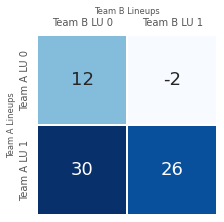

In [66]:
# Displaying dataframe as an heatmap 
fig, axs = plt.subplots(1, 1, figsize=(3, 3), constrained_layout=True)

sns.heatmap(payoff_df, linewidths = 0.3, annot = True, 
            annot_kws={"size": 18},cbar= False, square= True, cmap= 'Blues')


#clean up the charts
#fig.suptitle('Lineup Payoff Matrix')
axs.set_ylabel('Team A Lineups',fontsize='small')
axs.set_xlabel('Team B Lineups', fontsize='small')

axs.xaxis.tick_top()
axs.tick_params(left=False, top=False) ## other options are right and top
axs.xaxis.set_label_position('top') 

plt.show()

### FIX WORDING: The Nash Equilibrium is for both teams to use their respective lineups 1. Where Lehigh will lose by 25 points. These lineups (created by MeetOpt) are in response to the other team using LU 0, so a better lineup in response to LU 1 may also exist leading to a 3x3 strategy. Alternatively, you could create a lineup in response to the other team being equally likely to choose one of the other lineups.

## Let's extend this one more step by adding optimal responses to opponents LU 1s.

### Team A's response to Team B's LU 1:

### 1. Get opptime for Team B's LU 1:

In [67]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event
TeamB_lineupNums = 1
opptime_TeamB_dict = dict()
for i in range(TeamB_lineupNums):
    # Doing this for LU 1 for Team B
    opptime_TeamB_dict[i+1] = create_opptime_dict(TeamB_Perf_wM_df, TeamB_Lineup_df[1], BigM)

print(opptime_TeamB_dict[1][3])

{'M50': 481.319, 'F50': 443.279, 'F11650Y': 1099.049, 'F1200Y': 112.639, 'F2100Y': 252.19899999999998, 'F3100Y': 66.919, 'F4200Y': 1589.039, 'F150Y': 23.819, 'F1100Y': 51.499, 'F2200Y': 130.599, 'F3200Y': 143.049, 'F1500Y': 307.529, 'F4100Y': 61.169000000000004, 'F5200Y': 139.599}


### 2. Find the MeetOpt response to Team B LU 1

In [68]:
# def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime):

# Find MeetOpt response lineup to the base
TeamA_Lineup_df[2],r,w = MeetOpt(TeamA_swimmers, oppB_lineup_nums, oppB_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamA_Perf_dict,opptime_TeamB_dict,BigM)

# Reorder the columns to the meet event order
TeamA_Lineup_df[2] = TeamA_Lineup_df[2][EventOrder]

NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Total Setup Time =  0  secs
Solve the baseline problem:
Gurobi Opt

In [69]:
# Clean up the output (-0.0) by making all integers
TeamA_Lineup_df[2] = TeamA_Lineup_df[2][TeamA_Lineup_df[2].columns].astype('int8')

In [70]:
#########
# JUST FOR DEBUGGING
indiv_score_dict = {1:9,2:4,3:3,4:2,5:1,6:0}
relay_score_dict = {1:11,2:4,3:2}

In [71]:
#########
# JUST FOR DEBUGGING

for ev in ['F11650Y','F1200Y','F2100Y','F3100Y','F4200Y','F150Y','F1100Y','F2200Y','F3200Y','F1500Y','F4100Y','F5200Y']:
    tot=0
    for p in [1,2,3]:
        if isnan(w.loc[p,ev]):
            point = 0 
        else: 
            point = indiv_score_dict[w.loc[p,ev]]
            #point = w.loc[p,ev]
        tot = point + tot
    print(ev, " ", tot)

for ev in ['M50','F50']:
    tot=0
    for p in [1,2,3]:
        if isnan(w.loc[p,ev]):
            point = 0 
        else: 
            point = relay_score_dict[w.loc[p,ev]]
            #point = w.loc[p,ev]
        tot = point + tot
    print(ev, " ", tot)

##########

F11650Y   15
F1200Y   8
F2100Y   15
F3100Y   6
F4200Y   6
F150Y   4
F1100Y   4
F2200Y   16
F3200Y   10
F1500Y   15
F4100Y   14
F5200Y   15
M50   15
F50   15


### 3. Verify the score would be if these two LUs competed

In [72]:
# Which lineups to score in a competition?
TeamA_LU = 2
TeamB_LU = 1

score_A,score_B,eventScore_df_5 = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[TeamA_LU], \
    TeamB_Perf_wM_df, TeamB_Lineup_df[TeamB_LU], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B, "\nDiff: ", score_A-score_B)

Projected scores: 
Team A:  158 
Team B:  104 
Diff:  54


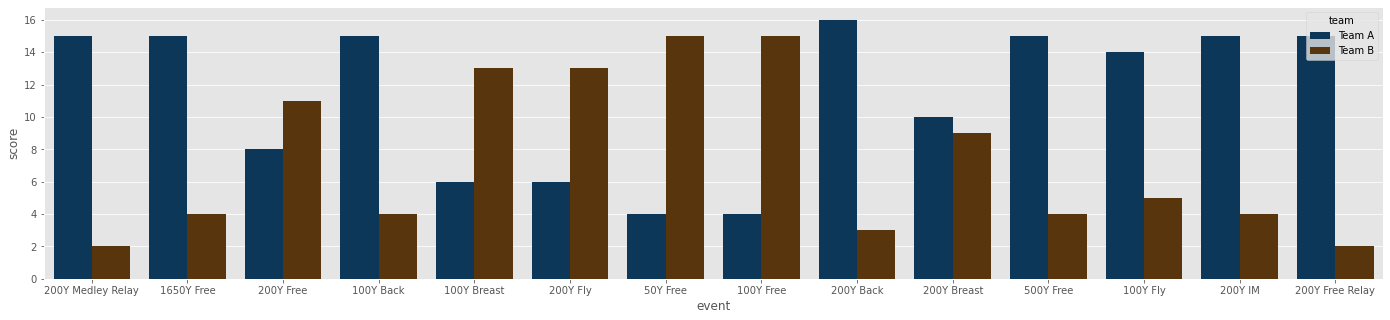

In [73]:
# Viz of team scores for Team A LU 2 vs Team B LU 1
ChartScore(eventScore_df_5, TeamA_blue, TeamB_brown,24,5)

In [74]:
#####
# Debugging Code

print((TeamA_Lineup_df[2]*TeamA_Perf_wM_df)[['FLM50A', 'F2M50A','F3M50A','F4M50A']].max().sum(), "  ",\
    (TeamA_Lineup_df[2]*TeamA_Perf_wM_df)[['FLM50B', 'F2M50B','F3M50B','F4M50B']].max().sum(), "  ", \
    (TeamA_Lineup_df[2]*TeamA_Perf_wM_df)[['FLM50C', 'F2M50C','F3M50C','F4M50C']].max().sum())

105.16    105.42    394.92999999999995


In [75]:
#####
# Debugging Code

print((TeamB_Lineup_df[1]*TeamB_Perf_wM_df)[['FLM50A', 'F2M50A','F3M50A','F4M50A']].max().sum(), "  ",\
    (TeamB_Lineup_df[1]*TeamB_Perf_wM_df)[['FLM50B', 'F2M50B','F3M50B','F4M50B']].max().sum(), "  ", \
    (TeamB_Lineup_df[1]*TeamB_Perf_wM_df)[['FLM50C', 'F2M50C','F3M50C','F4M50C']].max().sum())

105.47999999999999    106.11    481.32


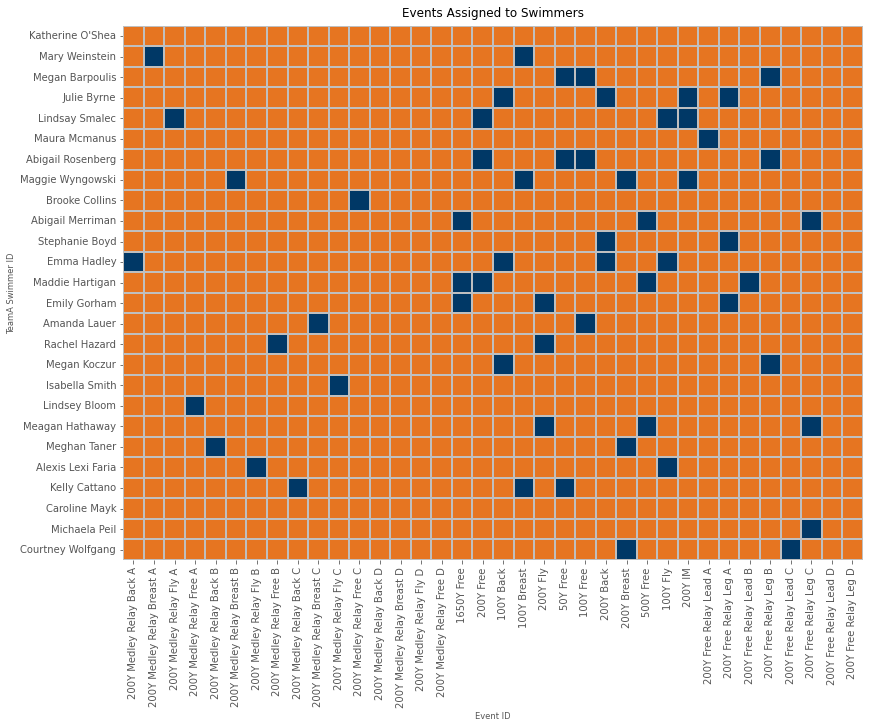

In [76]:
# Viz of Team LU 2
ChartLineup('TeamA', TeamA_colors, TeamA_Lineup_df[2], 18, 10)

### Team A LU 2 vs Team B LU 1 and Team A wins by 54. 

### Team B's Response to Team A's LU 1:

### 1. Get opptime for Team A's LU 1:

In [77]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event
TeamA_lineupNums = 1
opptime_TeamA_dict = dict()
for i in range(TeamA_lineupNums):
    # Doing this for LU 1 for Team A
    opptime_TeamA_dict[i+1] = create_opptime_dict(TeamA_Perf_wM_df, TeamA_Lineup_df[1], BigM)

print(opptime_TeamA_dict[1][3])

{'M50': 392.04900000000004, 'F50': 443.279, 'F11650Y': 1035.659, 'F1200Y': 503.559, 'F2100Y': 55.829, 'F3100Y': 68.419, 'F4200Y': 124.399, 'F150Y': 24.308999999999997, 'F1100Y': 55.929, 'F2200Y': 120.979, 'F3200Y': 154.339, 'F1500Y': 299.439, 'F4100Y': 55.749, 'F5200Y': 126.59899999999999}


### 2. Find the MeetOpt Team B response LU to Team A LU 1

In [78]:
# def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime):

# Find MeetOpt response lineup to the base
TeamB_Lineup_df[2],_,_ = MeetOpt(TeamB_swimmers, oppA_lineup_nums, oppA_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamB_Perf_dict,opptime_TeamA_dict,BigM)

# Reorder the columns to the meet event order
TeamB_Lineup_df[2] = TeamB_Lineup_df[2][EventOrder]

NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Total Setup Time =  0  secs
Solve the baseline problem:
Gurobi Opt

### 3. Verify the score if these two LUs compete.

# NEED TO FIX eventScore_df to be a list of dfs!

In [79]:
# Which lineups to score in a competition?
TeamA_LU = 1
TeamB_LU = 2

score_A,score_B,eventScore_df_6 = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[TeamA_LU], \
    TeamB_Perf_wM_df, TeamB_Lineup_df[TeamB_LU], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B, "\nDiff: ", score_A-score_B)

Projected scores: 
Team A:  131 
Team B:  131 
Diff:  0


### Team A LU 1 vs. Team B LU 2 and Team A wins by 8.

In [80]:
# Which lineups to score in a competition?
TeamA_LU = 1
TeamB_LU = 0

score_A,score_B,eventScore_df_6 = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[TeamA_LU], \
    TeamB_Perf_wM_df, TeamB_Lineup_df[TeamB_LU], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B, "\nDifference: ", score_A-score_B)

Projected scores: 
Team A:  146.0 
Team B:  116.0 
Difference:  30.0


# Game Theory 3x3

In [81]:
# Create the score matrix with Team
LineupA0vB0 = 12
LineupA0vB1 = -2
LineupA0vB2 = 30

LineupA1vB0 = 30
LineupA1vB1 = 26
LineupA1vB2 = 0

LineupA2vB0 = 22
LineupA2vB1 = 54
LineupA2vB2 = 24

score_matrix = [[LineupA0vB0, LineupA0vB1, LineupA0vB2], [LineupA1vB0, LineupA1vB1, LineupA1vB2], [LineupA2vB0, LineupA2vB1, LineupA2vB2]]

#Return the Nash equilibrium mixed strategy and expected points for team A and team B.
f,optB = FindOptStrategy('A', score_matrix)
g,optA = FindOptStrategy('B', score_matrix)

print('\n Printing f: ',f)
print('\n Printing optA: ', optA)
print('\n Printing g: ', g)
print('\n Printing optB: ',optB)

Discarded solution information
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 4 columns and 14 nonzeros
Model fingerprint: 0x98d3d453
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 0 columns
Presolve time: 0.01s
Presolved: 3 rows, 4 columns, 11 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000000e+01   6.250000e+00   0.000000e+00      0s
       3    2.2500000e+01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.250000000e+01
Maximize
  <gurobi.LinExpr: v>
Subject To
  bounds[0]: <gurobi.LinExpr: 12.0 f[0] + 30.0 f[1] + 22.0 f[2] + -1.0 v> >= 0
  bounds[1]: <gurobi.LinExpr: -2.0 f[0] + 26.0 f[1] + 54.0 f[2] + -1.0 v> >= 0
  bo

### Optimal mixed strategy is for Team A (0,1/16,15/16) for Team B (3/4,0,1/4) with expected score of Team A winning by 24.5 points on average.

In [82]:
payoff3x3_df = pd.DataFrame({"Team B LU 0": [LineupA0vB0, LineupA1vB0, LineupA2vB0], "Team B LU 1": [LineupA0vB1, LineupA1vB1, LineupA2vB1], "Team B LU 2": [LineupA0vB2, LineupA1vB2, LineupA2vB2]}, index=['Team A LU 0', 'Team A LU 1', 'Team A LU 2'])  
display(HTML(payoff3x3_df.to_html())) 
#df.to_latex()

,Team B LU 0,Team B LU 1,Team B LU 2
Team A LU 0,12,-2,30
Team A LU 1,30,26,0
Team A LU 2,22,54,24


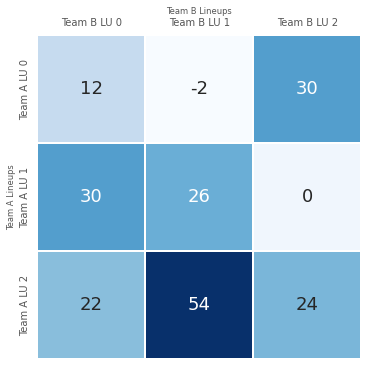

In [83]:
# Displaying dataframe as an heatmap 
fig, axs = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

sns.heatmap(payoff3x3_df, linewidths = 0.3, annot = True, 
            annot_kws={"size": 18},cbar= False, square= True, cmap= 'Blues')


#clean up the charts
#fig.suptitle('Lineup Payoff Matrix')
axs.set_ylabel('Team A Lineups',fontsize='small')
axs.set_xlabel('Team B Lineups', fontsize='small')

axs.xaxis.tick_top()
axs.tick_params(left=False, top=False) ## other options are right and top
axs.xaxis.set_label_position('top') 

plt.show()

*************************************
## Section START: Determining the Swimmer Meet Impact (SMI) for a given opponent and lineup (later: distribution of opponent lineups). The SMI for a swimmer can never be more than the total expected points the swimmer is projected to receive versus an opponent, but it can be as low as zero if an adjusted lineup exists where swimmers can be shuffled to still acheive all the points lost by the removed swimmer. Therefore, this is the "impact" of that swimmer with respect to the current opponent and projected performance times.

### Create a MeetOpt version where a swimmer (and events can be restricted from the optimization)

In [84]:
"""
Created on Sat Jan 12 09:14:40 2019

@author: mdb025
"""

def MeetOptwSMI(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime, SMI_athlete, SMI_event, Big_M):
    """
    :param athletFull: list of athlete IDs
    :param scenario: integer list of the opponent lineups, e.g. [1, 2]
    :param scenprob: dictionary of scenarios to probability (or weight) of selection. This will be the
    the likelihood that the lineup is chosen from a game theory distribution.
    :param indiv_scored_events: a list of the names of the events that are scored in a meet for the individuals
    :param relaynoMR: the list of names of scored freestyle relay events (no medleys)
    :param stroke: the list of names of the legs of the medley relay
    :param relay_scored_events: names of relay events scored and in opptime
    :param lineup_events: the events list that need to be returned for Team A includes relays A,B,C data from xvar, yvar, zvar.
    :param playperf: the dictionary of predicted performances for Team A athletes in each event. indexed by (indiv_scored_events and relay_past_perf_events)
    :param opptime: the dictionary of opposing team ranked performances. Indexed by scenario (lineup), rank (1,2,3,4,5), events (indiv_scored_events and relay_scored_events)

    :param: SMI_athlete: the string code of the athlete to restrict from an event (or all events)
    :param: SMI_event: A list of events for which the athlete is restricted from participating (use specific code or 'M50' 'F50' for relays) 
            or 'All' if restricted from all events to get the event independent SMI, e.g ['M50', 'All', 'F150Y']
    
    #returns optimal response line up to the given opponent lineup(s) (called scenarios)
    
    """

    # Assumes there are enough athletes to field a full team  

    print("NOW WE'RE IN MEETOPT with SMI: \n")


    ## Begin INPUT SETTINGS
    # 1 if want to write output to file at the following path
    # WriteOutput = 0
    # path of the output file adjust for user
    # if WriteOutput == 1:    
    #    path = "G:\My Drive\SwimMeetOpt" + "\SwimMeetOptTrialResults.csv"

    # Used for comparison
    tot_scored_events = indiv_events + relay_scored_events
    tot_pastperf_events = indiv_events + relay_pastperf_events
    tot_assgn_events = lineup_events
    relay = relay_scored_events

    #tuples for dictionaries
    event_noMR = indiv_events + relaynoMR
    print("event_noMR: ", event_noMR)
    print(scenprob)
    print("total SCORED events: ", tot_scored_events)
    print("total PERF events: ", tot_pastperf_events)
    print("total ASSIGNED events:", lineup_events)
    
    homerank = (1,2,3)  
    place = (1,2,3,4,5,6)
    ind_points = (9, 4, 3, 2, 1, 0)
    relay_points = (11,4,2,0,0,0)
    indivplcscore = dict(zip(place,ind_points))
    relayplcscore = dict(zip(place,relay_points)) 

    indiv = indiv_events
    
    #Do these exist in college?
    Maxevent = 4
    Maxrelayevent = 1
    Maxindevent = 3

    TopopprankIndiv = 5
    TopopprankRelay = 3


    #Set solve time limit in seconds and optimality gap
    MaxSolveTime = 10
    SolverTimeLimit = MaxSolveTime*60
    OptGap = 0.01
    #Which Solver?
    SolverUsed = "Gurobi"
    #SolverUsed = "Gurobi"

    if SolverUsed == "CBC":
        #Choose solver, and set it to problem, and build the model
        #Solve with CBC with logging and time limit. Parameter option: keepFiles=1 breaks it!
        #solver = pl.COIN_CMD(msg=1, keepFiles=1, presolve=0, threads=1, maxSeconds=SolverTimeLimit,fracGap = OptGap)
        #solver = pulp.COIN_CMD(msg=1, keepFiles=1, presolve=1, maxSeconds=SolverTimeLimit,fracGap=OptGap)
        pl.PULP_CBC_CMD()
    else:
        #Solve with Gurobi
        #solver = pulp.GUROBI_CMD(keepFiles=1,options=[("MIPFocus",1),("TimeLimit",SolverTimeLimit)])
        #solver = pl.GUROBI_CMD(keepFiles=1,options=[("MIPFocus",1),("MIPGap",OptGap),("TimeLimit",SolverTimeLimit)])
        solver = pl.GUROBI()
        #Solve with Cplex. Throws error for write sol file
        #solver = pulp.CPLEX_scCMD(msg=1,options = ['set mip tolerances mipgap 0.2'])
        #solver = pulp.CPLEX_CMD(msg=1,timelimit=30)


    #highest relative rank for home
    Tophomerank = 3;
    # small constant
    EPS = 0.0001;
    #number of people on a relay team
    relaySize = 4;
    
    #subset of the actual athletes with some 
    #ghosts because of hard relay requirements
    #realathlete are only the actual athletes
    # ActAthNum = len(athleteFull)
    # athlete = athleteFull[:int(ActAthNum)+4]
    #realathlete = athleteFull[:int(ActAthNum)]
    athlete = athleteFull
    # for i in realathlete:
    #      print("current realathlete index ", realathlete[realathlete.index(i)])
    #      print("previous athlete ", realathlete[realathlete.index(i)-1])

    #OUTPUT Arrays and Variables

    #Start the clock for first setup
    setupStart = time.time()
                
    print("Check Done")

    #Instantiate our problem class
    SwimMeetOpt = pl.LpProblem("MeetMax", pl.LpMaximize) 

    #Initialize the decision variables
    #Scenario scores vs. opps
    scenscorevars = {}
    # if assigned athlete has 1st time in event
    xvars = {}
    # if assigned athlete has 2nd best time in event 
    yvars = {}
    # if assigned athlete has 3rd best time in event
    zvars = {}
    # if assigned athlete has 1st time in start time in event 200MR
    xvarleads = {}
    # if assigned athlete has 2nd best time in start time in event 200MR
    yvarleads = {}
    # if assigned athlete has 3rd best time in start time in event 200MR
    zvarleads = {}
    # if assigned athlete has 1st time in medley
    xMRvars = {}
    # if assigned athlete has 2nd best time in medley 
    yMRvars = {}
    # if assigned athlete has 3rd best time in medley
    zMRvars = {}
    # rank of our athletes assigned to events
    rvars = {}
    #indicator variables of for outcome of event j versus opp 1
    wvars = {}
    #assignments
    asgnvars = {}
    
    #OPTIMIZATION DECISION VARIABLES defined in the MeetOpt paper using PuLP:

    #scenscorevar is a placeholder which will hold the expected score of our optimal
    #lineup against the lineup given in scenario i
    scenscorevar = pl.LpVariable.dicts('scenscorevar',(scenario),0,None,pl.LpContinuous)

    #these are placement variables for our athletes to events
    #xvar will hold the best assigned athlete from our team in an event
    #yvar will hold the second best assigned athlete from our team in an event
    #zvar will hold the third best assigned athlete from our team in an event
    #We assume that exactly three athletes are assigned to each event
    #the optimization creates the assignment and the ordering
    xvar = pl.LpVariable.dicts('xvar',(athlete,indiv),0,1,pl.LpBinary)
    yvar = pl.LpVariable.dicts('yvar',(athlete,indiv),0,1,pl.LpBinary)
    zvar = pl.LpVariable.dicts('zvar',(athlete,indiv),0,1,pl.LpBinary)

    
    #Same as above, but the starting leg for the "non-Medley freestyle Relay" relays
    xFRvarlead = pl.LpVariable.dicts('xFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    yFRvarlead = pl.LpVariable.dicts('yFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    zFRvarlead = pl.LpVariable.dicts('zFRvarlead',(athlete,relaynoMR),0,1,pl.LpBinary)
    
    #Same ordering as above, but for the athletes assigned to the 
    #best, second best, and third best LEGS of Freestyle relay
    xFRvar = pl.LpVariable.dicts('xFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    yFRvar = pl.LpVariable.dicts('yFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    zFRvar = pl.LpVariable.dicts('zFRvar',(athlete, relaynoMR),0,1,pl.LpBinary)
    
    #Same ordering as above, but for the athletes assigned to the 
    #best, second best, and third best medley relay
    xMRvar = pl.LpVariable.dicts('xMRvar',(athlete, stroke),0,1,pl.LpBinary)
    yMRvar = pl.LpVariable.dicts('yMRvar',(athlete, stroke),0,1,pl.LpBinary)
    zMRvar = pl.LpVariable.dicts('zMRvar',(athlete, stroke),0,1,pl.LpBinary)

    #rvar will hold the TIME of our first, second, and third fastest entrants in each event
    rvar = pl.LpVariable.dicts('rvar',(homerank,tot_scored_events),None,None,pl.LpContinuous)
    #wvar will be 1 if our athlete with homerank h, in event j, finishes in overall place k, against
    #opponent scenario l
    #with this we can answer in which place our assigned athletes actually finish and score the meet! 
    wvar = pl.LpVariable.dicts('wvar',(tot_scored_events,homerank, place, scenario),0,1,pl.LpBinary)
    #asgnvar is a generic variable which will be 1 if athlete i is assigned to event j (ignoring rank, etc.)
    #just answers the question "Is this athlete doing in this event?"
    #asgnvar = pl.LpVariable.dicts('asgnvar',(athlete,tot_assgn_events),0,1,pl.LpBinary)
    

    #Objective Function - Maximize the weighted scenario (or expected) score against
    #over eact scenario (or against each team)
    SwimMeetOpt += pl.lpSum(scenprob[s]*scenscorevar[s] for s in scenario), "Total Expected Score"
    print("obj done")

    # Multiple relay teams and they cannot sweep so only the top two relay teams are included in the home team score
    # defines the variable scenscorevar (scenario score variable) for each scenario
    for s in scenario:
        SwimMeetOpt += scenscorevar[s] == pl.lpSum(indivplcscore[p]*wvar[j][k][p][s] for j in indiv for k in homerank for p in place if k<=p) + \
            pl.lpSum(relayplcscore[p]*wvar[j][k][p][s] for j in relay_scored_events for k in homerank for p in place if k<=p) + \
            pl.lpSum(2*wvar[j][1][4][s] - 2*wvar[j][3][3][s] for j in relay_scored_events), "Scenario %s Score"%s


    #CREATING THE CONSTRAINTS FOR THE OPTIMIZATION PROBLEM:

    # Exactly one 1st, 2nd, 3rd best time athlete in each indiv event
    # WARNING: ASSUMES you have sufficent swimmers to meet all the events and relays with max requirements
    for j in indiv:        
        SwimMeetOpt += pl.lpSum(xvar[i][j] for i in athlete)  == 1, "Exactly one 1st for indiv event %s"%j
        SwimMeetOpt += pl.lpSum(yvar[i][j] for i in athlete)  == 1, "Exactly one 2nd for indiv event %s"%j
        SwimMeetOpt += pl.lpSum(zvar[i][j] for i in athlete)  == 1, "Exactly one 3rd for indiv event %s"%j

    # Exactly 4 athletes in a relay for our first, second, and third relays
    # accounting for the opening leg not being a flying start in the non-MR relays
    for j in relaynoMR:
        SwimMeetOpt += pl.lpSum(xFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 1st relay %s"%j
        SwimMeetOpt += pl.lpSum(yFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 2nd relay %s"%j
        SwimMeetOpt += pl.lpSum(zFRvar[i][j] for i in athlete) == relaySize-1, "Exactly 3 legs in 3rd relay %s"%j
        SwimMeetOpt += pl.lpSum(xFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 1st relay %s"%j
        SwimMeetOpt += pl.lpSum(yFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 2nd relay %s"%j
        SwimMeetOpt += pl.lpSum(zFRvarlead[i][j] for i in athlete) == 1, "Exactly 1 to start 3rd relay %s"%j

    # Exactly 4 athletes in the first, second, and third best medley relay
    SwimMeetOpt += pl.lpSum(xMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 1st MR"
    SwimMeetOpt += pl.lpSum(yMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 2nd MR"
    SwimMeetOpt += pl.lpSum(zMRvar[i][j] for i in athlete for j in stroke) == relaySize, "Exactly 4 in 3rd MR"
    
    # Athletes in at most Maxevent 
    for i in athlete: 
        SwimMeetOpt += pl.lpSum(xvar[i][j] + yvar[i][j] + zvar[i][j] for j in indiv)  + pl.lpSum(xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] for j in relaynoMR)+ pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= Maxevent, "Max events for athlete %s"%i



    #########################################################################################
    # START: Added for SMI Changes
    # For the SMI athlete restrict from assigning them the restricted events and build a lineup
    #

    print("Computing SMI for athlete ", SMI_athlete, " and event ", SMI_event)
    
    # If user is blocking individual event for swimmer
    for j in indiv:
        if ('All' in SMI_event) or (j in SMI_event): 
            SwimMeetOpt += xvar[SMI_athlete][j]==0
            SwimMeetOpt += yvar[SMI_athlete][j]==0
            SwimMeetOpt += zvar[SMI_athlete][j]==0

    # If user is blocking 200 Free Relay (F50) relay for swimmer
    if ('All' in SMI_event) or ('F50' in SMI_event):
        for j in relaynoMR:    
            SwimMeetOpt += xFRvar[SMI_athlete][j]==0
            SwimMeetOpt += yFRvar[SMI_athlete][j]==0
            SwimMeetOpt += zFRvar[SMI_athlete][j]==0
            SwimMeetOpt += xFRvarlead[SMI_athlete][j]==0
            SwimMeetOpt += yFRvarlead[SMI_athlete][j]==0
            SwimMeetOpt += zFRvarlead[SMI_athlete][j]==0

    # if user is blocking 200 Med Relay (M50) for swimmer
    if ('All' in SMI_event) or ('M50' in SMI_event):
        for j in stroke:
            SwimMeetOpt += xMRvar[SMI_athlete][j]==0
            SwimMeetOpt += yMRvar[SMI_athlete][j]==0
            SwimMeetOpt += zMRvar[SMI_athlete][j]==0

    # END: Added for SMI Changes
    ##############################################################################################
    
    
    # Athletes in at most Maxrelayevent
    for i in athlete:
        SwimMeetOpt += pl.lpSum(xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] for j in relaynoMR)+ pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= Maxrelayevent,"Max Relay events for athlete %s"%i
        # Athletes in at most Maxindivevent
        SwimMeetOpt += pl.lpSum(xvar[i][j] + yvar[i][j] + zvar[i][j] for j in indiv) <= Maxindevent,"Max Indiv events for athlete %s"%i 

        # Back to back event constraints
        #HARD CODED WITH EVENT NAMES AND NEEDS TO BE CHECKED
        '''
        SwimMeetOpt += xvar[i]["100F"] + yvar[i]["100F"] + zvar[i]["100F"] + xvar[i]["500F"] + yvar[i]["500F"] + zvar[i]["500F"]<= 1,"No back to back 100F/500F for athlete %s"%i
        SwimMeetOpt += xvar[i]["200F"] + yvar[i]["200F"] + zvar[i]["200F"] + xvar[i]["200IM"] + yvar[i]["200IM"] + zvar[i]["200IM"]<= 1,"No back to back 200F/200IM for athlete %s"%i
        SwimMeetOpt += xvar[i]["100BS"] + yvar[i]["100BS"] + zvar[i]["100BS"] + xvar[i]["100BR"] + yvar[i]["100BR"] + zvar[i]["100BR"]<= 1,"No back to back 100BS/100BR for athlete %s"%i
        '''

        # Athletes can only be one of the 1st, 2nd, or 3rd ranked atheletes assigned to an event j
        for j in indiv:
            SwimMeetOpt += xvar[i][j] + yvar[i][j] + zvar[i][j] <= 1,"athlete %s can only be one of the 1st, 2nd, or 3rd ranked athletes assigned to an event %s"%(i,j)

    #Athletes can only be 1st, 2nd, or 3rd ranked relay team for each relay j
    for i in athlete:  
        for j in relaynoMR:
            SwimMeetOpt += xFRvar[i][j] + yFRvar[i][j] + zFRvar[i][j] + xFRvarlead[i][j] + yFRvarlead[i][j] + zFRvarlead[i][j] <= 1,"athlete %s can only be one of the 1st, 2nd, or 3rd ranked athletes assigned to a relay event %s"%(i,j)
        
        # Each athlete can only perform one stroke in medley relay
        SwimMeetOpt += pl.lpSum(xMRvar[i][j]+yMRvar[i][j]+zMRvar[i][j] for j in stroke) <= 1, "Athlete %s can only perform one stroke in medley relay"%i
    
        
    #Each stroke on each relay team can only have one athlete assigned
    for j in stroke:
        SwimMeetOpt += pl.lpSum(xMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 1st MR can only have one athlete"%j
        SwimMeetOpt += pl.lpSum(yMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 2nd MR can only have one athlete"%j    
        SwimMeetOpt += pl.lpSum(zMRvar[i][j]for i in athlete) <= 1, "Stroke %s on 3rd MR can only have one athlete"%j
    
    #realized rank of athletes from assignments
    #IF NO RUNNER, NEED TO ASSIGN A time larger than the third runner, smaller than the BigM for rank
    for j in indiv: 
        SwimMeetOpt += rvar[1][j] == pl.lpSum(playperf[i][j]*xvar[i][j] for i in athlete) + 0.5*Big_M[j] + 1.0 - pl.lpSum(xvar[i][j]*(0.5*Big_M[j] + 1.0) for i in athlete)
        SwimMeetOpt += rvar[2][j] == pl.lpSum(playperf[i][j]*yvar[i][j] for i in athlete) + 0.5*Big_M[j] + 2.0 - pl.lpSum(yvar[i][j]*(0.5*Big_M[j] + 2.0) for i in athlete)
        SwimMeetOpt += rvar[3][j] == pl.lpSum(playperf[i][j]*zvar[i][j] for i in athlete) + 0.5*Big_M[j] + 3.0 - pl.lpSum(zvar[i][j]*(0.5*Big_M[j] + 3.0) for i in athlete)
    
     # The problem data is written to an .lp file
    #SwimMeetOpt.writeLP("SwimMeetOpt.lp")
    
    #WARNING: Sloppy hard code fix for legacy data structure 
    playperfLeg = dict()
    playperfLead = dict()
    for i in athlete:
        # declare dicts
        playperfLeg[i] = dict()
        playperfLead[i] = dict()
        for j in relaynoMR:
            playperfLeg[i][j] = playperf[i]['F1F50A']
            playperfLead[i][j] = playperf[i]['FLF50A']      
    
    for j in relaynoMR: 
        SwimMeetOpt += rvar[1][j] == pl.lpSum(playperfLeg[i][j]*xFRvar[i][j] + playperfLead[i][j]*xFRvarlead[i][j] for i in athlete) + relaySize*0.5*Big_M[j] + relaySize*1.0 - pl.lpSum((xFRvar[i][j]+xFRvarlead[i][j])*(0.5*Big_M[j] + 1.0) for i in athlete)
        SwimMeetOpt += rvar[2][j] == pl.lpSum(playperfLeg[i][j]*yFRvar[i][j] + playperfLead[i][j]*yFRvarlead[i][j] for i in athlete) + relaySize*0.5*Big_M[j] + relaySize*2.0 - pl.lpSum((yFRvar[i][j]+yFRvarlead[i][j])*(0.5*Big_M[j] + 2.0) for i in athlete)
        SwimMeetOpt += rvar[3][j] == pl.lpSum(playperfLeg[i][j]*zFRvar[i][j] + playperfLead[i][j]*zFRvarlead[i][j] for i in athlete) + relaySize*0.5*Big_M[j] + relaySize*3.0 - pl.lpSum((zFRvar[i][j]+zFRvarlead[i][j])*(0.5*Big_M[j] + 3.0) for i in athlete)

    SwimMeetOpt += rvar[1]["M50"] == pl.lpSum(playperf[i][j]*xMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*Big_M["M50"] + relaySize*1.0 - pl.lpSum(xMRvar[i][j]*(0.5*Big_M["M50"] + 1.0) for i in athlete for j in stroke)
    SwimMeetOpt += rvar[2]["M50"] == pl.lpSum(playperf[i][j]*yMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*Big_M["M50"] + relaySize*2.0 - pl.lpSum(yMRvar[i][j]*(0.5*Big_M["M50"] + 2.0) for i in athlete for j in stroke)
    SwimMeetOpt += rvar[3]["M50"] == pl.lpSum(playperf[i][j]*zMRvar[i][j] for i in athlete for j in stroke) + relaySize*0.5*Big_M["M50"] + relaySize*3.0 - pl.lpSum(zMRvar[i][j]*(0.5*Big_M["M50"] + 3.0) for i in athlete for j in stroke)

    #force consistency in rank order
    for k in homerank:
        for j in tot_scored_events:
            if k < Tophomerank:
                SwimMeetOpt += rvar[k][j] <= rvar[k+1][j]

    #runner/team of rank k can be place in at most one place (1st, 2nd, or 3rd) vs opp 1
    for j in indiv:
        for k in homerank:
            for s in scenario:
                SwimMeetOpt += pl.lpSum(wvar[j][k][l][s] for l in place if l >= k) <= 1 
    for j in relay:
        for k in homerank:
            for s in scenario:        
                SwimMeetOpt += pl.lpSum(wvar[j][k][l][s] for l in place if l >= k) <= 1

    #Did your first runner 1st runner 1st, 2nd in 2nd or 3rd in third vs opp 
    for j in indiv:
        for k in homerank: 
            for l in place: 
                for s in scenario:
                    if k==l: 
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s)
                        SwimMeetOpt += rvar[k][j] <= opptime[s][1][j]*wvar[j][k][l][s] + Big_M[j] - Big_M[j]*wvar[j][k][l][s]
                    if l>k and l<(TopopprankIndiv + k):
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s, "l-k+1: ", l-k+1) 
                        SwimMeetOpt += rvar[k][j] <= opptime[s][l-k+1][j]*wvar[j][k][l][s] + Big_M[j] - Big_M[j]*wvar[j][k][l][s]
                    if l>k  and l<=(TopopprankIndiv + k):
                        #print("ath: ",j,"homerank: ",k,"place: ",l, "scen: ",s, "l-k: ", l-k) 
                        SwimMeetOpt += rvar[k][j] >= opptime[s][l-k][j]*wvar[j][k][l][s]

    #Did your first relay 1st runner 1st, 2nd in 2nd or 3rd in third vs opp
    for j in relay: 
        for k in homerank:
            for l in place:
                for s in scenario: 
                    if k==l: 
                        SwimMeetOpt += rvar[k][j] <= opptime[s][1][j]*wvar[j][k][l][s] + 5*Big_M[j]- 5*Big_M[j]*wvar[j][k][l][s]
                    if l>k and l< (TopopprankRelay + k):
                        SwimMeetOpt += rvar[k][j] <= opptime[s][l-k+1][j]*wvar[j][k][l][s] + 5*Big_M[j]- 5*Big_M[j]*wvar[j][k][l][s]
                    if l>k  and l<=(TopopprankRelay + k):
                        SwimMeetOpt += rvar[k][j] >= opptime[s][l-k][j]*wvar[j][k][l][s]
    
    #Report the total setup time
    setupStop = time.time()
    print("Total Setup Time = ", int(setupStop - setupStart), " secs")

    # The problem data is written to an .lp file
    SwimMeetOpt.writeLP("SwimMeetOpt.lp")

    SwimMeetOpt.setSolver(solver)

    #Solve the WHOLE problem with selected Solver and report it to Excel
    print("Solve the baseline problem:")
    solveStart = time.time()
    SwimMeetOpt.solve()
    solveStop = time.time()
    print(" Total Solve Time = ", int((solveStop - solveStart)/60.0), " mins")

    #The status of the solution is printed to the screen
    print(" Status:", pl.LpStatus[SwimMeetOpt.status])
    print(" Objective:", pl.value(SwimMeetOpt.objective), " points")

    #Return the objective function value for the best feasible soln found
    BestObjective = pl.lpSum(scenprob[s]*scenscorevar[s].varValue for s in scenario)
    print(" Best Found Solution Objective= ", BestObjective)

    OptObj = pl.value(SwimMeetOpt.objective)
    scenscore = dict()
    for s in scenario:
        scenscore[s] = scenscorevar[s].varValue
        print(" Score under Scenario ",s, "is ", int(scenscorevar[s].varValue))


    # Each of the variables is printed with it's resolved optimum value
    
    optLineup = {}
    for i in athlete:
        optLineup[i] = {}
        for j in indiv:
            optLineup[i][j] = xvar[i][j].varValue + yvar[i][j].varValue + zvar[i][j].varValue
        # TO DO!! Add code for other relays
        optLineup[i]['FLF50A'] = xFRvarlead[i]['F50'].varValue
        optLineup[i]['F1F50A'] = xFRvar[i]['F50'].varValue
        optLineup[i]['FLF50B'] = yFRvarlead[i]['F50'].varValue
        optLineup[i]['F1F50B'] = yFRvar[i]['F50'].varValue 
        optLineup[i]['FLF50C'] = zFRvarlead[i]['F50'].varValue 
        optLineup[i]['F1F50C'] = zFRvar[i]['F50'].varValue
        
        # No need for D teams
        optLineup[i]['FLF50D'] = 0 
        optLineup[i]['F1F50D'] = 0

        for j in stroke: 
            leg = j[:-1]
            optLineup[i][leg+'A'] = xMRvar[i][j].varValue
            optLineup[i][leg+'B'] = yMRvar[i][j].varValue
            optLineup[i][leg+'C'] = zMRvar[i][j].varValue
            #print("ath ", i, " stroke ", leg+'C', " is ", zMRvar[i][j].varValue)
            # No need for D teams
            optLineup[i][leg+'D'] = 0

    ##########################
    # START: Save the finish place and time

    HomeAthPredTime = {}
    HomeAthFinPlace = {}
    for j in tot_scored_events:
        HomeAthPredTime[j] = {}
        HomeAthFinPlace[j] = {}
        for k in homerank:
            # mins = int(rvar[k][j].varValue/60)
            # secs = rvar[k][j].varValue - mins*60
            # HomeAthPredTime[j][k] = str(mins)+":"+str(secs)
            HomeAthPredTime[j][k] = rvar[k][j].varValue
            for p in place:
                if wvar[j][k][p][1].varValue == 1:
                    HomeAthFinPlace[j][k] = p

    # END: Save the finish place and time
    ##########################

    #Return the lineup found in form of a 2-D dictionary of assignment for each athlete
    #NEED this to match the events and A/B/C team of relays.
    optlineup_df = pd.DataFrame.from_dict(optLineup)
    optLUtime_df = pd.DataFrame.from_dict(HomeAthPredTime)
    optLUplace_df = pd.DataFrame.from_dict(HomeAthFinPlace)

    # Return the transpose to get swimmers as index
    return optlineup_df.T, optLUtime_df, optLUplace_df

### Check for Team A LU 1 vs. Team B LU 0 (expected score of Team A 146) and for athlete 233487

### [167013, 214963, 221480, 228451, 233487, 233650, 235482, 255871, 256775, 260001, 265562, 270043, 329465, 330237, 330324, 342607, 342611, 344005, 347298, 356813, 382148, 395502, 402879, 403012, 409578, 586800]

In [85]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event
TeamB_lineupNums = 1
opptime_TeamB_dict = dict()
for i in range(TeamB_lineupNums):
    # Doing this for LU 1 for Team B
    opptime_TeamB_dict[i+1] = create_opptime_dict(TeamB_Perf_wM_df, TeamB_Lineup_df[0], BigM)

print(opptime_TeamB_dict[1][2])

{'M50': 110.65899999999999, 'F50': 177.439, 'F11650Y': 1046.029, 'F1200Y': 109.719, 'F2100Y': 57.549, 'F3100Y': 65.81899999999999, 'F4200Y': 122.839, 'F150Y': 23.198999999999998, 'F1100Y': 50.149, 'F2200Y': 124.169, 'F3200Y': 142.47899999999998, 'F1500Y': 300.35900000000004, 'F4100Y': 56.159, 'F5200Y': 126.699}


In [86]:
# Find MeetOpt response lineup to the base
TeamA_Lineup_SMI,_,_ = MeetOptwSMI(TeamA_swimmers, oppB_lineup_nums, oppB_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamA_Perf_dict,opptime_TeamB_dict,228451,'All', BigM)

# Reorder the columns to the meet event order
TeamA_Lineup_SMI = TeamA_Lineup_SMI[EventOrder]

NOW WE'RE IN MEETOPT with SMI: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Computing SMI for athlete  228451  and event  All
Total S

In [87]:
# Which lineups to score in a competition?
TeamB_LU = 0

TeamA_Lineup_SMI = TeamA_Lineup_SMI[TeamA_Lineup_SMI.columns].round().astype('int8')

score_A,score_B,eventScore_df_6 = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_SMI, \
    TeamB_Perf_wM_df, TeamB_Lineup_df[TeamB_LU], scoring_method="Six Lane")

print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B, "\nDifference: ", score_A-score_B)

Projected scores: 
Team A:  142.0 
Team B:  120.0 
Difference:  22.0


### So, swimmer '228451' has a SMI of 4 points since 146 was the score for Team A using LU 1 vs Team B LU 0 when the swimmer was included.
### Let's check the rest of the team Team A LU 1 vs Team B LU 0. All Team A swimmers are replaceable.

In [88]:
# Create a dataframe for the swimmer SMI scores for just Team A ('184')
TeamA_Swimmer_SMI = Swimmer_Names_df[Swimmer_Names_df['team_id'] == 184].copy()
TeamA_Swimmer_SMI['All'] = np.nan 

In [89]:
Base_Score = 146

for swimmer_id in TeamA_swimmers:
    TeamA_Lineup_SMI,_,_ = MeetOptwSMI(TeamA_swimmers, oppB_lineup_nums, oppB_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamA_Perf_dict,opptime_TeamB_dict,swimmer_id,'All', BigM)
    
    TeamA_Lineup_SMI = TeamA_Lineup_SMI[TeamA_Lineup_SMI.columns].round().astype('int8')
    
    score_A,score_B,eventScore_df = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_SMI, \
    TeamB_Perf_wM_df, TeamB_Lineup_df[0], scoring_method="Six Lane")
    
    TeamA_Swimmer_SMI.at[swimmer_id,'All'] = Base_Score - score_A

NOW WE'RE IN MEETOPT with SMI: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Computing SMI for athlete  167013  and event  All
Total S

In [90]:
# Check the scores
TeamA_Swimmer_SMI = TeamA_Swimmer_SMI.dropna().sort_values(by='All', ascending=False).set_index('name').drop(columns=['gender','team_id'])

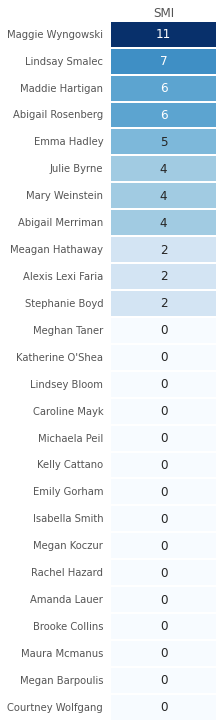

In [91]:
# Displaying dataframe as an heatmap 
fig, axs = plt.subplots(1, 1, figsize=(3, 10), constrained_layout=True)

g = sns.heatmap(TeamA_Swimmer_SMI, linewidths = 0.3, annot = True, 
            annot_kws={"size": 12},cbar= False, square= False, xticklabels= False, cmap= 'Blues')


g.set(ylabel=None)
g.set_xlabel('SMI')
axs.xaxis.set_label_position('top') 
axs.xaxis.tick_top()
g.tick_params(left=False, top=False) ## other options are right and top


plt.show()

### Can also do for all swimmer and event pairs and store in a dataframe

In [92]:
# Create a dataframe for the swimmer SMI scores for just Team A ('184')
TeamA_SMI = Swimmer_Names_df[Swimmer_Names_df['team_id'] == 184].copy()

TeamA_SMI = TeamA_SMI.drop(columns=['gender','team_id'])

TeamA_SMI.head()

,name
swimmer_id,
167013,Katherine O'Shea
214963,Mary Weinstein
221480,Megan Barpoulis
228451,Julie Byrne
233487,Lindsay Smalec


In [93]:
# Create an empty column for swimmer SMI score
TeamA_SMI['All'] = np.nan

# Create columns for each event for swimmer-event SMI
tot_scored_events = individual_scored_events + relay_scored_events
for ev in tot_scored_events:
    TeamA_SMI[ev] = np.nan 
    
TeamA_SMI = TeamA_SMI[['name','All'] + EventScoreOrder]
TeamA_SMI.head()

,name,All,M50,F11650Y,F1200Y,F2100Y,F3100Y,F4200Y,F150Y,F1100Y,F2200Y,F3200Y,F1500Y,F4100Y,F5200Y,F50
swimmer_id,,,,,,,,,,,,,,,,
167013,Katherine O'Shea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214963,Mary Weinstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221480,Megan Barpoulis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228451,Julie Byrne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233487,Lindsay Smalec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# List of events to eliminate (including 'All'). It has memory issues if you try to do the full list of events, but can do a few at a time
# Write to file
# Event codes: = ['All', 'M50','F11650Y','F1200Y','F2100Y','F3100Y','F4200Y','F150Y','F1100Y','F2200Y','F3200Y','F1500Y','F4100Y','F5200Y','F50']
ev = ['All', 'M50','F11650Y']

# This is for Team A LU 1 vs. Team B LU 0
# Check the SMI for the swimmer and event (ev) pair
for event in ev:
    for swimmer_id in TeamA_swimmers:

        TeamA_Lineup_SMI,_,_ = MeetOptwSMI(TeamA_swimmers, oppB_lineup_nums, oppB_scenario_prob, individual_scored_events, \
            relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamA_Perf_dict,opptime_TeamB_dict, swimmer_id, [event], BigM)
        
        TeamA_Lineup_SMI = TeamA_Lineup_SMI[TeamA_Lineup_SMI.columns].round().astype('int8')
        
        score_A,_,_ = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_SMI, \
            TeamB_Perf_wM_df, TeamB_Lineup_df[0], scoring_method="Six Lane")
        
        TeamA_SMI.at[swimmer_id,event] = Base_Score - score_A

NOW WE'RE IN MEETOPT with SMI: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Computing SMI for athlete  167013  and event  ['All']
Tot

In [95]:
TeamA_SMI

,name,All,M50,F11650Y,F1200Y,F2100Y,F3100Y,F4200Y,F150Y,F1100Y,F2200Y,F3200Y,F1500Y,F4100Y,F5200Y,F50
swimmer_id,,,,,,,,,,,,,,,,
167013,Katherine O'Shea,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214963,Mary Weinstein,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221480,Megan Barpoulis,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228451,Julie Byrne,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233487,Lindsay Smalec,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233650,Maura Mcmanus,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235482,Abigail Rosenberg,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255871,Maggie Wyngowski,11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256775,Brooke Collins,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Write table to CSV - if wanted
#TeamA_SMI.to_csv('Bucknell_SMI.csv')

In [97]:
# Order swimmers by their 'All' SMI and set the index to the names
TeamA_SMI = TeamA_SMI.dropna().sort_values(by='All', ascending=False).set_index('name')

In [98]:
# Order the columns by
TeamA_SMI = TeamA_SMI[['All'] + EventScoreOrder]

# Rename the events
TeamA_SMI = TeamA_SMI.rename(columns=EventScoreLabelConvertDict)

TeamA_SMI

,All,200Y Medley Relay,1650Y Free,200Y Free,100Y Back,100Y Breast,200Y Fly,50Y Free,100Y Free,200Y Back,200Y Breast,500Y Free,100Y Fly,200Y IM,200Y Free Relay
name,,,,,,,,,,,,,,,


ValueError: zero-size array to reduction operation fmin which has no identity

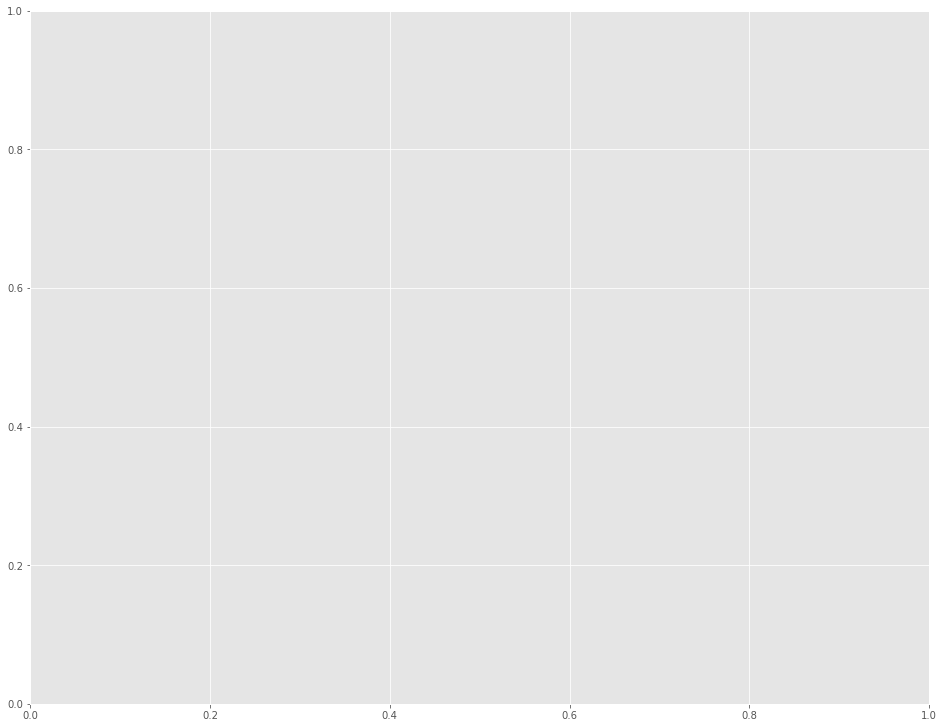

In [99]:
# Make a pretty SMI Table by displaying dataframe as an heatmap 
fig, axs = plt.subplots(1, 1, figsize=(13, 10), constrained_layout=True)

g = sns.heatmap(TeamA_SMI, linewidths = 0.3, annot = True, 
            annot_kws={"size": 12},cbar= False, square= False, xticklabels= True, cmap= 'Blues', linecolor= '.75')


#clean up the charts
fig.suptitle('Swimmer\'s Meet Impact (SMI) Score')

g.set(ylabel=None)
axs.xaxis.set_label_position('top') 
axs.xaxis.tick_top()
g.tick_params(left=False, top=False) ## other options are right and top

plt.xticks(rotation=90)

plt.show()

### Because of ties in the relays. We can subtract 0.001 (due to the precision of the input data, this won't have a real affect except to avoid ties) from the opptime values to force MeetOpt to look for a "non-tie" lineup. This shouldn't be an issue as long an equal point solution exists. In this meet with these teams, that is true. 

In [ ]:
#####
# Debugging Code
# Check LU 1 vs the LU missing this swimmer
TeamA_3colors = [TeamA_orange, (1,1,1), TeamA_blue ]
ChartLUdiff('TeamA',TeamA_3colors, TeamA_Lineup_df[1], TeamA_Lineup_SMI, 9, 7)

In [ ]:
#####
# Debugging Code

print((TeamB_Lineup_df[0]*TeamB_Perf_wM_df)[['FLF50A', 'F1F50A']].sum().sum(), "  ",\
    (TeamB_Lineup_df[0]*TeamB_Perf_wM_df)[['FLF50B', 'F1F50B']].sum().sum(), "  ", \
    (TeamB_Lineup_df[0]*TeamB_Perf_wM_df)[['FLF50C', 'F1F50C']].sum().sum())

92.0    177.44    354.75


In [ ]:
#####
# Debugging Code

print((TeamA_Lineup_df[1]*TeamA_Perf_wM_df)[['FLF50A', 'F1F50A']].sum().sum(), "  ",\
    (TeamA_Lineup_df[1]*TeamA_Perf_wM_df)[['FLF50B', 'F1F50B']].sum().sum(), "  ", \
    (TeamA_Lineup_df[1]*TeamA_Perf_wM_df)[['FLF50C', 'F1F50C']].sum().sum())

95.31    96.30000000000001    443.28


In [ ]:
#####
# Debugging Code

print((TeamA_Lineup_SMI*TeamA_Perf_wM_df)[['FLF50A', 'F1F50A']].sum().sum(), "  ",\
    (TeamA_Lineup_SMI*TeamA_Perf_wM_df)[['FLF50B', 'F1F50B']].sum().sum(), "  ", \
    (TeamA_Lineup_SMI*TeamA_Perf_wM_df)[['FLF50C', 'F1F50C']].sum().sum())

177.31    177.44    443.28


In [ ]:
#####
# Debugging Code
(TeamA_Lineup_SMI*TeamA_Perf_wM_df)[['FLF50B', 'F1F50B']].sum()

FLF50B    105.96
F1F50B     71.48
dtype: float64

In [ ]:
#####
# Debugging Code
(TeamB_Lineup_df[0]*TeamB_Perf_wM_df)[['FLF50B', 'F1F50B']].sum()

FLF50B    105.96
F1F50B     71.48
dtype: float64

## Section END
*********************


### Note: "Ghost" Swimmers should be added if the team cannot create a feasible lineup with 3 in each indiv event and 12 in relay events.

***************************
## Section: MeetOpt versions with a DISTRIBUTION from the game theory of opponents for Team B vs. 3 initial lineups (0,1,2)

In [100]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event

# Do this for a distribution of two lineups.
# What would Team B do against the DISTRIBUTION of Team A lineups?

# If all code above is ran there are THREE LUs for Team A 0,1,2
# The DISTRIBUTION from game theory is (0,1/16,15/16)
# 
# How will MeetOpt deal with a zero probability lineup? Better to just filter out?
 
TeamA_lineup_num = 3
opptime_TeamA_dist_dict = dict()
for i in range(TeamA_lineup_num):
    opptime_TeamA_dist_dict[i+1] = create_opptime_dict(TeamA_Perf_wM_df, TeamA_Lineup_df[i], BigM)

opptime_TeamA_dist_dict[1][4]['M50']

443.279

In [101]:
# Get the number of opponent lineups (scenarios) and their associated probabilities
# generated from game theory

# Need to use this structre for MeetOpt and to allow for more than one scenario later

# for 3 lineups
oppA_dist_lineup_nums = [1,2,3]
oppA_lineup_dist = (0,1/16,15/16)

# for 2 lineups
#oppA_dist_lineup_nums = [1,2]
#oppA_lineup_dist = (1/16,15/16)

# for 1 lineup
#oppB_lineup_nums = [1]
#oppB_lineup_select_prob = (1,) 

# connect the lineup nums with their associate probs in a dictionary for MeetOpt
oppA_scenario_prob = dict(zip(oppA_dist_lineup_nums,oppA_lineup_dist))

print(oppA_scenario_prob)

{1: 0, 2: 0.0625, 3: 0.9375}


## 1. Now use these inputs to determine the MeetOpt LU to the distribution of lineups

In [102]:
# def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime):

# Find MeetOpt response lineup to the base
TeamB_Lineup_df[3],r,w = MeetOpt(TeamB_swimmers, oppA_dist_lineup_nums, oppA_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamB_Perf_dict,opptime_TeamA_dist_dict,BigM)

# Reorder the columns to the meet event order
TeamB_Lineup_df[3] = TeamB_Lineup_df[3][EventOrder]

NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 0, 2: 0.0625, 3: 0.9375}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Total Setup Time =  0  secs
Solve the baseli

### So against the three lineups we've already found for Team A and using the distribution of how likely Team A should select those lineups then Team B's best response in single lineup is to choose a (maybe) new LU 3. The expected points for Team B are then 130.75. 
## 2. Find the lineup and then compute the actual score for each using our meet score function.

In [103]:
# Compute the scores for this Team B LU 3 vs Team A LU [0,1,2]
TeamB_LU = 3

for lu in [0,1,2]:
    score_A,score_B,_ = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[lu], \
        TeamB_Perf_wM_df, TeamB_Lineup_df[TeamB_LU], scoring_method="Six Lane")

    print("Projected scores: \nTeam A: ",score_A,"\nTeam B: ",score_B, "\nDifference: ", score_A-score_B)

Projected scores: 
Team A:  138.0 
Team B:  124.0 
Difference:  14.0
Projected scores: 
Team A:  135 
Team B:  127 
Difference:  8
Projected scores: 
Team A:  131 
Team B:  131 
Difference:  0


## 3. Using those meet values and the distributions compute and compare the expected points against this game strategy.

In [105]:
oppA_lineup_dist[0]*124 + oppA_lineup_dist[1]*127 + oppA_lineup_dist[2]*131

130.75

In [106]:
oppA_lineup_dist[0]*14 + oppA_lineup_dist[1]*8 + oppA_lineup_dist[2]*0

0.5

### Matches what MeetOpt found

## Now do a recursive game theory step again with this new lineup and see what the new policy is

In [104]:
# Compute the scores for this Team B LU 3 vs Team A LU [0,1,2]
for lu_A in range(3):
    for lu_B in range(4):
        score_A,score_B,_ = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[lu_A], \
            TeamB_Perf_wM_df, TeamB_Lineup_df[lu_B], scoring_method="Six Lane")

        print("LU A ", lu_A, " LU B ", lu_B, ": Projected scores: Team A: ",score_A,"Team B: ",score_B, "Difference: ", score_A-score_B)
    print("\n")

LU A  0  LU B  0 : Projected scores: Team A:  137.0 Team B:  125.0 Difference:  12.0
LU A  0  LU B  1 : Projected scores: Team A:  130.0 Team B:  132.0 Difference:  -2.0
LU A  0  LU B  2 : Projected scores: Team A:  146.0 Team B:  116.0 Difference:  30.0
LU A  0  LU B  3 : Projected scores: Team A:  138.0 Team B:  124.0 Difference:  14.0


LU A  1  LU B  0 : Projected scores: Team A:  146.0 Team B:  116.0 Difference:  30.0
LU A  1  LU B  1 : Projected scores: Team A:  144 Team B:  118 Difference:  26
LU A  1  LU B  2 : Projected scores: Team A:  131 Team B:  131 Difference:  0
LU A  1  LU B  3 : Projected scores: Team A:  135 Team B:  127 Difference:  8


LU A  2  LU B  0 : Projected scores: Team A:  142.0 Team B:  120.0 Difference:  22.0
LU A  2  LU B  1 : Projected scores: Team A:  158 Team B:  104 Difference:  54
LU A  2  LU B  2 : Projected scores: Team A:  143 Team B:  119 Difference:  24
LU A  2  LU B  3 : Projected scores: Team A:  131 Team B:  131 Difference:  0




In [105]:
# Create the score matrix with Team
LineupA0vB0 = 12
LineupA0vB1 = -2
LineupA0vB2 = 30
LineupA0vB3 = 14

LineupA1vB0 = 30
LineupA1vB1 = 26
LineupA1vB2 = 0
LineupA1vB3 = 8

LineupA2vB0 = 22
LineupA2vB1 = 54
LineupA2vB2 = 24
LineupA2vB3 = 0

score_matrix = [[LineupA0vB0, LineupA0vB1, LineupA0vB2, LineupA0vB3], [LineupA1vB0, LineupA1vB1, LineupA1vB2, LineupA1vB3], [LineupA2vB0, LineupA2vB1, LineupA2vB2, LineupA2vB3]]


In [106]:
# display payoff matrix
payoff3x4_df = pd.DataFrame({"Team B LU 0": [LineupA0vB0, LineupA1vB0, LineupA2vB0], \
    "Team B LU 1": [LineupA0vB1, LineupA1vB1, LineupA2vB1], \
    "Team B LU 2": [LineupA0vB2, LineupA1vB2, LineupA2vB2], \
    "Team B LU 3": [LineupA0vB3, LineupA1vB3, LineupA2vB3]}, \
    index=['Team A LU 0', 'Team A LU 1', 'Team A LU 2'])  
display(HTML(payoff3x3_df.to_html())) 

,Team B LU 0,Team B LU 1,Team B LU 2
Team A LU 0,12,-2,30
Team A LU 1,30,26,0
Team A LU 2,22,54,24


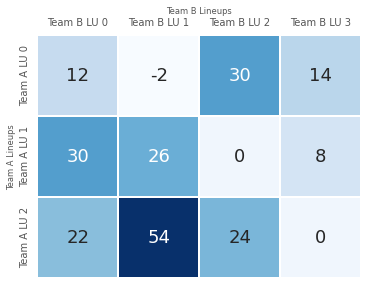

In [107]:
# Displaying dataframe as an heatmap 
fig, axs = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

sns.heatmap(payoff3x4_df, linewidths = 0.3, annot = True, 
            annot_kws={"size": 18},cbar= False, square= True, cmap= 'Blues')


#clean up the charts
#fig.suptitle('Lineup Payoff Matrix')
axs.set_ylabel('Team A Lineups',fontsize='small')
axs.set_xlabel('Team B Lineups', fontsize='small')

axs.xaxis.tick_top()
axs.tick_params(left=False, top=False) ## other options are right and top
axs.xaxis.set_label_position('top') 

plt.show()

In [108]:
#Return the Nash equilibrium mixed strategy and expected points for team A and team B.
f,optB = FindOptStrategy('A', score_matrix)
g,optA = FindOptStrategy('B', score_matrix)

print('\n Printing f: ',f)
print('\n Printing optA: ', optA)
print('\n Printing g: ', g)
print('\n Printing optB: ',optB)

Discarded solution information
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 4 columns and 17 nonzeros
Model fingerprint: 0x367d7807
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 0 columns
Presolve time: 0.01s
Presolved: 4 rows, 4 columns, 15 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000000e+01   8.250000e+00   0.000000e+00      0s
       3    1.1176471e+01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.117647059e+01
Maximize
  <gurobi.LinExpr: v>
Subject To
  bounds[0]: <gurobi.LinExpr: 12.0 f[0] + 30.0 f[1] + 22.0 f[2] + -1.0 v> >= 0
  bounds[1]: <gurobi.LinExpr: -2.0 f[0] + 26.0 f[1] + 54.0 f[2] + -1.0 v> >= 0
  bo

### New policy for Team A: (0.529412, 0.470588,0) and new policy for Team B: (0.0,0.174,0.0,0.823) expected points are 11.18 in Team A's favor.

## SECTION END
*****

***************************
## Section: MeetOpt versions with a DISTRIBUTION from the game theory of opponents for TEAM A vs. 3 initial lineups (0,1,2)

In [109]:
# opponents times needs to be in lineup (or scenario), opponent rank (1,2,3,4), then the name of the scored event

# Do this for a distribution of two lineups.
# What would Team B do against the DISTRIBUTION of Team A lineups?

# If all code above is ran there are THREE LUs for Team A 0,1,2
# The DISTRIBUTION from game theory is (0,1/16,15/16)
# 
# How will MeetOpt deal with a zero probability lineup? Better to just filter out?
 
TeamB_lineup_num = 3
opptime_TeamB_dist_dict = dict()
for i in range(TeamB_lineup_num):
    opptime_TeamB_dist_dict[i+1] = create_opptime_dict(TeamB_Perf_wM_df, TeamB_Lineup_df[i], BigM)

opptime_TeamB_dist_dict[1][1]['M50']

105.739

In [110]:
# Get the number of opponent lineups (scenarios) and their associated probabilities
# generated from game theory

# Need to use this structre for MeetOpt and to allow for more than one scenario later

# for 3 lineups
oppB_dist_lineup_nums = [1,2,3]
oppB_lineup_dist = (0.75,0,.25)

# for 2 lineups
#oppA_dist_lineup_nums = [1,2]
#oppA_lineup_dist = (1/16,15/16)

# for 1 lineup
#oppB_lineup_nums = [1]
#oppB_lineup_select_prob = (1,) 

# connect the lineup nums with their associate probs in a dictionary for MeetOpt
oppB_scenario_prob = dict(zip(oppB_dist_lineup_nums,oppB_lineup_dist))

print(oppB_scenario_prob)

{1: 0.75, 2: 0, 3: 0.25}


In [112]:
# def MeetOpt(athleteFull,scenario,scenprob,indiv_events,relay_scored_events,relaynoMR,stroke,relay_pastperf_events,lineup_events, playperf,opptime):

# Find MeetOpt response lineup to the base
TeamA_Lineup_df[3],r,w = MeetOpt(TeamA_swimmers, oppB_dist_lineup_nums, oppB_scenario_prob, individual_scored_events, \
    relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamA_Perf_dict,opptime_TeamB_dist_dict,BigM)

# Reorder the columns to the meet event order
TeamA_Lineup_df[3] = TeamA_Lineup_df[3][EventOrder]

NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 0.75, 2: 0, 3: 0.25}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check Done
obj done
Total Setup Time =  0  secs
Solve the baseline p

In [113]:
# Compute the scores for this Team B LU 3 vs Team A LU [0,1,2]
MeetScoreDiff = {}
for lu_A in range(4):
    MeetScoreDiff[lu_A] = {}
    for lu_B in range(4):
        score_A,score_B,_ = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_df[lu_A], \
            TeamB_Perf_wM_df, TeamB_Lineup_df[lu_B], scoring_method="Six Lane")
        MeetScoreDiff[lu_A][lu_B] = score_A-score_B
        print("LU A ", lu_A, " LU B ", lu_B, ": Projected scores: Team A: ",score_A,"Team B: ",score_B, "Difference: ", score_A-score_B)
    print("\n")

LU A  0  LU B  0 : Projected scores: Team A:  137.0 Team B:  125.0 Difference:  12.0
LU A  0  LU B  1 : Projected scores: Team A:  130.0 Team B:  132.0 Difference:  -2.0
LU A  0  LU B  2 : Projected scores: Team A:  146.0 Team B:  116.0 Difference:  30.0
LU A  0  LU B  3 : Projected scores: Team A:  138.0 Team B:  124.0 Difference:  14.0


LU A  1  LU B  0 : Projected scores: Team A:  146.0 Team B:  116.0 Difference:  30.0
LU A  1  LU B  1 : Projected scores: Team A:  144 Team B:  118 Difference:  26
LU A  1  LU B  2 : Projected scores: Team A:  131 Team B:  131 Difference:  0
LU A  1  LU B  3 : Projected scores: Team A:  135 Team B:  127 Difference:  8


LU A  2  LU B  0 : Projected scores: Team A:  142.0 Team B:  120.0 Difference:  22.0
LU A  2  LU B  1 : Projected scores: Team A:  158 Team B:  104 Difference:  54
LU A  2  LU B  2 : Projected scores: Team A:  143 Team B:  119 Difference:  24
LU A  2  LU B  3 : Projected scores: Team A:  131 Team B:  131 Difference:  0


LU A  3  LU B

In [114]:
score_matrix = [[MeetScoreDiff[0][0], MeetScoreDiff[0][1], MeetScoreDiff[0][2], MeetScoreDiff[0][3]], \
    [MeetScoreDiff[1][0], MeetScoreDiff[1][1], MeetScoreDiff[1][2], MeetScoreDiff[1][3]],\
    [MeetScoreDiff[2][0], MeetScoreDiff[2][1], MeetScoreDiff[2][2], MeetScoreDiff[2][3]],\
    [MeetScoreDiff[3][0], MeetScoreDiff[3][1], MeetScoreDiff[3][2], MeetScoreDiff[3][3]]]

type(score_matrix)

list

In [115]:
# display payoff matrix
payoff4x4_df = pd.DataFrame({"Team B LU 0": [MeetScoreDiff[0][0], MeetScoreDiff[1][0], MeetScoreDiff[2][0], MeetScoreDiff[3][0]], \
    "Team B LU 1": [MeetScoreDiff[0][1], MeetScoreDiff[1][1], MeetScoreDiff[2][1], MeetScoreDiff[3][1]], \
    "Team B LU 2": [MeetScoreDiff[0][2], MeetScoreDiff[1][2], MeetScoreDiff[2][2], MeetScoreDiff[3][2]], \
    "Team B LU 3": [MeetScoreDiff[0][3], MeetScoreDiff[1][3], MeetScoreDiff[2][3], MeetScoreDiff[3][3]]}, \
    index=['Team A LU 0', 'Team A LU 1', 'Team A LU 2', 'Team A LU 3'])  

In [192]:
# EDA function for game payoff matrix

def GameMatrixDisplay(PayMat_df, FigSize_h, FigSize_l):
    """
    :param ayoffMatrix_df: A dataframe of the mxn payoff matrix for the game
    :param FigSize_h, FigSize_l: figur height and width in inches.

    #returns plot of given lineup

    """
    df = PayMat_df.copy()

    # Displaying dataframe as an heatmap 
    fig, axs = plt.subplots(1, 1, figsize=(FigSize_h, FigSize_l), constrained_layout=True)

    sns.heatmap(df, linewidths = 0.3, annot = True, \
                annot_kws={"size": 18},cbar= False, square= True, cmap= 'Blues')


    #clean up the charts
    #fig.suptitle('Lineup Payoff Matrix')
    axs.set_ylabel('Team A Lineups',fontsize='small')
    axs.set_xlabel('Team B Lineups', fontsize='small')

    axs.xaxis.tick_top()
    axs.tick_params(left=False, top=False) ## other options are right and top
    axs.xaxis.set_label_position('top') 

    plt.show()

    return

In [186]:
payoff4x4_df

,Team B LU 0,Team B LU 1,Team B LU 2,Team B LU 3
Team A LU 0,12.0,-2.0,30.0,14.0
Team A LU 1,30.0,26.0,0.0,8.0
Team A LU 2,22.0,54.0,24.0,0.0
Team A LU 3,30.0,44.0,46.0,36.0


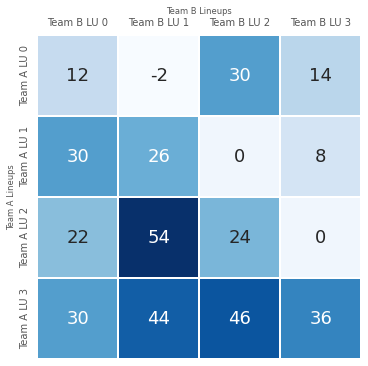

In [193]:
# Displaying payoff matrix as an heatmap 

GameMatrixDisplay(payoff4x4_df, 5, 5)

In [120]:
#Return the Nash equilibrium mixed strategy and expected points for team A and team B.
f,optB = FindOptStrategy('A', score_matrix)
g,optA = FindOptStrategy('B', score_matrix)

print('\n Printing f: ',f)
print('\n Printing optA: ', optA)
print('\n Printing g: ', g)
print('\n Printing optB: ',optB)

Discarded solution information
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 5 columns and 22 nonzeros
Model fingerprint: 0x0b5b7c35
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 0 columns
Presolve time: 0.01s
Presolved: 4 rows, 5 columns, 19 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.6000000e+01   3.500000e+00   0.000000e+00      0s
       2    3.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.000000000e+01
Maximize
  <gurobi.LinExpr: v>
Subject To
  bounds[0]: <gurobi.LinExpr: 12.0 f[0] + 30.0 f[1] + 22.0 f[2] + 30.0 f[3] + -1.0 v> >= 0
  bounds[1]: <gurobi.LinExpr: -2.0 f[0] + 26.0 f[1] + 54.0 f[2] + 44.0 

# Expected game score progression: (1 LU): 12, (2 LUs) 26, (3 LUs) 22.5, (4 LUs) 30

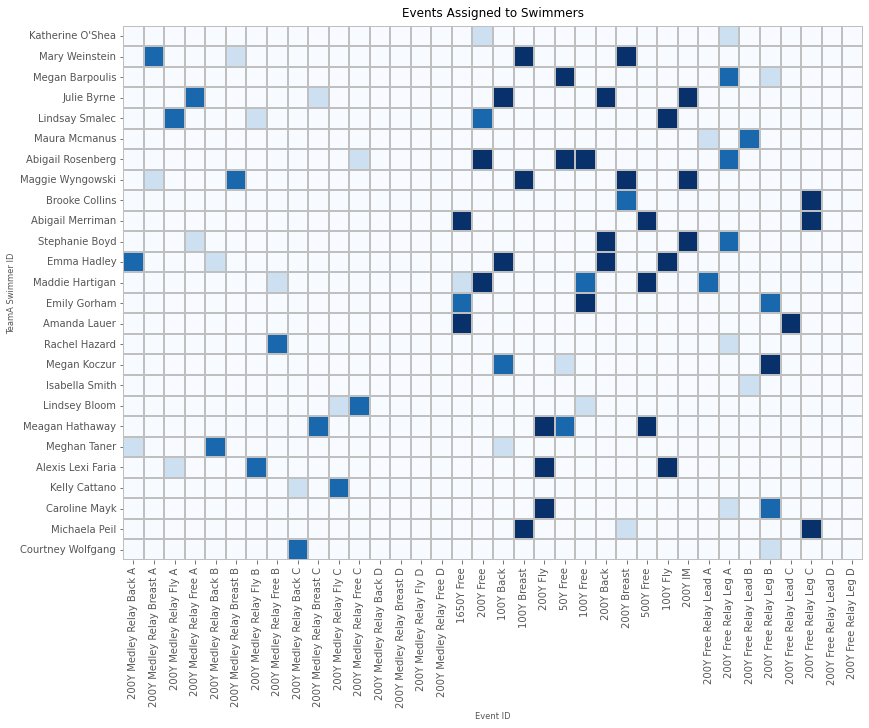

In [121]:
# # viz of the heatmap of the four lineups
ChartLineup('TeamA', 'Blues', f['f[0]']*TeamA_Lineup_df[0] + f['f[1]']*TeamA_Lineup_df[1] + f['f[2]']*TeamA_Lineup_df[2] + f['f[3]']*TeamA_Lineup_df[3], 18, 10)

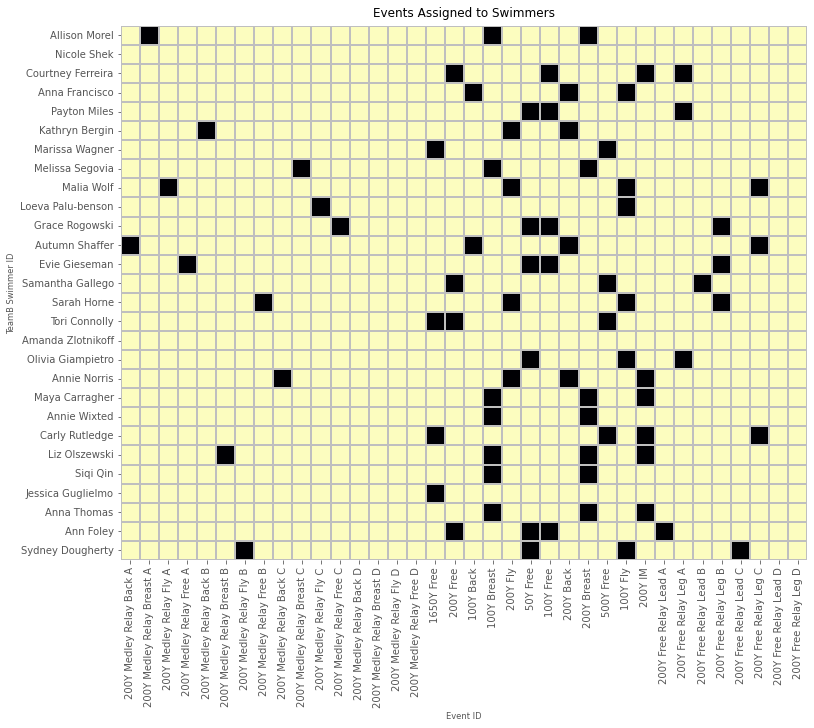

In [122]:
# # viz of the heatmap of the four lineups
ChartLineup('TeamB', 'magma_r', g['g[0]']*TeamB_Lineup_df[0] + g['g[1]']*TeamB_Lineup_df[1] + g['g[2]']*TeamB_Lineup_df[2] + g['g[3]']*TeamB_Lineup_df[3], 18, 10)

***
## Section START: Making the game recursion

In [222]:
# Do you want to reset the values and run this recursion in the workbook?
LOOP = 1

#TeamA_Perf_wM_df, TeamB_Perf_wM_df: Dataframes of performances with big M values for both teams
#TeamA_Lineup_df[0]: Df of an INITIAL lineup
#BigM: dictionary of BigM values for each scoring event AND relay legs

if LOOP == 1:
    # Assume above foundation is set (input dataframes, scoring rules, initial lineups, performance dataframe, etc.)
    # NEED:

    # How many lineup creations/game theory solutions?
    TOTAL_LINEUPS = 3

    # Initialize lists of lineups for teams A and B
    TeamA_LU_df = [None] * (TOTAL_LINEUPS + 1) 
    TeamB_LU_df = [None] * (TOTAL_LINEUPS + 1)

    # Read the initial lineups into a list as the first (base) lineup
    # These would be input dataframes. Pulled from Df in this case
    # Change "TeamA_Lineup_df[0]" to whatever initial LUs you prefer are.
    
    # Initial_LU_A = TeamA_Lineup_df[1].copy()
    # Initial_LU_B = TeamB_Lineup_df[1].copy()

    # To check starting from the greedy lineups
    Initial_LU_A = TeamA_Lineup_Greedy.copy()
    Initial_LU_B = TeamB_Lineup_Greedy.copy()

    TeamA_LU_df[0] = Initial_LU_A
    TeamB_LU_df[0] = Initial_LU_B

    # To create the payoff matrix (list of lists)
    # Get started with list in a list
    MeetScoreDiff = {}
    MeetScoreDiff[0] = {}
    payMatrix = []
    
    lu_A = 0
    lu_B = 0

    score_A,score_B,_ = calculate_pred_score(TeamA_Perf_wM_df, TeamA_LU_df[lu_A], \
        TeamB_Perf_wM_df, TeamB_LU_df[lu_B], scoring_method="Six Lane")
    MeetScoreDiff[lu_A][lu_B] = score_A-score_B
    
    print("LU A ", lu_A , " LU B ", lu_B, ": Projected scores: Team A: ", score_A,\
        "Team B: ",score_B, "Difference: ", score_A-score_B)
    print("\n")

    # Expected score for each recursion
    ExpScore = []
    ExpScore.append(MeetScoreDiff[lu_A][lu_B])
    
    # Add this score to the matrix (list) as the first element in the first list (row)
    payMatrix.append([MeetScoreDiff[0][0]])

    # Create the opposing team performances for MeetOpt calls for initial lineups
    opptime_TeamB_dist_dict = dict()
    opptime_TeamA_dist_dict = dict()

    #for i in range(TeamB_lineup_num):
    #    opptime_TeamB_dist_dict[i+1] = create_opptime_dict(TeamB_Perf_wM_df, TeamB_Lineup_df[i], BigM)
    # Starting at 1 here instead of 0 is an artifact of porting this over from Excel (lazy)
    opptime_TeamB_dist_dict[1] = create_opptime_dict(TeamB_Perf_wM_df, TeamB_LU_df[0], BigM)
    opptime_TeamA_dist_dict[1] = create_opptime_dict(TeamA_Perf_wM_df, TeamA_LU_df[0], BigM)

    # Get the distribution over the opponent's lineups (one to start)
    # Later the "select probability" is determined by the game theory solution step with the payoff matrix
    oppB_dist_idx = [1]
    oppB_lineup_dist = (1,)

    oppA_dist_idx = [1]
    oppA_lineup_dist = (1,) 
    
    # For MORE LINEUPS
    # need list [1,2,3,..,num lineups]
    # oppA_dist_lineup_nums = [i+1 for i in range(3)]
    # Get these from game theory output
    # oppA_lineup_dist = (0,1/16,15/16)

    # connect the lineup nums with their associate probs in a dictionary for MeetOpt
    oppB_LU_dist_dict = dict(zip(oppB_dist_idx,oppB_lineup_dist))
    oppA_LU_dist_dict = dict(zip(oppA_dist_idx,oppA_lineup_dist))

    # Begin the recursion
    # lu runs 0,..., 0 is the base lineup
    for lu in range(TOTAL_LINEUPS):

        # have to bump because LU 0 was already created at the start
        lu_new = lu + 1

        # Get the two new lineups in response
        # Things that update each recursion: oppB_dist_idx, oppB_LU_dist_dict, opptime_TeamB_dist_dic
        TeamA_LU_df[lu_new],_,_ = MeetOpt(TeamA_swimmers, oppB_dist_idx, oppB_LU_dist_dict, individual_scored_events, \
        relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamA_Perf_dict,opptime_TeamB_dist_dict,BigM)

        TeamB_LU_df[lu_new],_,_ = MeetOpt(TeamB_swimmers, oppA_dist_idx, oppA_LU_dist_dict, individual_scored_events, \
        relay_scored_events, relay_noMR, MR_legs,relay_pastperf_events,Lineup_Events,TeamB_Perf_dict,opptime_TeamA_dist_dict,BigM)

        # Reorder the columns to the meet event order and clean up to ints
        TeamA_LU_df[lu_new] = TeamA_LU_df[lu_new][EventOrder]
        TeamB_LU_df[lu_new] = TeamB_LU_df[lu_new][EventOrder]

        # Clean up the output (-0.0) by making all integers
        TeamA_LU_df[lu_new] = TeamA_LU_df[lu_new][TeamA_LU_df[lu_new].columns].astype('int8')
        TeamB_LU_df[lu_new] = TeamB_LU_df[lu_new][TeamB_LU_df[lu_new].columns].astype('int8')

        # Compute the new dual meet scores with new lineups for all the current lineups in
        # If currently looking at new LU 3 (lu_new) then compare to 0,...,3 (lu)
        MeetScoreDiff[lu_new] = {}
        for lu_old in range(lu_new + 1):
            score_A,score_B,_ = calculate_pred_score(TeamA_Perf_wM_df, TeamA_LU_df[lu_new], \
                TeamB_Perf_wM_df, TeamB_LU_df[lu_old], scoring_method="Six Lane")
            MeetScoreDiff[lu_new][lu_old] = score_A - score_B

            print("LU A ", lu_new, " LU B ", lu_old, ": Projected scores: Team A: ",score_A,"Team B: ",score_B, "Difference: ", score_A-score_B)
            print("\n") 

            # Don't need to compute twice for values on the diagonal
            if lu_old != lu_new:
                score_A,score_B,_ = calculate_pred_score(TeamA_Perf_wM_df, TeamA_LU_df[lu_old], \
                    TeamB_Perf_wM_df, TeamB_LU_df[lu_new], scoring_method="Six Lane")
                MeetScoreDiff[lu_old][lu_new] = score_A - score_B

                print("LU A ", lu_old, " LU B ", lu_new, ": Projected scores: Team A: ",score_A,"Team B: ",score_B, "Difference: ", score_A-score_B)
                print("\n") 

        # Now we have all the head-to-head scores, so can build the updated payoff matrix
        # Team B is on columns, so add to existing rows
        
        # To start a new row for LU lu (lineups are indexed 0,1,2..., but 0 is the base)
        payMatrix.append([MeetScoreDiff[lu_new][0]])

        # Now add the new head-to-head differential scores to this new row from 1,...,lu_new
        for lu in range(lu_new):
            payMatrix[lu_new].append(MeetScoreDiff[lu_new][lu+1])

            # Now add the new head-to-head differential on old rows for 
            payMatrix[lu].append(MeetScoreDiff[lu][lu_new])
        

        # Find the new game theory distribution
        #Return the Nash equilibrium mixed strategy and expected points for team A and team B.
        TeamA_strat,optB = FindOptStrategy('A', payMatrix)
        TeamB_strat,optA = FindOptStrategy('B', payMatrix)

        f = []
        g = []

        for i in range(lu_new + 1):
            f.append(TeamA_strat['f['+ str(i) + ']'])
            g.append(TeamB_strat['g['+ str(i) + ']'])
        
        print('\n Printing f: ',TeamA_strat)
        print('\n Printing optA: ', optA)
        print('\n Printing g: ', TeamB_strat)
        print('\n Printing optB: ', optB)

        # Add the new game expected value to a list
        ExpScore.append(optA)

        # Use the new distribution to create updates for oppB_dist_idx, oppB_LU_dist_dict (and A)
        
        # Starting at 1 here instead of 0 is an artifact of porting this over from Excel (lazy)
        opptime_TeamB_dist_dict[lu_new + 1] = create_opptime_dict(TeamB_Perf_wM_df, TeamB_LU_df[lu_new], BigM)
        opptime_TeamA_dist_dict[lu_new + 1] = create_opptime_dict(TeamA_Perf_wM_df, TeamA_LU_df[lu_new], BigM)

        # Get the distribution new over the opponent's lineups
        # Later the "select probability" is determined by the game theory solution step with the payoff matrix
        oppB_dist_idx = [i+1 for i in range(lu_new + 1)] 
        
        
        # These are tuples, so need to add a tuple to tuple - another artifact of old code
        oppB_lineup_dist = ()
        for i in range(lu_new + 1):
            oppB_lineup_dist = oppB_lineup_dist + (g[i],)

        oppA_dist_idx = [i+1 for i in range(lu_new + 1)]
        oppA_lineup_dist = () 
        for i in range(lu_new + 1):
            oppA_lineup_dist = oppA_lineup_dist + (f[i],)
        
        # For MORE LINEUPS
        # need list [1,2,3,..,num lineups]
        # oppA_dist_lineup_nums = [i+1 for i in range(3)]
        # Get these from game theory output
        # oppA_lineup_dist = (0,1/16,15/16)

        # connect the lineup nums with their associate probs in a dictionary for MeetOpt
        oppB_LU_dist_dict = dict(zip(oppB_dist_idx,oppB_lineup_dist))
        oppA_LU_dist_dict = dict(zip(oppA_dist_idx,oppA_lineup_dist))
        

print("DONE")



LU A  0  LU B  0 : Projected scores: Team A:  139 Team B:  123 Difference:  16


NOW WE'RE IN MEETOPT: 

event_noMR:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'F50')
{1: 1}
total SCORED events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'M50', 'F50')
total PERF events:  ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLF50A', 'F1F50A')
total ASSIGNED events: ('F1200Y', 'F150Y', 'F1100Y', 'F4100Y', 'F2100Y', 'F2200Y', 'F1500Y', 'F5200Y', 'F3100Y', 'F4200Y', 'F3200Y', 'F11650Y', 'FLM50A', 'F2M50A', 'F3M50A', 'F4M50A', 'FLM50B', 'F2M50B', 'F3M50B', 'F4M50B', 'FLM50C', 'F2M50C', 'F3M50C', 'F4M50C', 'FLM50D', 'F2M50D', 'F3M50D', 'F4M50D', 'FLF50A', 'F1F50A', 'FLF50B', 'F1F50B', 'FLF50C', 'F1F50C', 'FLF50D', 'F1F50D')
Check

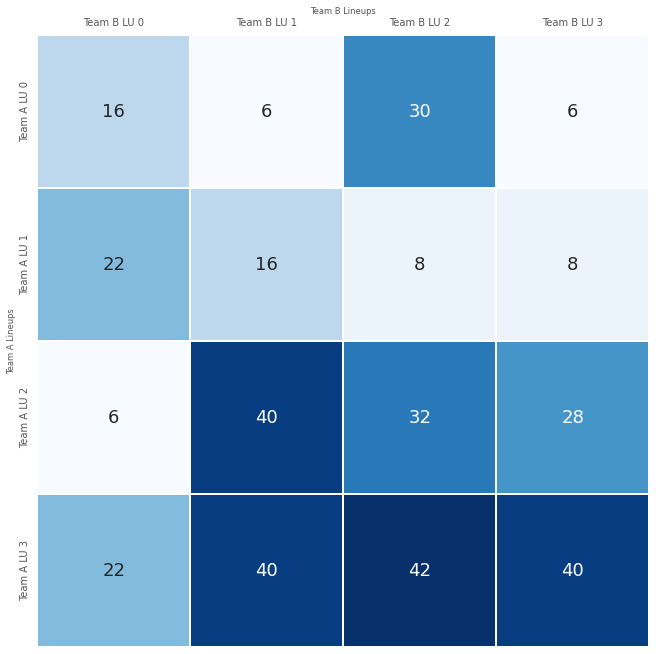

In [223]:
# Create dataframe of payoff matrix for easy viz
PayoffMatrix_df = pd.DataFrame(columns = ["Team B LU "+str(i) for i in range(TOTAL_LINEUPS + 1)], index=["Team A LU "+str(i) for i in range(TOTAL_LINEUPS + 1)], dtype='int')

for i in range(TOTAL_LINEUPS + 1):
    for j in range(TOTAL_LINEUPS + 1):
        PayoffMatrix_df.iat[i,j] = payMatrix[i][j]

# Displaying payoff matrix as an heatmap 
GameMatrixDisplay(PayoffMatrix_df,9,9)

In [224]:
ExpScore

[16, 16.0, 17.700000000000003, 22.0]

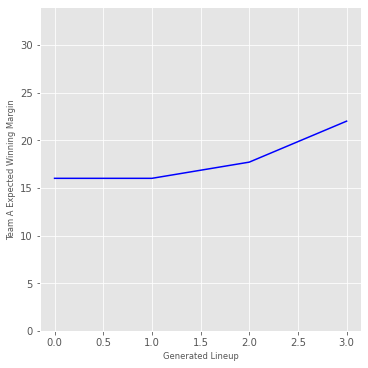

In [225]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

sns.lineplot(data=ExpScore, color='Blue')


#clean up the charts
#fig.suptitle('Lineup Payoff Matrix')
axs.set_ylabel('Team A Expected Winning Margin',fontsize='small')
axs.set_xlabel('Generated Lineup', fontsize='small')

axs.set(ylim=(0, 34))

plt.show()

In [226]:
oppB_lineup_dist

(1.0, 0.0, 0.0, 0.0)

In [227]:
oppA_lineup_dist

(0.0, 0.0, 0.0, 1.0)

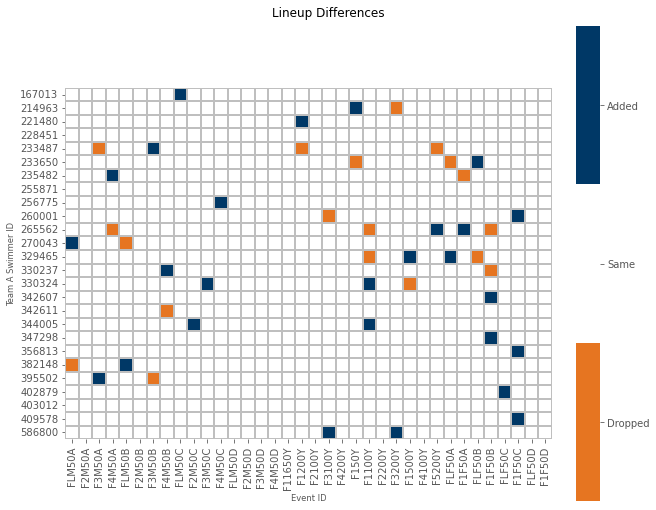

In [230]:
ChartLUdiff('Team A',TeamA_3colors, TeamA_LU_df[0], TeamA_LU_df[3], 9, 7)

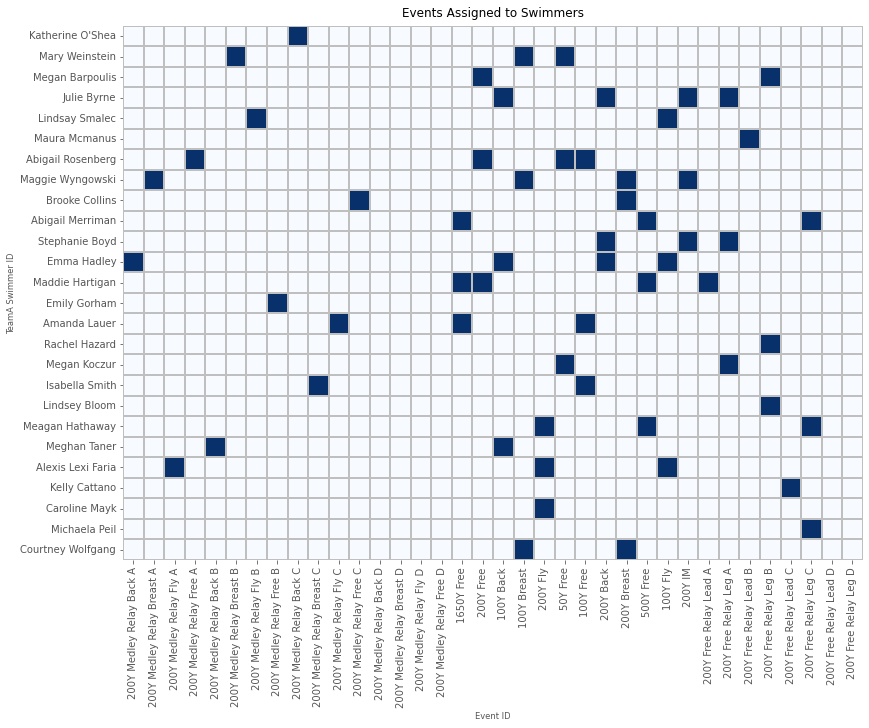

In [228]:
# # viz of the heatmap of the n lineups according to the distribution
temp1 = oppA_lineup_dist[0]*(TeamA_LU_df[0].copy())
for i in range(TOTAL_LINEUPS):
    temp1 = temp1 + oppA_lineup_dist[i+1]*(TeamA_LU_df[i+1].copy())

ChartLineup('TeamA', 'Blues', temp1, 18, 10)

## Perhaps start with CollegeSwimming.com meet simulator selections as the base meet and see how much better MeetOpt can do.

## Section END
***

***
## Section Start:
## Meet Simulation and comparisons are often done by greedy allocation using the overall standardized quality of the swimmers performance in their events. This ignores the strengths and weaknesses of the opponent's potential lineups resulting in a sub-optimal lineup.

### Records are stored in "BucknellPerf_SwimCloud18_19.xlsx" compute the percentage over the record and then allocate using a greedy approach. 100*(event time - record time)/record time be careful of the 0.001 fudge factor in opptime computation.

### Created a lineup by using the greedy "best" approach and compare.

### (Aside) How do our dual meet LUs compare with the adage of "maximize event wins" in dual meets? Do we give up the win for later points more than a coach would?

### Read in the greedy LUs created externally using the % from the collegiate record ranking and assigning events according to this ranking making sure to assign three to each event. As assignment problem was used. For the relays, they were assigned by minimizing the total relay time (as % above the collegiate record) based on the remaining slots available for swimmers.

In [146]:
# read in greedy LUs
TeamA_Lineup_Greedy = pd.read_csv("Bucknell_Lineup_Greedy.csv",index_col='Swimmer')
TeamB_Lineup_Greedy = pd.read_csv("Lehigh_Lineup_Greedy.csv",index_col='Swimmer')

# Order the colummns to the meet event order
TeamA_Lineup_Greedy = TeamA_Lineup_Greedy[EventOrder]
TeamB_Lineup_Greedy = TeamB_Lineup_Greedy[EventOrder]


In [149]:
# Score the greedy Meet
score_A,score_B,_ = calculate_pred_score(TeamA_Perf_wM_df, TeamA_Lineup_Greedy, \
    TeamB_Perf_wM_df, TeamB_Lineup_Greedy, scoring_method="Six Lane")

print("LU A ", lu_A , " LU B ", lu_B, ": Projected scores: Team A: ", score_A,\
    "Team B: ",score_B, "Difference: ", score_A-score_B)
print("\n")

LU A  0  LU B  0 : Projected scores: Team A:  139 Team B:  123 Difference:  16




### So, if both teams usd the greedy lineups (opponent independent) then Team A would be predicted to win by 16 points. Could the teams game the system to do better?

## Section End
***